# <div style="text-align: center; margin-top:2em; margin-bottom:1em">ESTADÍSTICA PARA INGENIERÍA Y CIENCIAS</div>
## <div style="text-align: center; margin-bottom:1em">PRÁCTICA 4: Análisis de varianza</div>
## <div style="text-align: center; margin-bottom:1em">Ivan Svetlich</div>

***
<br></br>

In [1]:
#Librerias
library(IRdisplay)
library(formattable)
library(ggplot2)
library(cowplot)
library(dplyr)
library(stringr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### **Ejercicio 1**

#### <div style="text-align: justify">Un fabricante está interesado en la resistencia a la tensión de una fibra sintética. Se sospecha que la resistencia está relacionada con el porcentaje de algodón en la fibra. Para ello se emplean cinco niveles de porcentaje de algodón, y se corren cinco réplicas en orden aleatorio obteniéndose los siguientes datos:</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 40%"></th>
            <th colspan="5">Resistencia</th>
        </tr>
        <tr style="font-size: larger">
            <th style="text-align: center">Porcentaje de algodón</th>
            <th>1</th>
            <th>2</th>
            <th>3</th>
            <th>4</th>
            <th>5</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">7</td>
            <td style="text-align: center; vertical-align: middle;">7</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">11</td>
            <td style="text-align: center; vertical-align: middle;">9</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">17</td>
            <td style="text-align: center; vertical-align: middle;">12</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle;">25</td>
            <td style="text-align: center; vertical-align: middle;">14</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
            <td style="text-align: center; vertical-align: middle;">19</td>
            <td style="text-align: center; vertical-align: middle;">19</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle;">30</td>
            <td style="text-align: center; vertical-align: middle;">19</td>
            <td style="text-align: center; vertical-align: middle;">25</td>
            <td style="text-align: center; vertical-align: middle;">22</td>
            <td style="text-align: center; vertical-align: middle;">19</td>
            <td style="text-align: center; vertical-align: middle;">23</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle;">35</td>
            <td style="text-align: center; vertical-align: middle;">7</td>
            <td style="text-align: center; vertical-align: middle;">10</td>
            <td style="text-align: center; vertical-align: middle;">11</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">11</td>
        </tr>
    </tbody>
</table>

In [2]:
data_1 <- read.csv("./TP4_tables/data1.csv") # Leo los datos desde archivo .csv


<br></br>

#### <div style="text-align: justify">a) ¿El porcentaje de algodón tiene algún efecto sobre la tensión de ruptura?. Dibuje diagramas de caja comparativos y realice un análisis de varianza. Utilice $\alpha = 0.05$.</div>

<div style="text-align: justify">Averiguar si el porcentaje de algodón en la fibra tiene un efecto sobre la tensión de ruptura implica determinar si las medias poblacionales de cada tratamiento son iguales o no. Como primer indicio, los diagramas de cajas permiten hacer una comparación visual de las distintas poblaciones:</div>

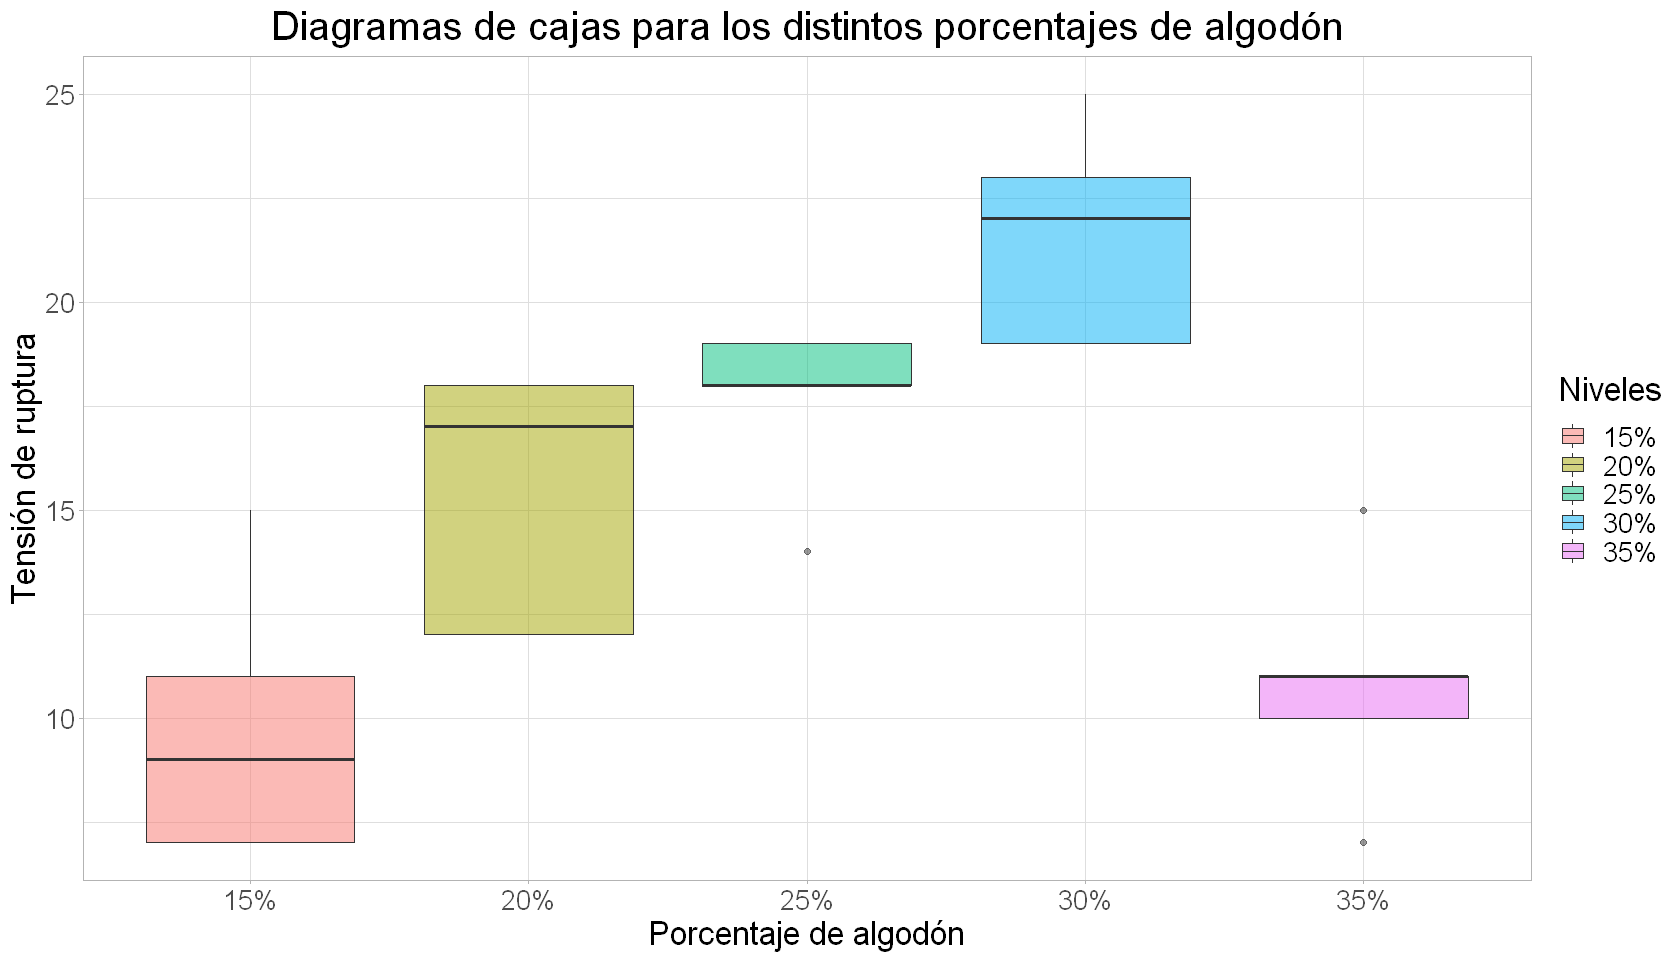

In [3]:
# Plot
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_1, aes(x=cotton_percentage, y=tensile_strength, fill=cotton_percentage)) +
    labs(
        title="Diagramas de cajas para los distintos porcentajes de algodón",
        x="Porcentaje de algodón", 
        y="Tensión de ruptura",
        fill="Niveles") +
    geom_boxplot(alpha=0.5) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Un análisis visual de los diagramas de cajas sugiere que existen diferencias entre las medias de las poblaciones correspondientes a los distintos tratamientos.</div>

<div style="text-align: justify">La determinación formal respecto a si las medias del tratamiento son diferentes implica probar la hipótesis:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5,\quad \text{contra }H_1\text{: dos o mas }\mu_i\text{ son diferentes}$$</div>

<div style="text-align: justify">seindo $\mu_i$ la media del tratamiento $i$. Para ello se utiliza el método de <b><i>análisis de varianza en un sentido</i></b>. El estadístico es:</div>

#### <div style="text-align: center">$$F = \frac{MST_r}{MSE}$$</div>

<div style="text-align: justify">donde $MST_r$ es la media cuadrática de tratamiento y $MSE$ la media cuadrática del error.</div>

In [4]:
data_1.aov <- aov(tensile_strength ~ cotton_percentage, data_1)
aov_test <- summary(data_1.aov)[[1]]


In [5]:
display_markdown('#### **ANOVA de un sentido:**')
aov_test <- cbind(c('Porcentaje de algodón', 'Residuos'), aov_test)
colnames(aov_test)[1] <- 'Source'
rownames(aov_test) <- c()
table <- formattable(aov_test, align=c('l', 'c', 'c', 'c', 'c', 'c'), list(`Source` = formatter("span",style = ~ style('text-align'='left'))))
as.htmlwidget(table, width="70%", height=NULL)


#### **ANOVA de un sentido:**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El resultado de la prueba es un $\text{p-valor} = 9.12793e-06 < 0.05$. Por lo tanto, hay evidencia significativa en contra de la hipótesis nula y se que concluye que el porcentaje de algodón en la fibra tiene un efecto sobre la tensión de ruptura de la misma.</div>

<br></br>

#### <div style="text-align: justify">b) Use el método de Tukey para identificar diferencias específicas entre los porcentajes.</div>

<div style="text-align: justify">El método de Tukey-Kramer está basado en la distribución de rango studentizado y se utiliza para construir intervalos de confianza y realizar pruebas de hipótesis de forma simultánea para todas las diferencias entre las medias de los distintos tratamientos. Esta herramienta permite determinar cuáles pares de tratamientos difieren en su efecto sobre la variable respuesta.</div>

<div style="text-align: justify">Los intervalos de confianza simultáneos de Tukey-Kramer de nivel $100(1 - \alpha)%$ para todas las diferencias $\mu_i - \mu_j$ son:</div>

#### <div style="text-align: center">$$\overline{X}_i - \overline{X}_j \pm q_{I, N-I, \alpha} \sqrt{\frac{MSE}{2}\left(\frac{1}{J_i}+\frac{1}{J_j}\right)}$$</div>

<div style="text-align: justify">donde:
    <ul>
        <li>$\overline{X}_i$ y $\overline{X}_j$: medias muestrales en los niveles $i$ y $j$,</li>
        <li>$I$: número de tratamientos,</li>
        <li>$J_i$ y $J_j$: tamaños de las muestras en los niveles $i$ y $j$,</li>
        <li>$N$: número total de observaciones,</li>
        <li>$MSE$: media cuadrática del error.</li>             
    </ul>
</div>

In [6]:
data_1.tukey <- as.data.frame(TukeyHSD(data_1.aov,ordered = TRUE, conf.level = 0.95)[1]$cotton_percentage)


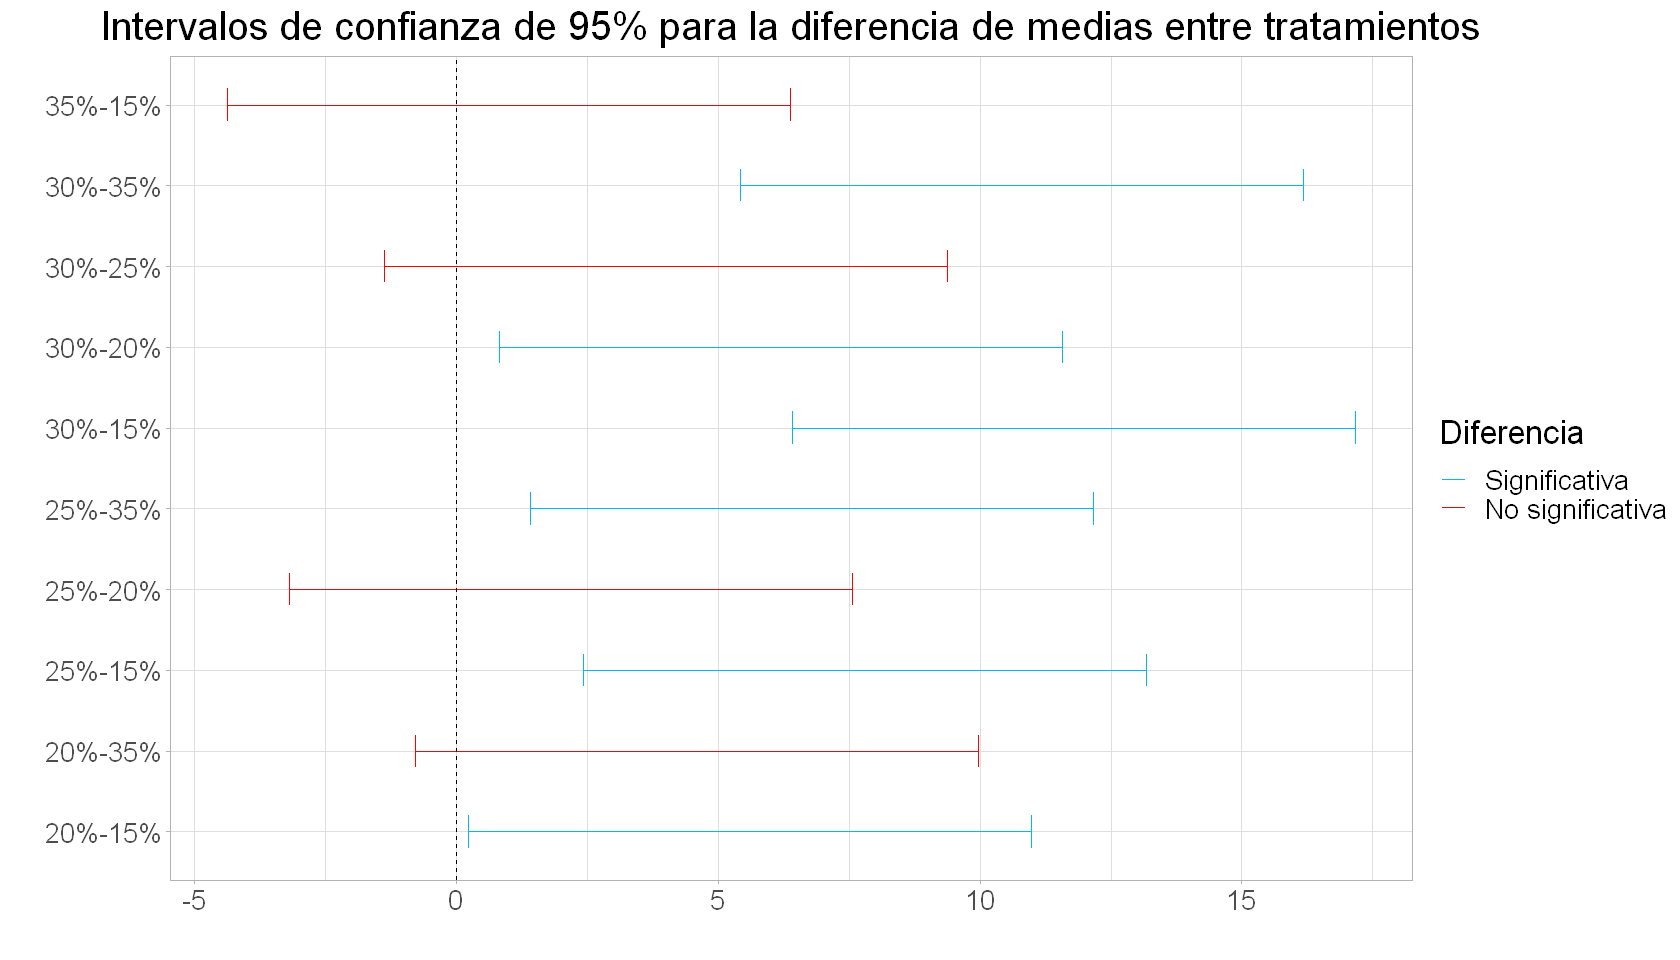

In [7]:
data_1.tukey$names <- c(rownames(data_1.tukey))
# Gráfico de los intervalos de confianza
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_1.tukey, aes(names, diff)) + 
    labs(
        title="Intervalos de confianza de 95% para la diferencia de medias entre tratamientos",
        x="", 
        y="",
        col="Diferencia") +
    geom_errorbar(aes(ymin=lwr, ymax=upr, col=ifelse(lwr*upr > 0,'1','2')), width = 0.4, alpha=1) +
    scale_color_manual(values=c('#05b5f5','#f50505'), labels=c('Significativa','No significativa'), breaks=c('1','2')) +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    theme_light() +
    coord_flip(expand = TRUE) +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Los intervalos que no contienen al cero indican, con un nivel de confianza de $95\%$, que existe una diferencia en los efectos de los tratamientos considerados.</div>

<br></br>

#### <div style="text-align: justify">c) Encuentre los residuos y examínelos en lo que respecta a la insuficiencia del modelo.</div>

<div style="text-align: justify">Las pruebas de hipótesis usuales del ANOVA de un sentido son válidas si se cumplen las siguientes condiciones:
    <ul style="list-style-type: none;">
        <li>1. Las poblaciones en tratamiento deben ser normales.</li>
        <li>2. Las poblaciones en tratamiento deben tener todas la misma varianza.</li>
    </ul>
</div>

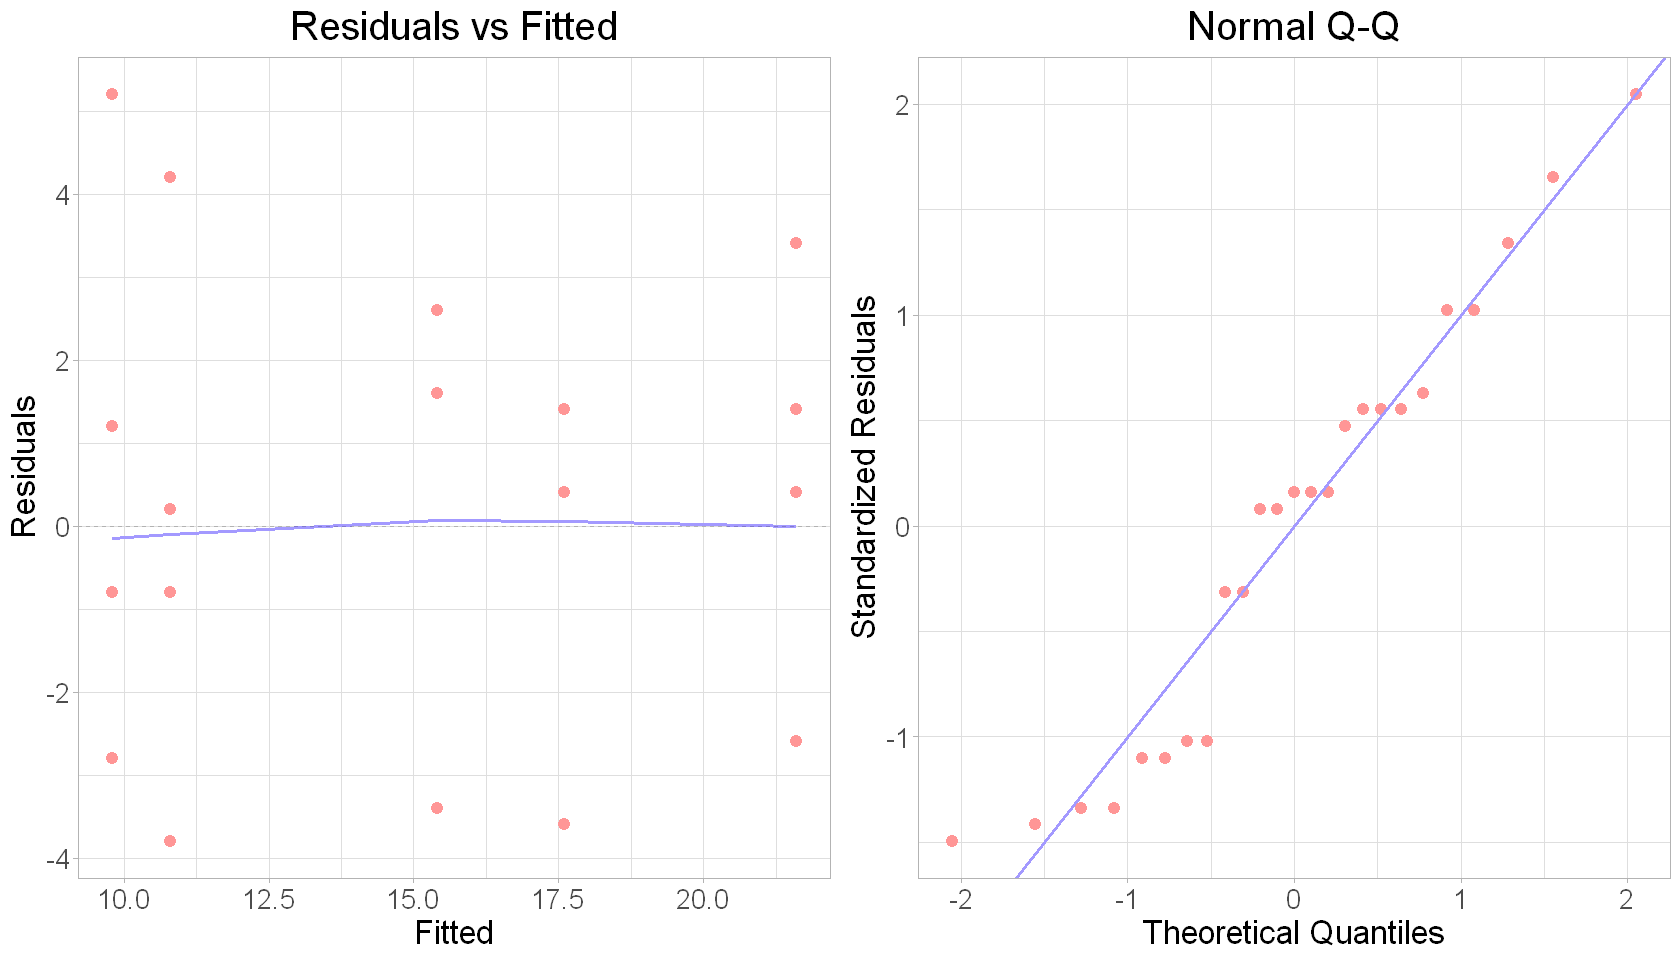

In [8]:
smoothed <- data.frame(with(data_1.aov, lowess(x = data_1.aov$fitted, y = data_1.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_1.aov) + 
    geom_point(aes(x=data_1.aov$fitted, y=data_1.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_1.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">La gráfica de residuos vs. valores ajustados no presenta patrones apreciables, y por lo tanto es razonable asumir que la varianza es constante. En cuanto al gráfico Q-Q, si bien los valores no se ajustan estrictamente a una recta, no hay evidencias de una violación grave del principio de normalidad.</div>

***
<br></br>

### **Ejercicio 2**

#### <div style="text-align: justify">Se estudia la resistencia a la compresión del concreto, así como cuatro técnicas de mezclado diferentes. Se obtienen los siguientes datos:</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 40%"></th>
            <th colspan="4">Resistencia a la compresión</th>
        </tr>
        <tr style="font-size: larger">
            <th style="text-align: center">Técnica de mezclado</th>
            <td style="text-align: center;">1</td>
            <td style="text-align: center;">2</td>
            <td style="text-align: center;">3</td>
            <td style="text-align: center;">4</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">1</td>
            <td style="text-align: center; vertical-align: middle;">3129</td>
            <td style="text-align: center; vertical-align: middle;">3200</td>
            <td style="text-align: center; vertical-align: middle;">2800</td>
            <td style="text-align: center; vertical-align: middle;">2600</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">2</td>
            <td style="text-align: center; vertical-align: middle;">3000</td>
            <td style="text-align: center; vertical-align: middle;">3300</td>
            <td style="text-align: center; vertical-align: middle;">2900</td>
            <td style="text-align: center; vertical-align: middle;">2700</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">3</td>
            <td style="text-align: center; vertical-align: middle;">2865</td>
            <td style="text-align: center; vertical-align: middle;">2975</td>
            <td style="text-align: center; vertical-align: middle;">2985</td>
            <td style="text-align: center; vertical-align: middle;">2600</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-weight: bold; font-size: larger;">4</td>
            <td style="text-align: center; vertical-align: middle;">2890</td>
            <td style="text-align: center; vertical-align: middle;">3150</td>
            <td style="text-align: center; vertical-align: middle;">3050</td>
            <td style="text-align: center; vertical-align: middle;">2765</td>
        </tr>
    </tbody>
</table>

In [9]:
data_2 <- read.csv("./TP4_tables/data2.csv") # Leo los datos desde archivo .csv
data_2$mixing_method <- as.factor(data_2$mixing_method)


<br></br>

#### <div style="text-align: justify">a) Pruebe la hipótesis de que las técnicas de mezclado afectan la resistencia del concreto. Utilice $\alpha = 0.05$.</div>

<div style="text-align: justify">Las hipótesis a probar son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_1 = \mu_2 = \mu_3 = \mu_4,\quad \text{contra }H_1\text{: dos o mas }\mu_i\text{ son diferentes}$$</div>

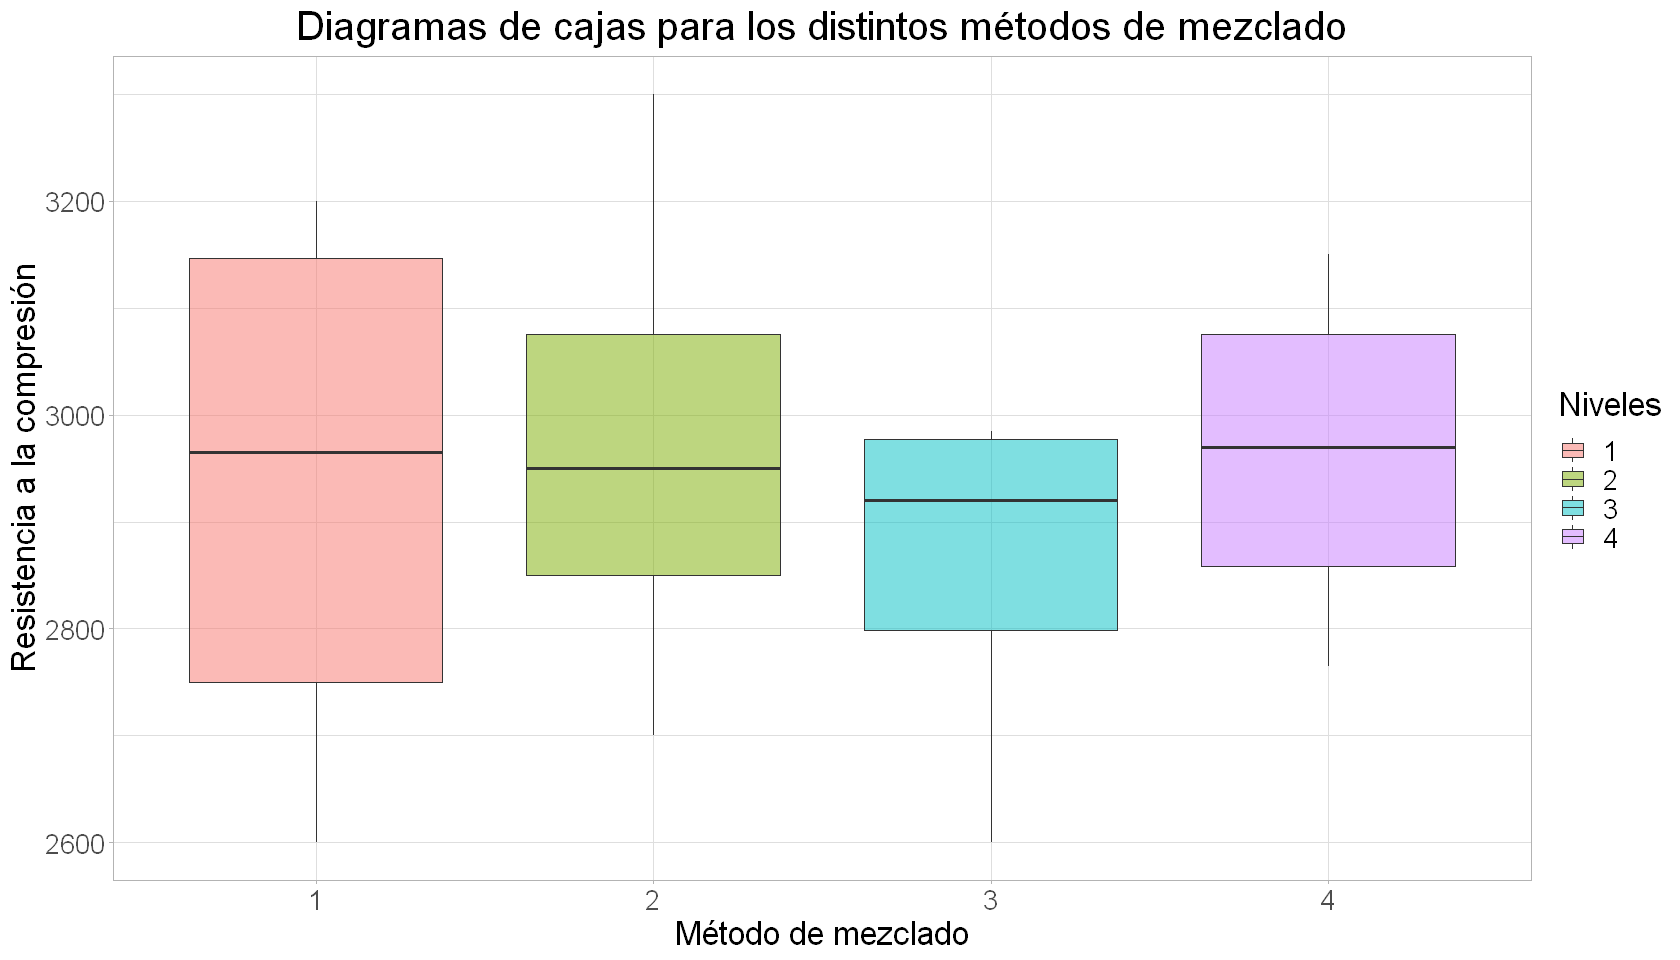

In [10]:
# Plot
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_2, aes(x=mixing_method, y=compression_strength, fill=mixing_method)) +
    labs(
        title="Diagramas de cajas para los distintos métodos de mezclado",
        x="Método de mezclado", 
        y="Resistencia a la compresión",
        fill="Niveles") +
    geom_boxplot(alpha=0.5) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">En primera instancia, los diagramas de cajas sugieren que prodía no existir una diferencia entre los efectos de los métodos de mezclado estudiados.</div>

In [11]:
data_2.levels <- split(data_2 , f=data_2$mixing_method)


In [12]:
# Cálculo de MSTr
grand_mean <- mean(data_2$compression_strength) # media general
treatment_means <- sapply(data_2.levels, function(x) {
    mean(x$compression_strength)
}) # media de cada tratamiento
J <- sapply(data_2.levels, nrow) # cantidad de observaciones para cada tratamiento
SSTr <- sum(J * (treatment_means - grand_mean)^2)
I <- length(data_2.levels) # cantidad de niveles
MSTr <- SSTr / (I - 1)
display_markdown(sprintf('$MSTr = %.f$', MSTr))


$MSTr = 11460$

In [13]:
# Cálculo de MSE
samples <- t(sapply(data_2.levels, function(x) {x$compression_strength})) # matriz con todas las observaciones
residuals <- samples - treatment_means #residuos
SSE <- sum(residuals^2)
N <- sum(J) # cantidad de observaciones
MSE <- SSE / (N - I)
display_markdown(sprintf('$MSE = %.f$', MSE))


$MSE = 50772$

In [14]:
F <- MSTr / MSE
display_markdown(sprintf('$F = %.4f$', F))


$F = 0.2257$

In [15]:
alpha <- 0.05
f_alpha <- qf(alpha, df1=I-1, df2=N-I, lower=FALSE)
display_markdown(sprintf('$f_{\\alpha=%.3f,\\: %.f,\\: %.f} = %.4f$', alpha, I-1, N-I, f_alpha))


$f_{\alpha=0.050,\: 3,\: 12} = 3.4903$

<div style="text-align: justify">Como $F = 0.2257 < 3.4903$, no es posible rechazar la hipótesis nula y se concluye que la técnica de mezclado utilizada no afecta la resistencia del concreto.</div>

<br></br>

#### <div style="text-align: justify">b) Encuentre el p-valor para el estadístico F del inciso a).</div>

In [16]:
p_value <- pf(F, df1=I-1, df2=N-I, lower=FALSE)
display_markdown(sprintf('$\\text{p-valor} = %.4f$', p_value))


$\text{p-valor} = 0.8767$

<div style="text-align: justify">Como el $\text{p-valor} = 0.8767 > 0.05$, se llega a la misma conclusión que en el inciso anterior.</div>

<br></br>

#### <div style="text-align: justify">c) Use el método de Tukey para identificar diferencias específicas entre los porcentajes.</div>

In [17]:
data_2.aov <- aov(compression_strength ~ mixing_method, data_2)
data_2.tukey <- as.data.frame(TukeyHSD(data_2.aov, ordered = TRUE, conf.level = 0.95)[1]$mixing_method)


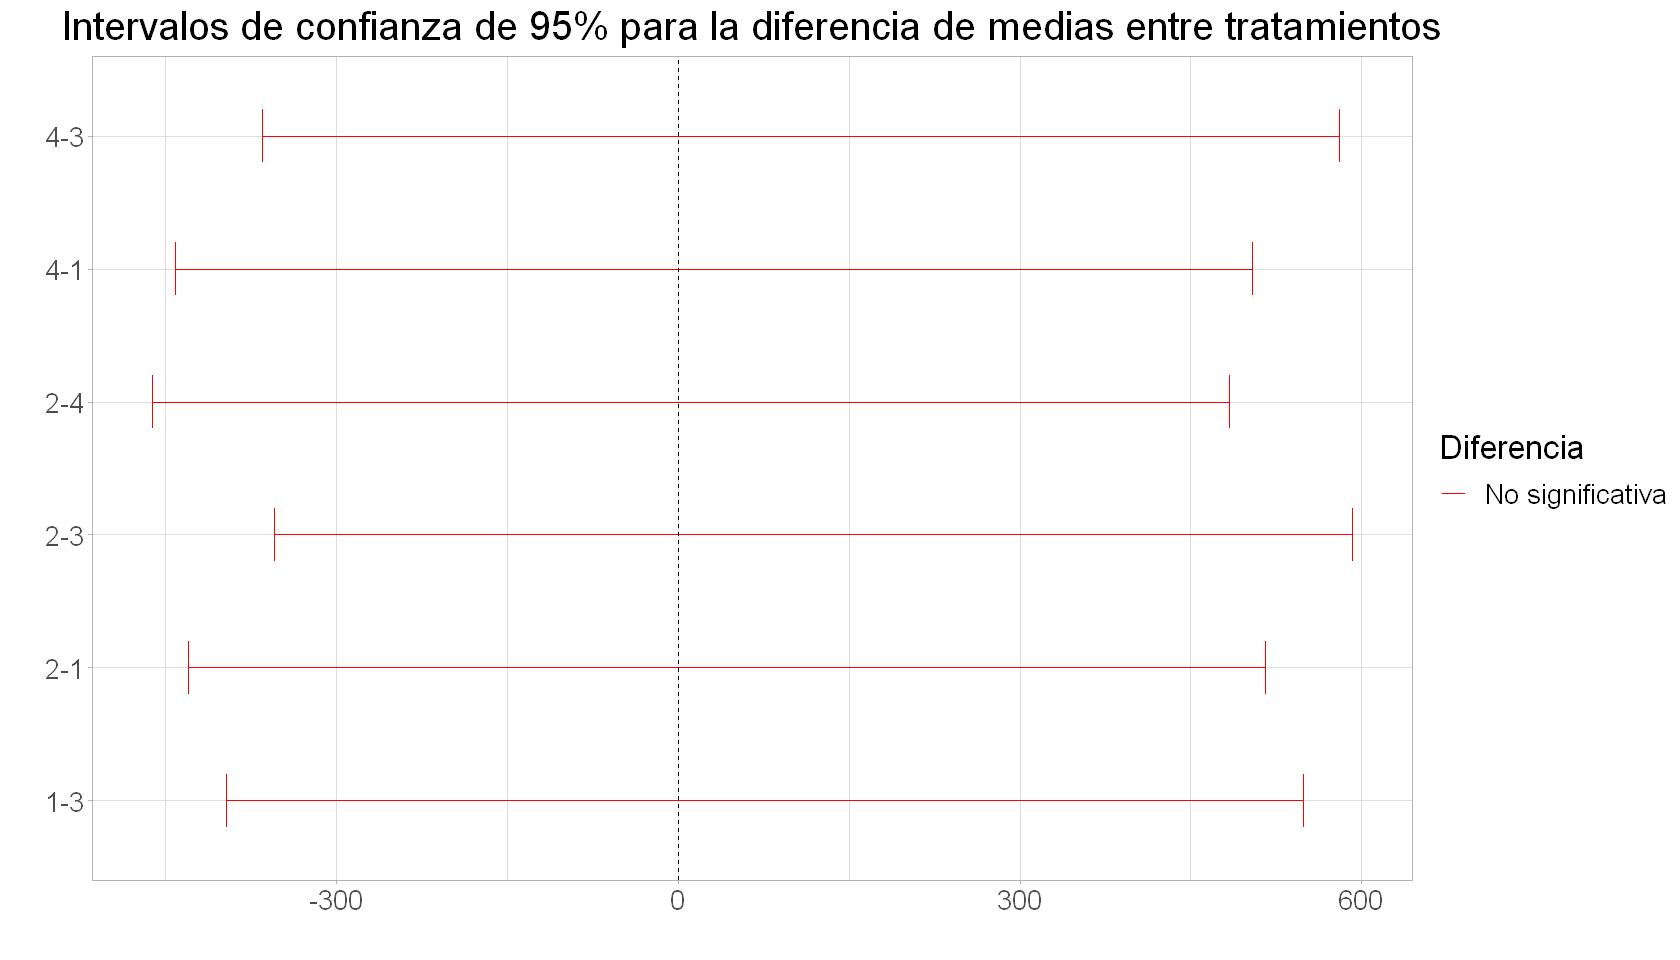

In [18]:
data_2.tukey$names <- c(rownames(data_2.tukey))
# Gráfico de los intervalos de confianza
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_2.tukey, aes(names, diff)) + 
    labs(
        title="Intervalos de confianza de 95% para la diferencia de medias entre tratamientos",
        x="", 
        y="",
        col="Diferencia") +
    geom_errorbar(aes(ymin=lwr, ymax=upr, col=ifelse(lwr*upr > 0,'1','2')), width = 0.4, alpha=1) +
    scale_color_manual(values=c('#05b5f5','#f50505'), labels=c('Significativa','No significativa'), breaks=c('1','2')) +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    theme_light() +
    coord_flip(expand = TRUE) +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Todos los intervalos de confianza contienen al cero, lo cual indica que ningún par de tratamientos presenta una diferencia significativa entre sus medias.</div>

<br></br>

#### <div style="text-align: justify">d) Analice los residuos de este experimento.</div>

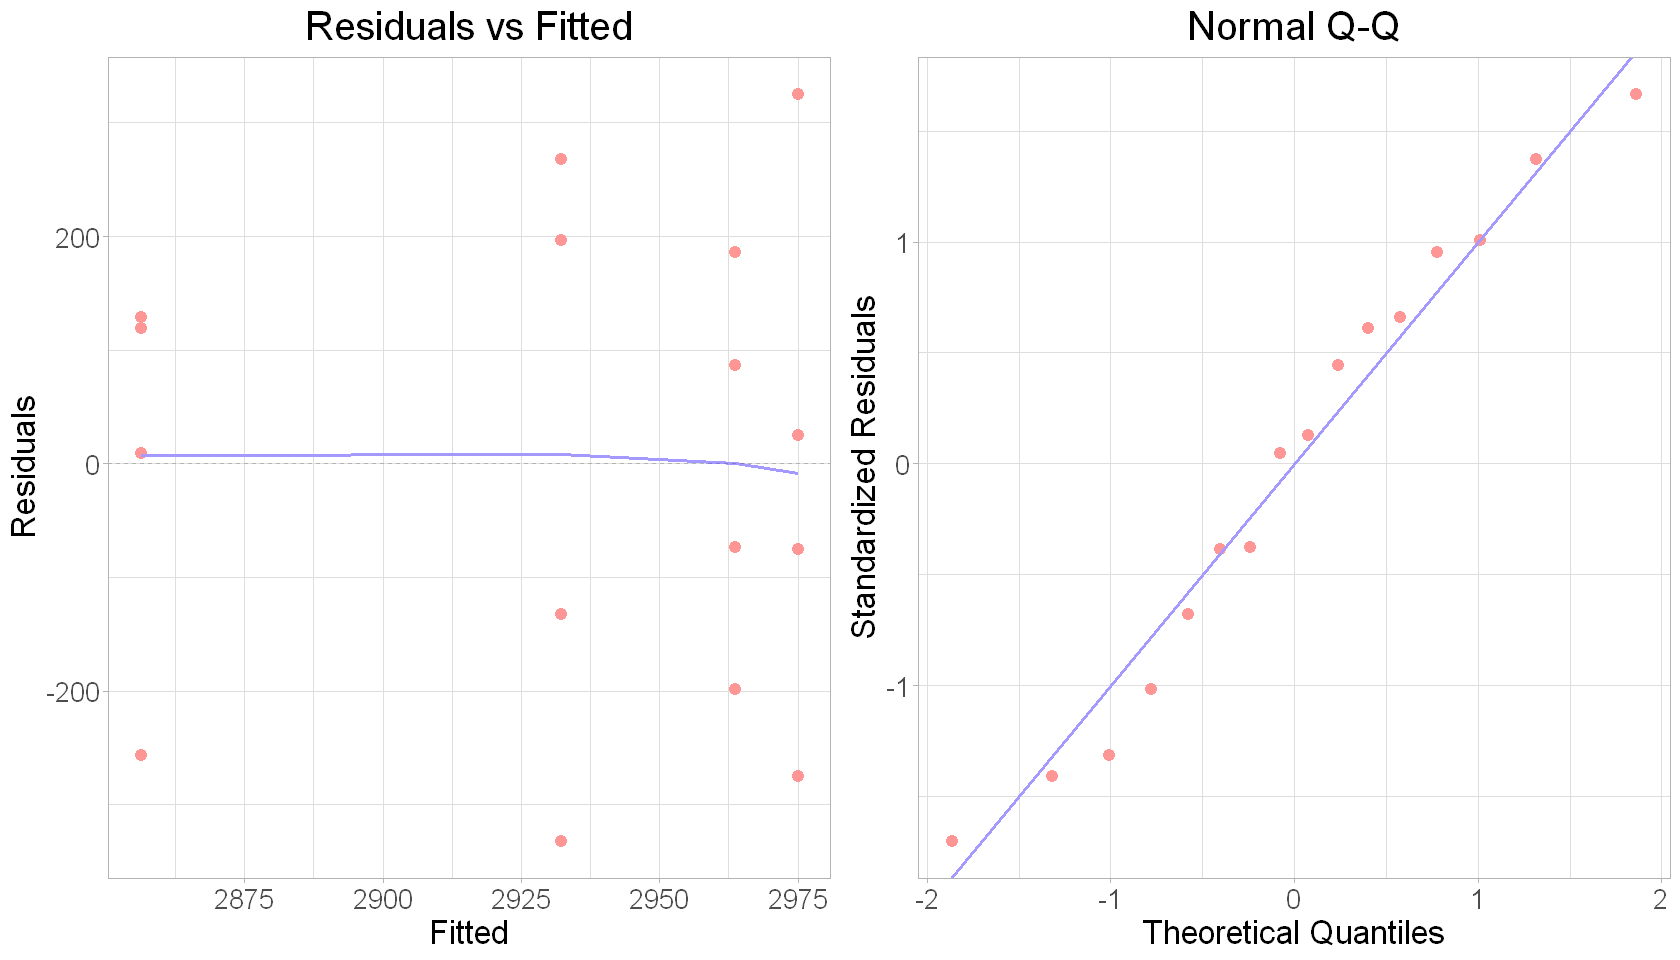

In [19]:
smoothed <- data.frame(with(data_2.aov, lowess(x = data_2.aov$fitted, y = data_2.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_2.aov) + 
    geom_point(aes(x=data_2.aov$fitted, y=data_2.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_2.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">Las gráficas de <i style="color: blue">Residuos vs. Valores ajustados</i> y <i style="color: blue">Residuos estandarizados vs. Cuantiles Teóricos</i> no sugieren violaciones notables de los supuestos de varianza constante y normalidad.</div>

***
<br></br>

### **Ejercicio 3**

#### <div style="text-align: justify">Un ingeniero en electrónica está interesado en el efecto sobre la conductividad de una válvula electrónica que tiene cinco tipos diferentes de recubrimiento para los tubos de rayos catódicos utilizados en un dispositivo de visualización de un sistema de telecomunicaciones. Se obtienen los datos siguientes sobre la conductividad:</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 40%"></th>
            <th colspan="4">Conductividad</th>
        </tr>
        <tr style="font-size: larger">
            <th style="text-align: center">Recubrimiento</th>
            <td style="text-align: center;">1</td>
            <td style="text-align: center;">2</td>
            <td style="text-align: center;">3</td>
            <td style="text-align: center;">4</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">1</td>
            <td style="text-align: center; vertical-align: middle;">143</td>
            <td style="text-align: center; vertical-align: middle;">141</td>
            <td style="text-align: center; vertical-align: middle;">150</td>
            <td style="text-align: center; vertical-align: middle;">146</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">2</td>
            <td style="text-align: center; vertical-align: middle;">152</td>
            <td style="text-align: center; vertical-align: middle;">149</td>
            <td style="text-align: center; vertical-align: middle;">137</td>
            <td style="text-align: center; vertical-align: middle;">143</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">3</td>
            <td style="text-align: center; vertical-align: middle;">134</td>
            <td style="text-align: center; vertical-align: middle;">133</td>
            <td style="text-align: center; vertical-align: middle;">132</td>
            <td style="text-align: center; vertical-align: middle;">127</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">4</td>
            <td style="text-align: center; vertical-align: middle;">147</td>
            <td style="text-align: center; vertical-align: middle;">148</td>
            <td style="text-align: center; vertical-align: middle;">144</td>
            <td style="text-align: center; vertical-align: middle;">142</td>
        </tr>
    </tbody>
</table>

In [20]:
data_3 <- read.csv("./TP4_tables/data3.csv") # Leo los datos desde archivo .csv
data_3$protection <- factor(data_3$protection)


<br></br>

#### <div style="text-align: justify">a) ¿Existe alguna diferencia en la conductividad debida al tipo de recubrimiento? Utilice $\alpha = 0.05$.</div>

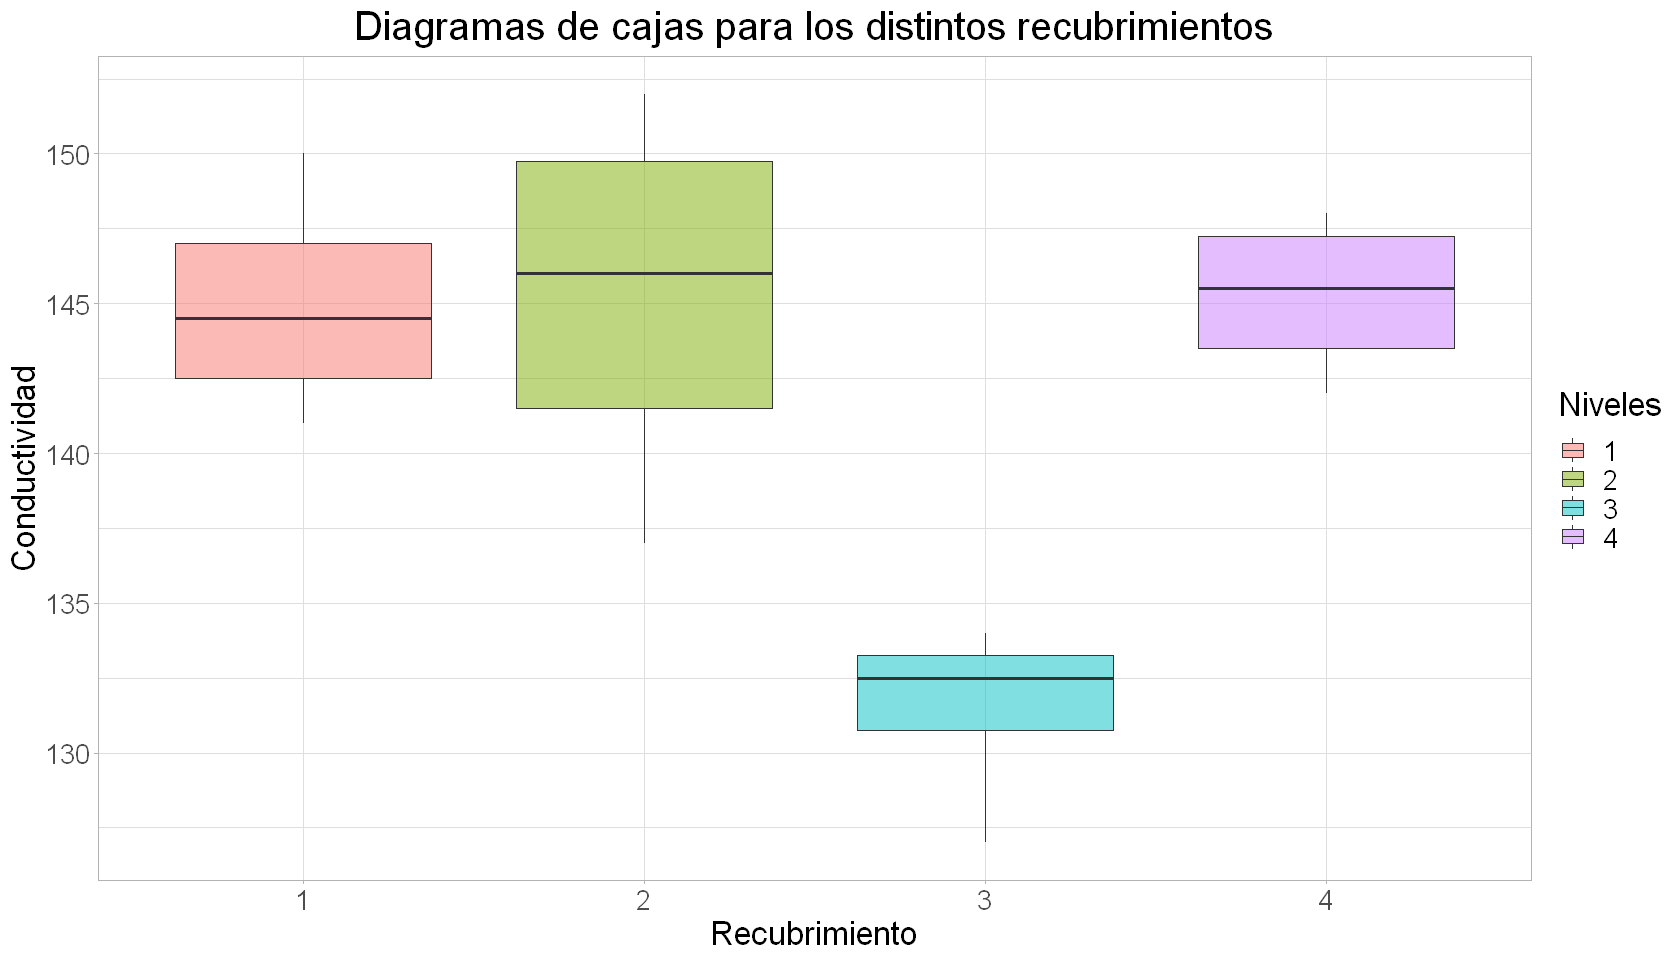

In [21]:
# Plot
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_3, aes(x=protection, y=conductivity, fill=protection)) +
    labs(
        title="Diagramas de cajas para los distintos recubrimientos",
        x="Recubrimiento", 
        y="Conductividad",
        fill="Niveles") +
    geom_boxplot(alpha=0.5) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Los gráficos de cajas sugieren que el recubrimiento tipo 3 produce un efecto diferente al del resto de los recubrimientos estudiados. Para determinar formalmente si existe alguna diferencia en la conductividad debida al tipo de recubrimiento se prueban las hipótesis:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_1 = \mu_2 = \mu_3 = \mu_4,\quad \text{contra }H_1\text{: dos o mas }\mu_i\text{ son diferentes}$$</div>

<div style="text-align: justify">donde $\mu_i$ es la media poblacional del tratamiento $i$ $\left(i = \left[1,\,2,\,3,\,4\right]\right)$.</div>

In [22]:
data_3.aov <- aov(conductivity ~ protection, data_3)
aov_test3 <- summary(data_3.aov)[[1]]


In [23]:
display_markdown('#### **ANOVA de un sentido:**')
aov_test3 <- cbind(c('Porcentaje de algodón', 'Residuos'), aov_test3)
colnames(aov_test3)[1] <- 'Source'
rownames(aov_test3) <- c()
table <- formattable(aov_test3, align=c('l', 'c', 'c', 'c', 'c', 'c'), list(`Source` = formatter("span",style = ~ style('text-align'='left'))))
as.htmlwidget(table, width="70%", height=NULL)


#### **ANOVA de un sentido:**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El p-valor de la prueba es $0.0016 < 0.05$. Por lo tanto, hay evidencia significativa en contra de la hipótesis nula y se puede concluir que al menos dos medias difieren entre sí. Esto significa que el recubrimiento utilizado afecta la conductividad.</div>

<br></br>

#### <div style="text-align: justify">b) Analice los residuos de este experimento.</div>

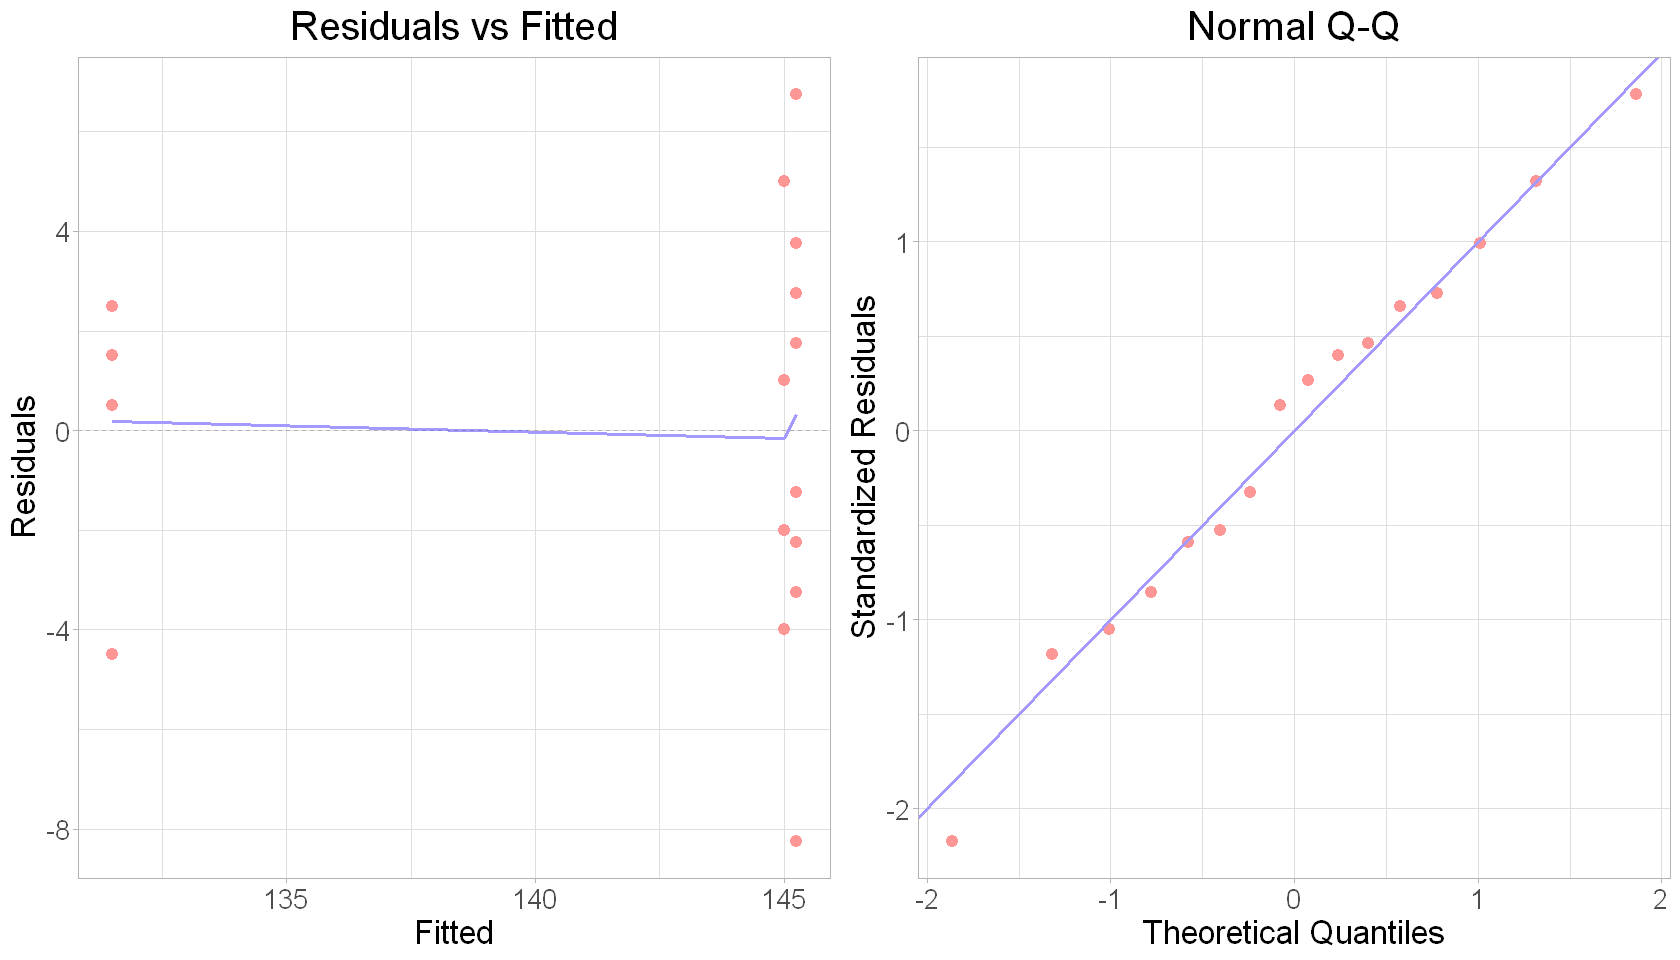

In [24]:
smoothed <- data.frame(with(data_3.aov, lowess(x = data_3.aov$fitted, y = data_3.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_3.aov) + 
    geom_point(aes(x=data_3.aov$fitted, y=data_3.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_3.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">La distribución de los valores en el gráfico de <i style="color: blue">Residuos vs. Valores Ajustados</i> muestra una mayor dispersión para cuanto mayor es el valor ajustado, lo cual puede indicar que la varianza de los residuos no es constante. El gráfico de <i style="color: blue">Residuos estandarizados vs. Cuantiles teóricos</i> no exhibe desviaciones considerables de la recta, y por lo tanto la asunción no normalidad es razonable.</div>

<br></br>

#### <div style="text-align: justify">c) Construya un intervalo del $95\%$ para la estimación de la media del recubrimiento de tipo 1. Construya in intervalo del $99\%$ para la estimación de la diferencia de las medias entre los recubrimientos 1 y 4.</div>

<div style="text-align: justify">Un intervalo de confianza de nivel $\left(1 - \alpha\right)\%$ para la media del tratamiento $i$ está dado por:</div>

#### <div style="text-align: center">$$\overline{X}_i \pm t_{N-I,\, \alpha/2}\sqrt{\frac{MSE}{J_i}}$$</div>

In [25]:
data_3.levels <- split(data_3 , f=data_3$protection)
sample_mean <- mean(data_3.levels[[1]]$conductivity) # media muestral para el recubrimiento tipo 1
display_markdown(sprintf('$\\overline{X}_1 = %.f$', sample_mean))


$\overline{X}_1 = 145$

In [26]:
J <- sapply(data_3.levels, nrow) # cantidad de observaciones para cada tratamiento
I <- length(data_3.levels) # cantidad de niveles
N <- sum(J) # número total de observaciones
samples <- t(sapply(data_3.levels, function(x) {x$conductivity})) # matriz con todas las observaciones
treatment_means <- sapply(data_3.levels, function(x) {
    mean(x$conductivity)
}) # media de cada tratamiento
residuals <- samples - treatment_means #residuos
SSE <- sum(residuals^2)
MSE <- SSE / (N - I)
display_markdown(sprintf('$MSE = %.4f$', MSE))


$MSE = 19.2083$

In [27]:
alpha <- 0.05
t <- qt(alpha/2, N-I, lower=FALSE) # distribución t de Student con alpha=0.05/2 y N-I grados de libertad
aux <- t * sqrt(MSE / J[1])
conf_int <- c(sample_mean - aux, sample_mean + aux) # intervalo de confianza
conf_int.df <- as.data.frame(cbind('Tratamiento 1', round(conf_int[1], 4), sample_mean, round(conf_int[2], 4)))
colnames(conf_int.df) <- c(' ', '2.5%', 'Media estimada', '97.5%')


In [28]:
display_markdown('#### **Intervalo de confianza del $\\textbf{95%}$ para la estimación de la media del recubrimiento tipo 1:**')
rownames(conf_int.df) <- c()
as.htmlwidget(formattable(conf_int.df, align='c', list(' ' = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left')))), width="50%")


#### **Intervalo de confianza del $\textbf{95%}$ para la estimación de la media del recubrimiento tipo 1:**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">Para contruir un intervalo de confianza para la diferencia entre las medias de dos tratamientos específicos, se utiliza el método de la diferencia significativa mínima de Fisher. El intervalo de nivel $\left(1 - \alpha\right)$ para la diferencia $\mu_i - \mu_j$ es:</div>

#### <div style="text-align: center">$$\overline{X}_i - \overline{X}_j \pm t_{N-I,\, \alpha/2}\sqrt{\frac{MSE}{J_i} + \frac{MSE}{J_j}}$$</div>

In [29]:
x_bar_1 <- mean(data_3.levels[[1]]$conductivity) # media muestral para el recubrimiento tipo 1
x_bar_4 <- mean(data_3.levels[[4]]$conductivity) # media muestral para el recubrimiento tipo 4
x_bar_diff <- x_bar_1 - x_bar_4
display_markdown(sprintf('$\\overline{X}_1 - \\overline{X}_4 = %.2f$', x_bar_diff))


$\overline{X}_1 - \overline{X}_4 = -0.25$

In [30]:
alpha <- 0.01
t <- qt(alpha/2, N-I, lower=FALSE) # distribución t de Student con alpha=0.05/2 y N-I grados de libertad
aux <- t * sqrt(MSE / J[1] + MSE / J[4])
conf_int <- c(x_bar_diff - aux, x_bar_diff + aux) # intervalo de confianza
conf_int.df <- as.data.frame(cbind('μ1 - μ4', round(conf_int[1], 4), x_bar_diff, round(conf_int[2], 4)))
colnames(conf_int.df) <- c(' ', '0.5%', 'Valor estimado', '99.5%')


In [31]:
display_markdown('#### **Intervalo de confianza del $\\textbf{99%}$ para la estimación de $\\mu_1 - \\mu_4$:**')
rownames(conf_int.df) <- c()
as.htmlwidget(formattable(conf_int.df, align='c', list(' ' = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left')))), width="50%")


#### **Intervalo de confianza del $\textbf{99%}$ para la estimación de $\mu_1 - \mu_4$:**

HTML widgets cannot be represented in plain text (need html)

***
<br></br>

### **Ejercicio 4**

#### <div style="text-align: justify">Se determina el tiempo de respuesta, en milisegundos, para tres tipos diferentes de circuitos en una calculadora electrónica. Los resultados son los siguientes:</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 40%"></th>
            <th colspan="5">Tiempo de respuesta (ms)</th>
        </tr>
        <tr style="font-size: larger">
            <th style="text-align: center">Tipo de circuito</th>
            <td style="text-align: center;">1</td>
            <td style="text-align: center;">2</td>
            <td style="text-align: center;">3</td>
            <td style="text-align: center;">4</td>
            <td style="text-align: center;">5</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">1</td>
            <td style="text-align: center; vertical-align: middle;">19</td>
            <td style="text-align: center; vertical-align: middle;">22</td>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
            <td style="text-align: center; vertical-align: middle;">25</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">2</td>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">21</td>
            <td style="text-align: center; vertical-align: middle;">33</td>
            <td style="text-align: center; vertical-align: middle;">27</td>
            <td style="text-align: center; vertical-align: middle;">40</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">3</td>
            <td style="text-align: center; vertical-align: middle;">16</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">18</td>
            <td style="text-align: center; vertical-align: middle;">26</td>
            <td style="text-align: center; vertical-align: middle;">17</td>
        </tr>
    </tbody>
</table>

In [32]:
data_4 <- read.csv("./TP4_tables/data4.csv") # Leo los datos desde archivo .csv
data_4$circuit <- factor(data_4$circuit)


<br></br>

#### <div style="text-align: justify">a) Utilice $\alpha = 0.01$ para probar la hipótesis de que el tiempo de respuesta de los tres circuitos es el mismo.</div>

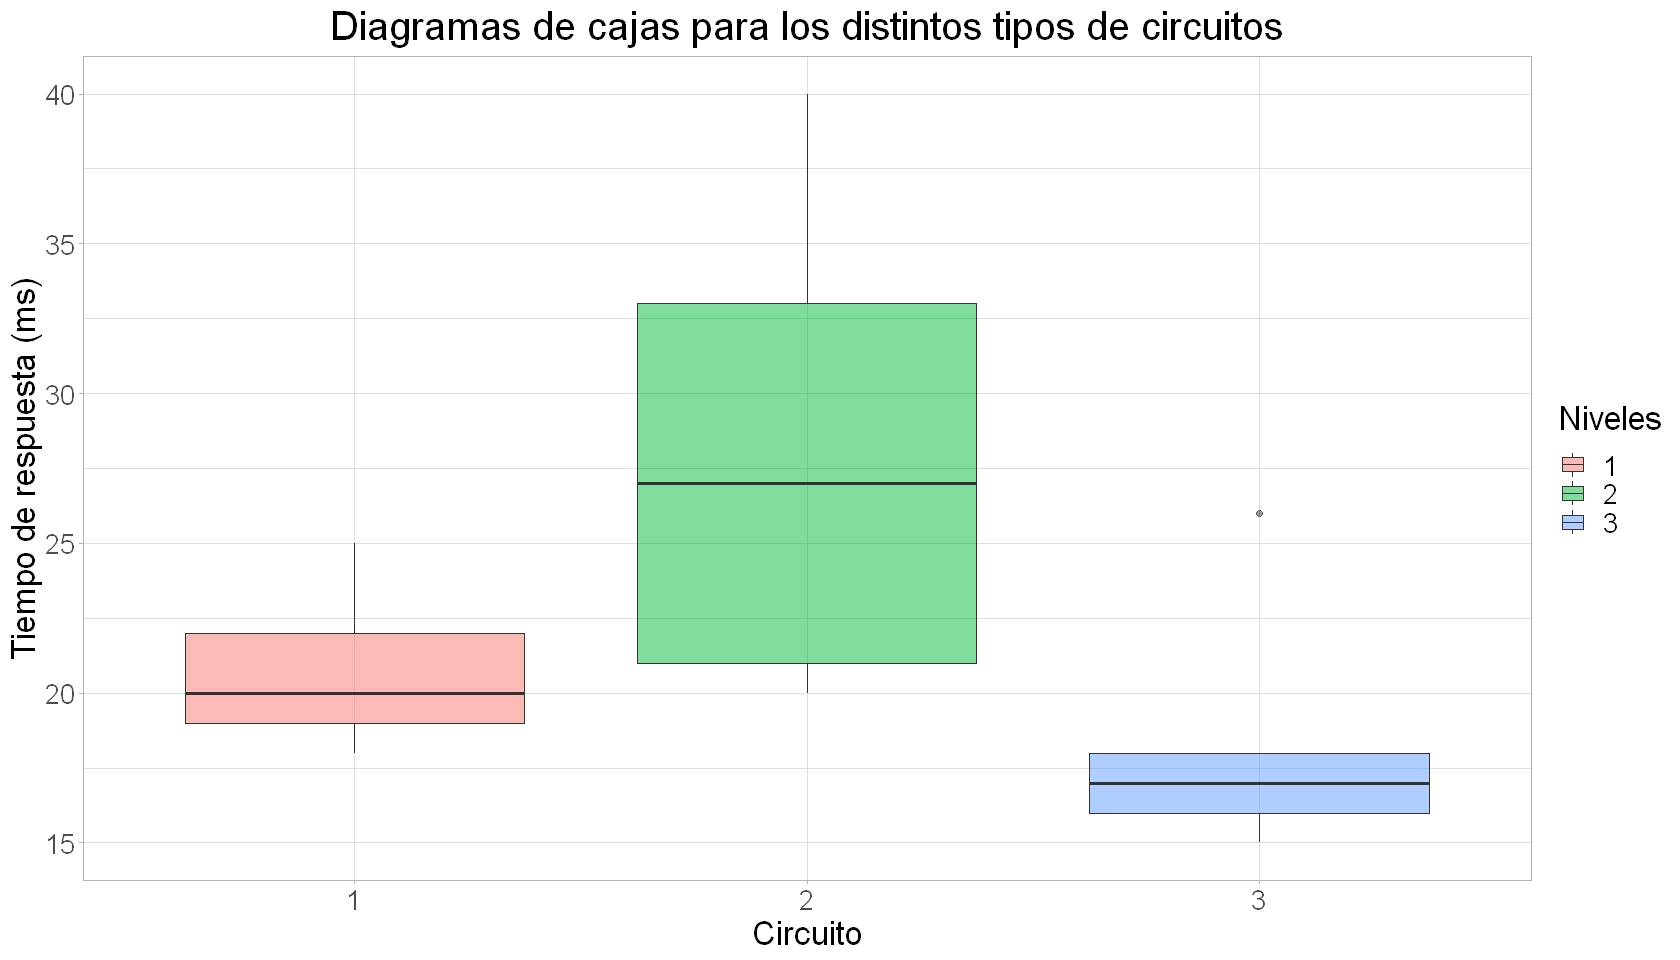

In [33]:
# Plot
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_4, aes(x=circuit, y=response_time, fill=circuit)) +
    labs(
        title="Diagramas de cajas para los distintos tipos de circuitos",
        x="Circuito", 
        y="Tiempo de respuesta (ms)",
        fill="Niveles") +
    geom_boxplot(alpha=0.5) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Un análisis visual sugiere que el tipo de ciruito utilizado afecta al tiempo de respuesta de la  calculadora, y que los mejores resultados se obtienen con el circuito tipo 3. La hipótesis a probar es:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_1 = \mu_2 = \mu_3,\quad \text{contra }H_1\text{: dos o mas }\mu_i\text{ son diferentes}$$</div>

In [34]:
data_4.aov <- aov(response_time ~ circuit, data_4)
aov_test4 <- summary(data_4.aov)[[1]]


In [35]:
display_markdown('#### **ANOVA de un sentido:**')
aov_test4 <- cbind(c('Porcentaje de algodón', 'Residuos'), aov_test4)
colnames(aov_test4)[1] <- 'Source'
rownames(aov_test4) <- c()
table <- formattable(aov_test4, align=c('l', 'c', 'c', 'c', 'c', 'c'), list(`Source` = formatter("span",style = ~ style('text-align'='left'))))
as.htmlwidget(table, width="70%", height=NULL)


#### **ANOVA de un sentido:**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">La prueba arroja un $\text{p-valor} = 0.0465 > 0.01$. Por lo tanto, no hay evidencia suficiente en contra de la hipótesis nula y se concluye que el tipo de circuito utilizado no afecta el tiempo de respuesta de la calculadora.</div>

<br></br>

#### <div style="text-align: justify">b) Analice los residuos de este experimento.</div>

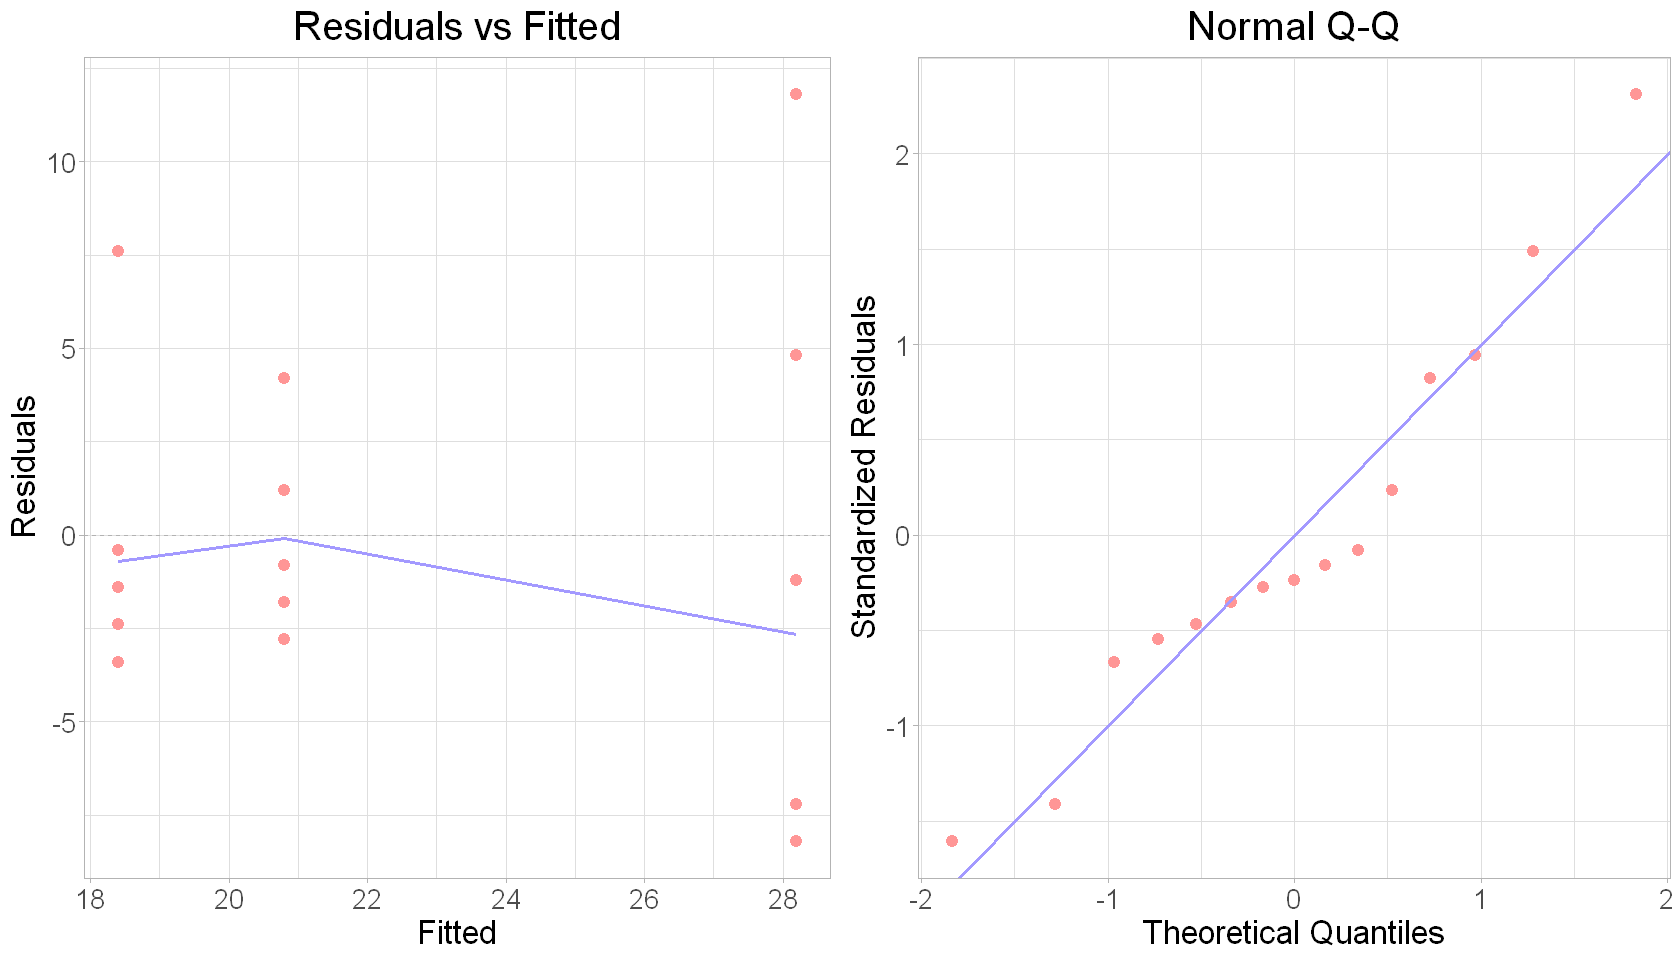

In [36]:
smoothed <- data.frame(with(data_4.aov, lowess(x = data_4.aov$fitted, y = data_4.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_4.aov) + 
    geom_point(aes(x=data_4.aov$fitted, y=data_4.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_4.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">
    <b>Análisis de residuos</b>
    <ul>
        <li>Se observa una mayor dispersión de los residuos en el extremo derecho del gráfico, lo cual puede indicar que la varianza de los residuos no es constante.</li>
        <li>Las desviaciones respecto a la recta normal en el gráfico Q-Q no permiten asumir normalidad.</li>
    </ul>
</div>

<div style="text-align: justify">Un intervalo de confianza de nivel $\left(1 - \alpha\right)\%$ para la media del tratamiento $i$ está dado por:</div>

#### <div style="text-align: center">$$\overline{X}_i \pm t_{N-I,\, \alpha/2}\sqrt{\frac{MSE}{J_i}}$$</div>

#### <div style="text-align: justify">c) Encuentre un intervalo de confianza del $95\%$ para el tiempo de respuesta del tercer circuito.</div>

In [37]:
data_4.levels <- split(data_4 , f=data_4$circuit)
x_bar_3 <- mean(data_4.levels[[3]]$response_time) # media muestral para el recubrimiento tipo 4
display_markdown(sprintf('$\\overline{X}_3 = %.2f$', x_bar_3))


$\overline{X}_3 = 18.40$

In [38]:
J <- sapply(data_4.levels, nrow) # cantidad de observaciones para cada tratamiento
I <- length(data_4.levels) # cantidad de niveles
N <- sum(J) # número total de observaciones
samples <- t(sapply(data_4.levels, function(x) {x$response_time})) # matriz con todas las observaciones
treatment_means <- sapply(data_4.levels, function(x) {
    mean(x$response_time)
}) # media de cada tratamiento
residuals <- samples - treatment_means #residuos
SSE <- sum(residuals^2)
MSE <- SSE / (N - I)
display_markdown(sprintf('$MSE = %.4f$', MSE))


$MSE = 32.5667$

In [39]:
alpha <- 0.05
t <- qt(alpha/2, N-I, lower=FALSE) # distribución t de Student con alpha=0.05/2 y N-I grados de libertad
aux <- t * sqrt(MSE / J[1])
conf_int <- c(x_bar_3 - aux, x_bar_3 + aux) # intervalo de confianza
conf_int.df <- as.data.frame(cbind('Tratamiento 3', round(conf_int[1], 4), sample_mean, round(conf_int[2], 4)))
colnames(conf_int.df) <- c(' ', '2.5%', 'Media estimada', '97.5%')


In [40]:
display_markdown('#### **Intervalo de confianza del $\\textbf{95%}$ para el tiempo de respuesta del tercer cicuito:**')
rownames(conf_int.df) <- c()
as.htmlwidget(formattable(conf_int.df, align='c', list(' ' = formatter("span",style = ~ style(
    'font-weight'='bold', 'text-align'='left')))), width="50%")


#### **Intervalo de confianza del $\textbf{95%}$ para el tiempo de respuesta del tercer cicuito:**

HTML widgets cannot be represented in plain text (need html)

***
<br></br>

### **Ejercicio 5**

#### <div style="text-align: justify">Para investigar el efecto de la temperatura de secado del grano de trigo sobre la calidad del horneado del pan se realiza un experimento en donde se emplean tres niveles de temperatura, y la variable de respuesta medida es el volumen de la hogaza de pan producida. Los datos son los siguientes:</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 35%">Temperatura (ºC)</th>
            <th colspan="5">Volumen (cc)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">70.0</td>
            <td style="text-align: center; vertical-align: middle;">1245</td>
            <td style="text-align: center; vertical-align: middle;">1235</td>
            <td style="text-align: center; vertical-align: middle;">1285</td>
            <td style="text-align: center; vertical-align: middle;">1245</td>
            <td style="text-align: center; vertical-align: middle;">1235</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">75.0</td>
            <td style="text-align: center; vertical-align: middle;">1235</td>
            <td style="text-align: center; vertical-align: middle;">1240</td>
            <td style="text-align: center; vertical-align: middle;">1200</td>
            <td style="text-align: center; vertical-align: middle;">1220</td>
            <td style="text-align: center; vertical-align: middle;">1210</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">80.0</td>
            <td style="text-align: center; vertical-align: middle;">1225</td>
            <td style="text-align: center; vertical-align: middle;">1200</td>
            <td style="text-align: center; vertical-align: middle;">1170</td>
            <td style="text-align: center; vertical-align: middle;">1155</td>
            <td style="text-align: center; vertical-align: middle;">1095</td>
        </tr>
    </tbody>
</table>

In [41]:
data_5 <- read.csv("./TP4_tables/data5.csv") # Leo los datos desde archivo .csv
data_5$temperature <- factor(data_5$temperature)


<br></br>

#### <div style="text-align: justify">a) ¿La temperatura de secado afecta el volumen promedio del pan? Utilice $\alpha = 0.01$.</div>

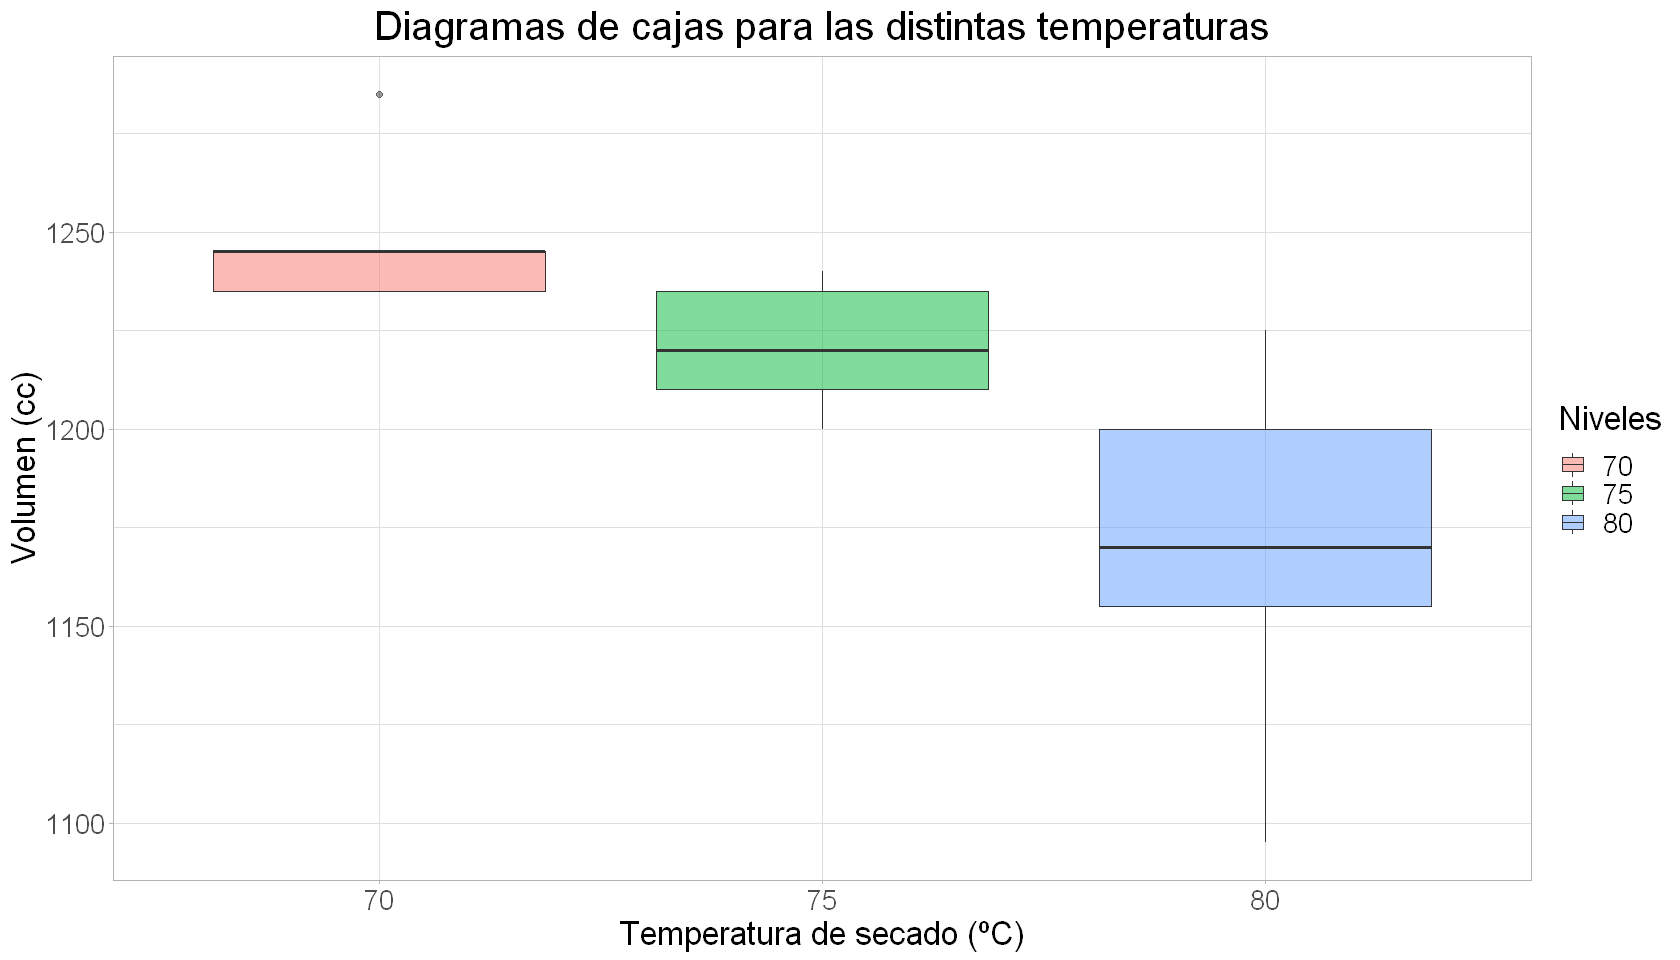

In [42]:
# Plot
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_5, aes(x=temperature, y=volume, fill=temperature)) +
    labs(
        title="Diagramas de cajas para las distintas temperaturas",
        x="Temperatura de secado (ºC)", 
        y="Volumen (cc)",
        fill="Niveles") +
    geom_boxplot(alpha=0.5) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Los gráficos de cajas sugieren que la temperatura de secado afecta el volumen del pan. Las hipótesis de la prueba son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_1 = \mu_2 = \mu_3,\quad \text{contra }H_1\text{: dos o mas }\mu_i\text{ son diferentes}$$</div>

In [43]:
data_5.levels <- split(data_5 , f=data_5$temperature)
model_5 <- lm(volume ~ temperature, data_5)


In [44]:
# Cálculo de MSTr
J <- sapply(data_5.levels, nrow) # cantidad de observaciones para cada tratamiento
I <- length(data_5.levels) # cantidad de niveles
SSTr <- sum((predict(model_5) - mean(data_5$volume))^2) 
MSTr <- SSTr / (I - 1)
display_markdown(sprintf('$MSTr = %.2f$', MSTr))


$MSTr = 8240.00$

In [45]:
# Cálculo de MSE
N <- sum(J) # cantidad total de observaciones
SSE <- sum(model_5$residuals^2)
MSE <- SSE / (N - I)
display_markdown(sprintf('$MSE = %.2f$', MSE))


$MSE = 1050.83$

In [46]:
F <- MSTr / MSE
display_markdown(sprintf('$F = %.4f$', F))


$F = 7.8414$

In [47]:
alpha <- 0.01
f_alpha <- qf(alpha, df1=I-1, df2=N-I, lower=FALSE)
display_markdown(sprintf('$f_{\\alpha=%.3f,\\: %.f,\\: %.f} = %.4f$', alpha, I-1, N-I, f_alpha))


$f_{\alpha=0.010,\: 2,\: 12} = 6.9266$

<div style="text-align: justify">El valor del estadístico es $F = 7.8414 > 6.9266$. Por lo tanto, hay evidencia significativa en contra de la hipótesis nula y se concluye que la temperatura de secado del grano de trigo tiene un efecto sobre el volumen de la hogaza de pan.</div>

<br></br>

#### <div style="text-align: justify">b) Encuentre el p-valor de esta prueba.</div>

In [48]:
p_value <- pf(F, df1=I-1, df2=N-I, lower=FALSE)
display_markdown(sprintf('$\\text{p-valor} = %.4f$', p_value))


$\text{p-valor} = 0.0066$

<div style="text-align: justify">Como el $\text{p-valor} = 0.0066 > 0.01$, se llega a la misma conclusión que en el inciso anterior.</div>

<br></br>

#### <div style="text-align: justify">c) Use el método de Tukey para identificar qué medias son diferentes.</div>

In [49]:
data_5.aov <- aov(volume ~ temperature, data_5)
data_5.tukey <- as.data.frame(TukeyHSD(data_5.aov, ordered = TRUE, conf.level = 0.95)[1]$temperature)


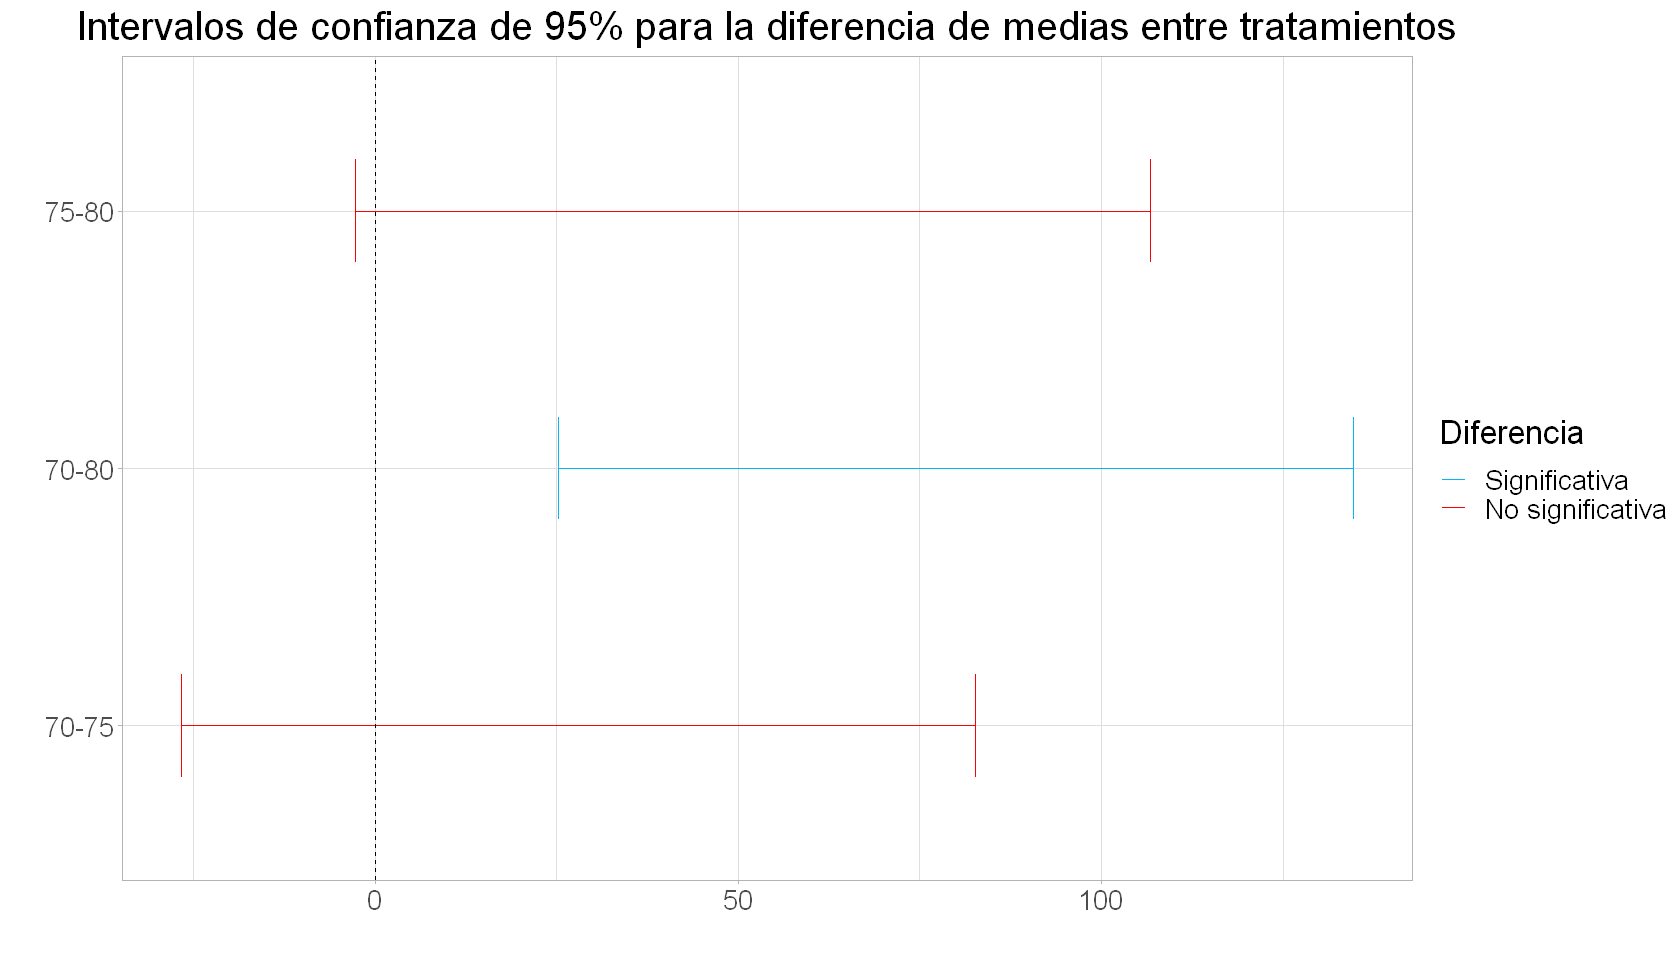

In [50]:
data_5.tukey$names <- c(rownames(data_5.tukey))
# Gráfico de los intervalos de confianza
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_5.tukey, aes(names, diff)) + 
    labs(
        title="Intervalos de confianza de 95% para la diferencia de medias entre tratamientos",
        x="", 
        y="",
        col="Diferencia") +
    geom_errorbar(aes(ymin=lwr, ymax=upr, col=ifelse(lwr*upr > 0,'1','2')), width = 0.4, alpha=1) +
    scale_color_manual(values=c('#05b5f5','#f50505'), labels=c('Significativa','No significativa'), breaks=c('1','2')) +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    theme_light() +
    coord_flip(expand = TRUE) +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">El gráfico anterior indica que existe una diferencia entre las medias de los tratamientos correspondientes a las temperaturas $70 ºC$ y $80 ºC$.</div>

<br></br>

#### <div style="text-align: justify">d) Analice los residuos de este experimento y haga un comentario sobre la adecuación del modelo.</div>

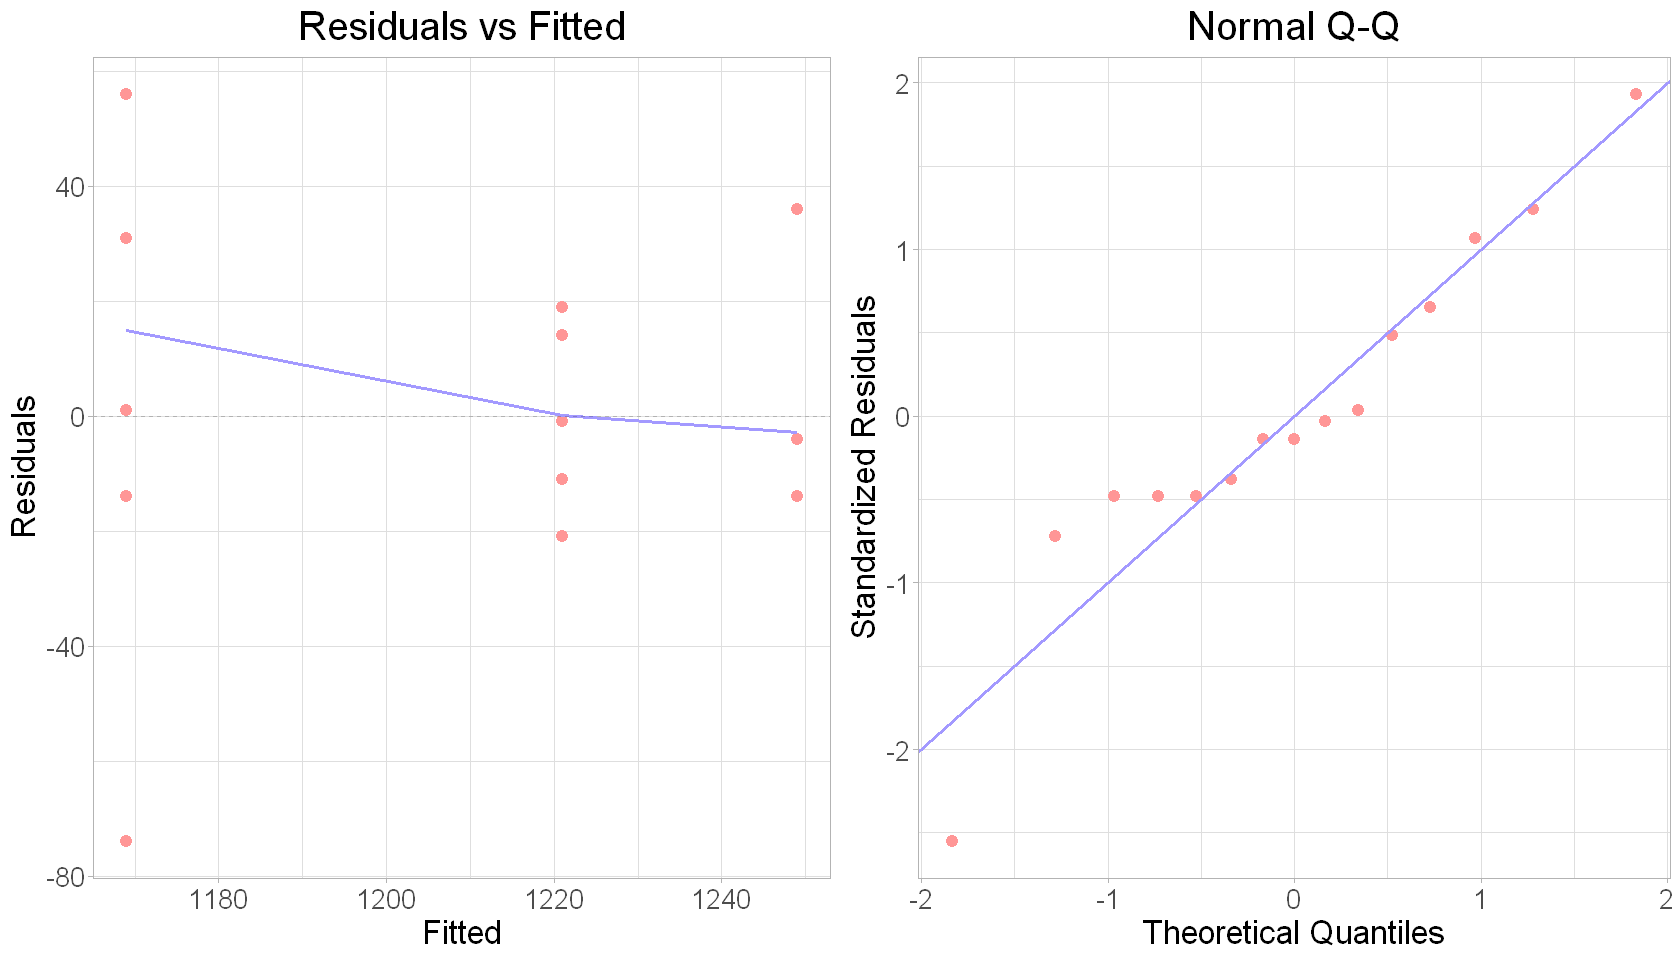

In [51]:
smoothed <- data.frame(with(data_5.aov, lowess(x = data_5.aov$fitted, y = data_5.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_5.aov) + 
    geom_point(aes(x=data_5.aov$fitted, y=data_5.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_5.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">La distribución de los valores en el gráfico de <i style="color: blue">Residuos vs. Valores Ajustados</i> no permite suponer que la varianza es constante. El gráfico de <i style="color: blue">Residuos estandarizados vs. Cuantiles teóricos</i> muestra desviaciones considerables respecto a la recta normal.</div>

***
<br></br>

### **Ejercicio 6**

#### <div style="text-align: justify">Se realiza un experimento para determinar el efecto que tienen cuatro tipos diferentes de puntas de un probador de dureza sobre los valores de dureza observados de una aleación. Para ello se obtienen cuatro especímenes de aleación, y se prueba cada punta sobre cada uno de ellos. Los datos obtenidos son los siguientes:</div>

<table style="width: 50%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 30%" rowSpan="2">Tipo de punta</th>
            <th colspan="4">Espécimen</th>
        </tr>
        <tr style="font-size: larger">
            <th>1</th>
            <th>2</th>
            <th>3</th>
            <th>4</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">1</td>
            <td style="text-align: center; vertical-align: middle;">9.3</td>
            <td style="text-align: center; vertical-align: middle;">9.4</td>
            <td style="text-align: center; vertical-align: middle;">9.6</td>
            <td style="text-align: center; vertical-align: middle;">10.0</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">2</td>
            <td style="text-align: center; vertical-align: middle;">9.4</td>
            <td style="text-align: center; vertical-align: middle;">9.3</td>
            <td style="text-align: center; vertical-align: middle;">9.8</td>
            <td style="text-align: center; vertical-align: middle;">9.9</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">3</td>
            <td style="text-align: center; vertical-align: middle;">9.2</td>
            <td style="text-align: center; vertical-align: middle;">9.4</td>
            <td style="text-align: center; vertical-align: middle;">9.5</td>
            <td style="text-align: center; vertical-align: middle;">9.7</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">4</td>
            <td style="text-align: center; vertical-align: middle;">9.7</td>
            <td style="text-align: center; vertical-align: middle;">9.6</td>
            <td style="text-align: center; vertical-align: middle;">10.0</td>
            <td style="text-align: center; vertical-align: middle;">10.2</td>
        </tr>
    </tbody>
</table>

In [52]:
data_6 <- read.csv("./TP4_tables/data6.csv") # Leo los datos desde archivo .csv
data_6$indenter <- factor(data_6$indenter)
data_6$specimen <- factor(data_6$specimen)


<br></br>

#### <div style="text-align: justify">a) ¿Existe alguna diferencia en las mediciones de dureza entre las puntas? Utilice $\alpha = 0.01$.</div>

<div style="text-align: justify">Este experimento implica un diseño de bloques, donde el tipo de punta utilizada es el factor de interés y el espécimen sobre el cual se realiza la prueba es el factor bloqueado.</div>

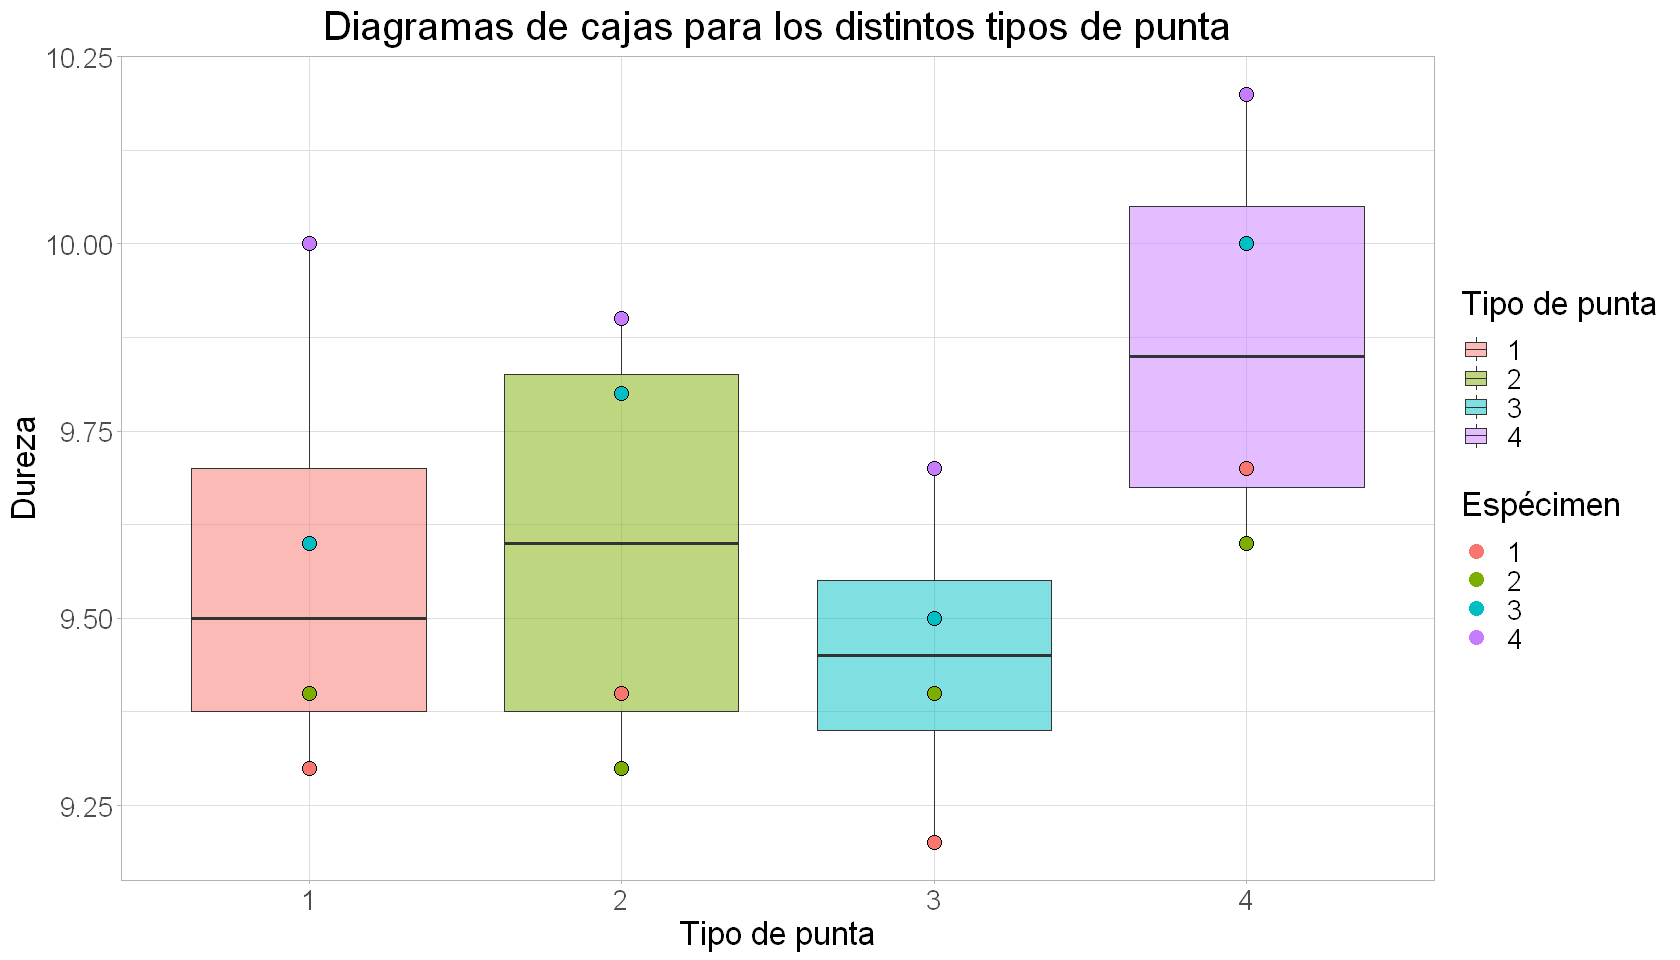

In [53]:
# Plot
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_6, aes(x=indenter, y=hardness, fill=indenter)) +
    labs(
        title="Diagramas de cajas para los distintos tipos de punta",
        x="Tipo de punta", 
        y="Dureza",
        fill="Tipo de punta",
        col="Espécimen") +
    geom_boxplot(alpha=0.5, aes(fill=indenter)) +
    geom_point(aes(col=specimen), size=4) +
    geom_point(size=4, shape=1) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5)) +
    guides(fill = guide_legend(override.aes = list(shape = NA), order = 1))


<div style="text-align: justify">Los gráficos de cajas sugieren que el tipo de punta utilizado podría no afectar significativamente a la lectura de dureza del espécimen. Las hipótesis de la prueba son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_1 = \mu_2 = \mu_3,\quad \text{contra }H_1\text{: dos o mas }\mu_i\text{ son diferentes}$$</div>

In [54]:
data_6.aov <- aov(hardness ~ indenter + specimen, data_6)
aov_test6 <- summary(data_6.aov)[[1]]


In [55]:
display_markdown('#### **ANOVA de dos sentidos: Dureza vs Tipo de punta + Espécimen (bloqueado)**')
display_markdown('\n')
aov_test6 <- cbind(c('Tipo de punta', 'Espécimen', 'Residuos'), aov_test6)
colnames(aov_test6)[1] <- 'Source'
rownames(aov_test6) <- c()
table <- formattable(aov_test6, align=c('l', 'c', 'c', 'c', 'c', 'c'), list(`Source` = formatter("span",style = ~ style('text-align'='left'))))
as.htmlwidget(table, width="70%", height=NULL)


#### **ANOVA de dos sentidos: Dureza vs Tipo de punta + Espécimen (bloqueado)**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El p-valor para el factor <b><i>Tipo de punta</i></b> es $0.0009 < 0.01$. Por lo tanto, se rechaza la hipótesis nula y se concluye que el tipo de punta utilizada afecta al valor obtenido en la prueba de dureza.</div>

<br></br>

#### <div style="text-align: justify">b) Use el método de Tukey para identificar diferencias específicas entre las puntas. Analice los residuos de este experimento.</div>

In [56]:
data_6.tukey <- as.data.frame(TukeyHSD(data_6.aov, ordered = TRUE, conf.level = 0.95)[1]$indenter)


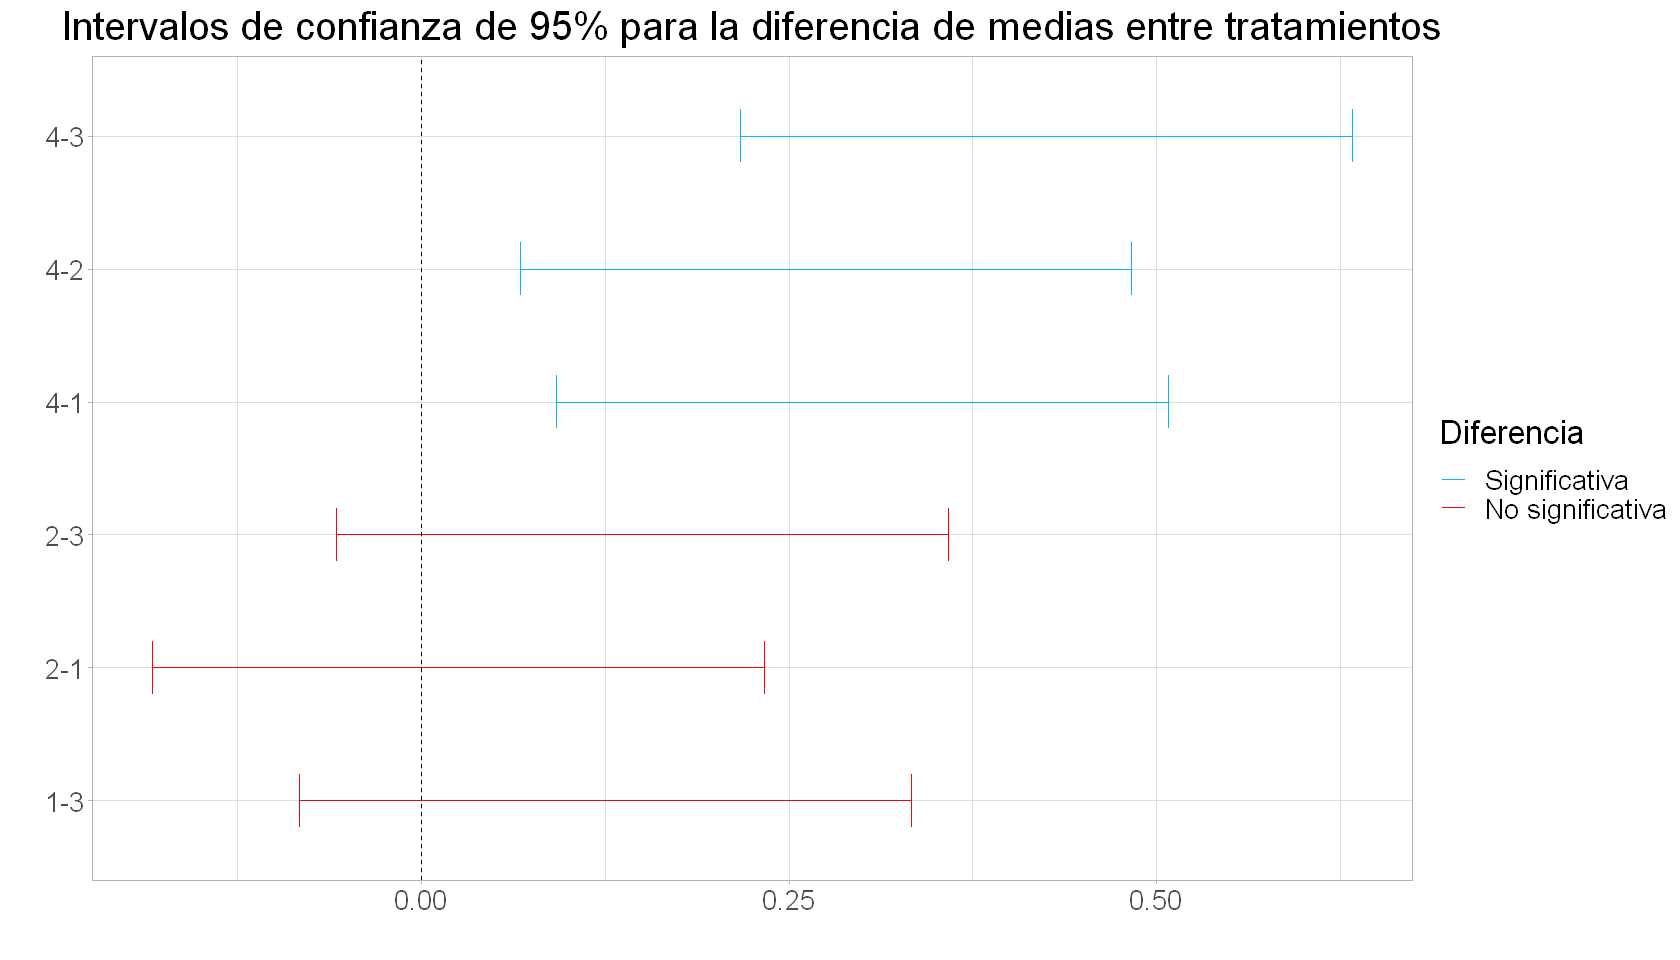

In [57]:
data_6.tukey$names <- c(rownames(data_6.tukey))
# Gráfico de los intervalos de confianza
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_6.tukey, aes(names, diff)) + 
    labs(
        title="Intervalos de confianza de 95% para la diferencia de medias entre tratamientos",
        x="", 
        y="",
        col="Diferencia") +
    geom_errorbar(aes(ymin=lwr, ymax=upr, col=ifelse(lwr*upr > 0,'1','2')), width = 0.4, alpha=1) +
    scale_color_manual(values=c('#05b5f5','#f50505'), labels=c('Significativa','No significativa'), breaks=c('1','2')) +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    theme_light() +
    coord_flip(expand = TRUE) +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Los intervalos de confianza obtenidos indican que la punta tipo 4 difiere del resto de las puntas.</div>

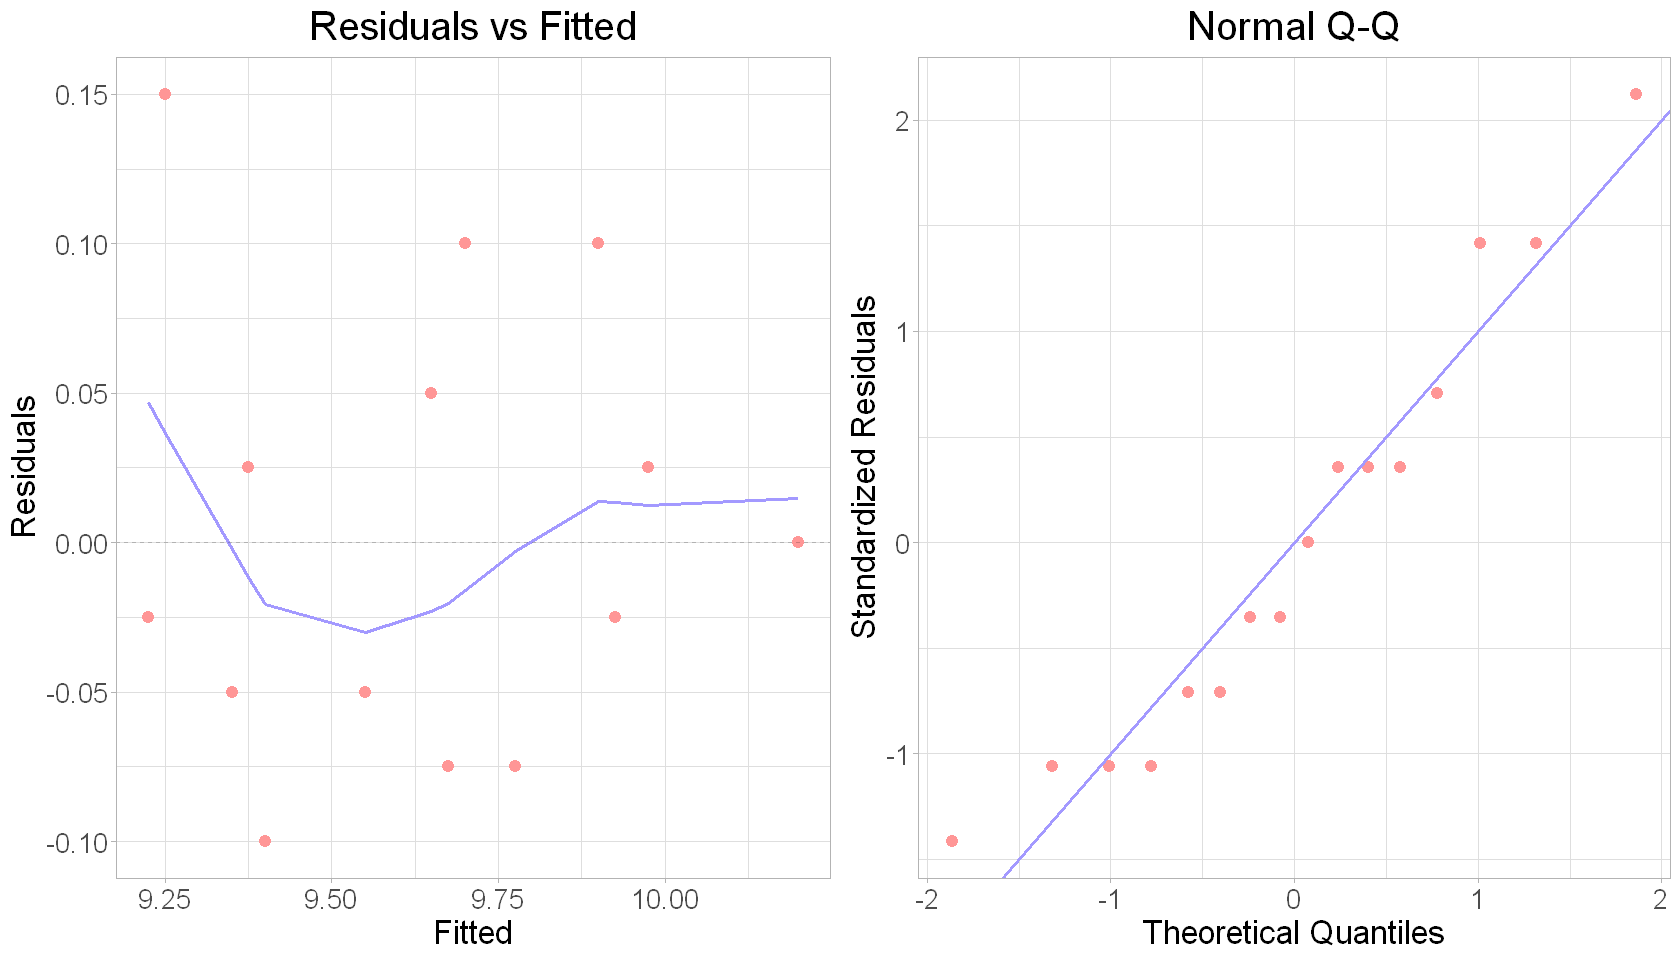

In [58]:
smoothed <- data.frame(with(data_6.aov, lowess(x = data_6.aov$fitted, y = data_6.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_6.aov) + 
    geom_point(aes(x=data_6.aov$fitted, y=data_6.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_6.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">Los valores en el gráfico de <i style="color: blue">Residuos vs. Valores Ajustados</i> exhiben una dispersión relativamente uniforme, por lo que no hay evidencias fuertes en contra del supuesto de varianza constante. El gráfico de <i style="color: blue">Residuos estandarizados vs. Cuantiles teóricos</i> no muestra desviaciones notables en torno a la recta normal.Portafolio Rbc</div>

***
<br></br>

### **Ejercicio 7**

#### <div style="text-align: justify">Se estudian diferentes algoritmos para estimar los costos de desarrollo de software. Para esto se aplican seis algoritmos a ocho proyectos de desarrollo de software y se observa el porcentaje de error al estimar los costos de desarrollo. Los datos son los siguientes:</div>

<table style="width: 60%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 20%" rowSpan="2">Algoritmo</th>
            <th colspan="8">Proyecto</th>
        </tr>
        <tr style="font-size: larger">
            <th>1</th>
            <th>2</th>
            <th>3</th>
            <th>4</th>
            <th>5</th>
            <th>6</th>
            <th>7</th>
            <th>8</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">1</td>
            <td style="text-align: center; vertical-align: middle;">1244</td>
            <td style="text-align: center; vertical-align: middle;">21</td>
            <td style="text-align: center; vertical-align: middle;">82</td>
            <td style="text-align: center; vertical-align: middle;">2221</td>
            <td style="text-align: center; vertical-align: middle;">905</td>
            <td style="text-align: center; vertical-align: middle;">839</td>
            <td style="text-align: center; vertical-align: middle;">527</td>
            <td style="text-align: center; vertical-align: middle;">122</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">2</td>
            <td style="text-align: center; vertical-align: middle;">281</td>
            <td style="text-align: center; vertical-align: middle;">129</td>
            <td style="text-align: center; vertical-align: middle;">396</td>
            <td style="text-align: center; vertical-align: middle;">1306</td>
            <td style="text-align: center; vertical-align: middle;">336</td>
            <td style="text-align: center; vertical-align: middle;">910</td>
            <td style="text-align: center; vertical-align: middle;">473</td>
            <td style="text-align: center; vertical-align: middle;">199</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">3</td>
            <td style="text-align: center; vertical-align: middle;">220</td>
            <td style="text-align: center; vertical-align: middle;">84</td>
            <td style="text-align: center; vertical-align: middle;">458</td>
            <td style="text-align: center; vertical-align: middle;">543</td>
            <td style="text-align: center; vertical-align: middle;">300</td>
            <td style="text-align: center; vertical-align: middle;">794</td>
            <td style="text-align: center; vertical-align: middle;">488</td>
            <td style="text-align: center; vertical-align: middle;">142</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">4</td>
            <td style="text-align: center; vertical-align: middle;">225</td>
            <td style="text-align: center; vertical-align: middle;">83</td>
            <td style="text-align: center; vertical-align: middle;">425</td>
            <td style="text-align: center; vertical-align: middle;">552</td>
            <td style="text-align: center; vertical-align: middle;">291</td>
            <td style="text-align: center; vertical-align: middle;">826</td>
            <td style="text-align: center; vertical-align: middle;">509</td>
            <td style="text-align: center; vertical-align: middle;">153</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">5</td>
            <td style="text-align: center; vertical-align: middle;">19</td>
            <td style="text-align: center; vertical-align: middle;">11</td>
            <td style="text-align: center; vertical-align: middle;">-34</td>
            <td style="text-align: center; vertical-align: middle;">121</td>
            <td style="text-align: center; vertical-align: middle;">15</td>
            <td style="text-align: center; vertical-align: middle;">103</td>
            <td style="text-align: center; vertical-align: middle;">87</td>
            <td style="text-align: center; vertical-align: middle;">-17</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">6</td>
            <td style="text-align: center; vertical-align: middle;">-20</td>
            <td style="text-align: center; vertical-align: middle;">35</td>
            <td style="text-align: center; vertical-align: middle;">-53</td>
            <td style="text-align: center; vertical-align: middle;">170</td>
            <td style="text-align: center; vertical-align: middle;">104</td>
            <td style="text-align: center; vertical-align: middle;">199</td>
            <td style="text-align: center; vertical-align: middle;">142</td>
            <td style="text-align: center; vertical-align: middle;">41</td>
        </tr>
    </tbody>
</table>

In [59]:
data_7 <- read.csv("./TP4_tables/data7.csv") # Leo los datos desde archivo .csv
data_7$algorithm <- factor(data_7$algorithm)
data_7$project <- factor(data_7$project)


<br></br>

#### <div style="text-align: justify">a) ¿Existe alguna diferencia entre los algoritmos en cuanto a la exactitud de la estimación del costo promedio? Utilice $\alpha = 0.05$.</div>

<div style="text-align: justify">Este experimento requiere un diseño de bloques, donde el algoritmo utilizado es el factor de interés y el proyecto sobre el cual se aplica es el factor bloqueado.</div>

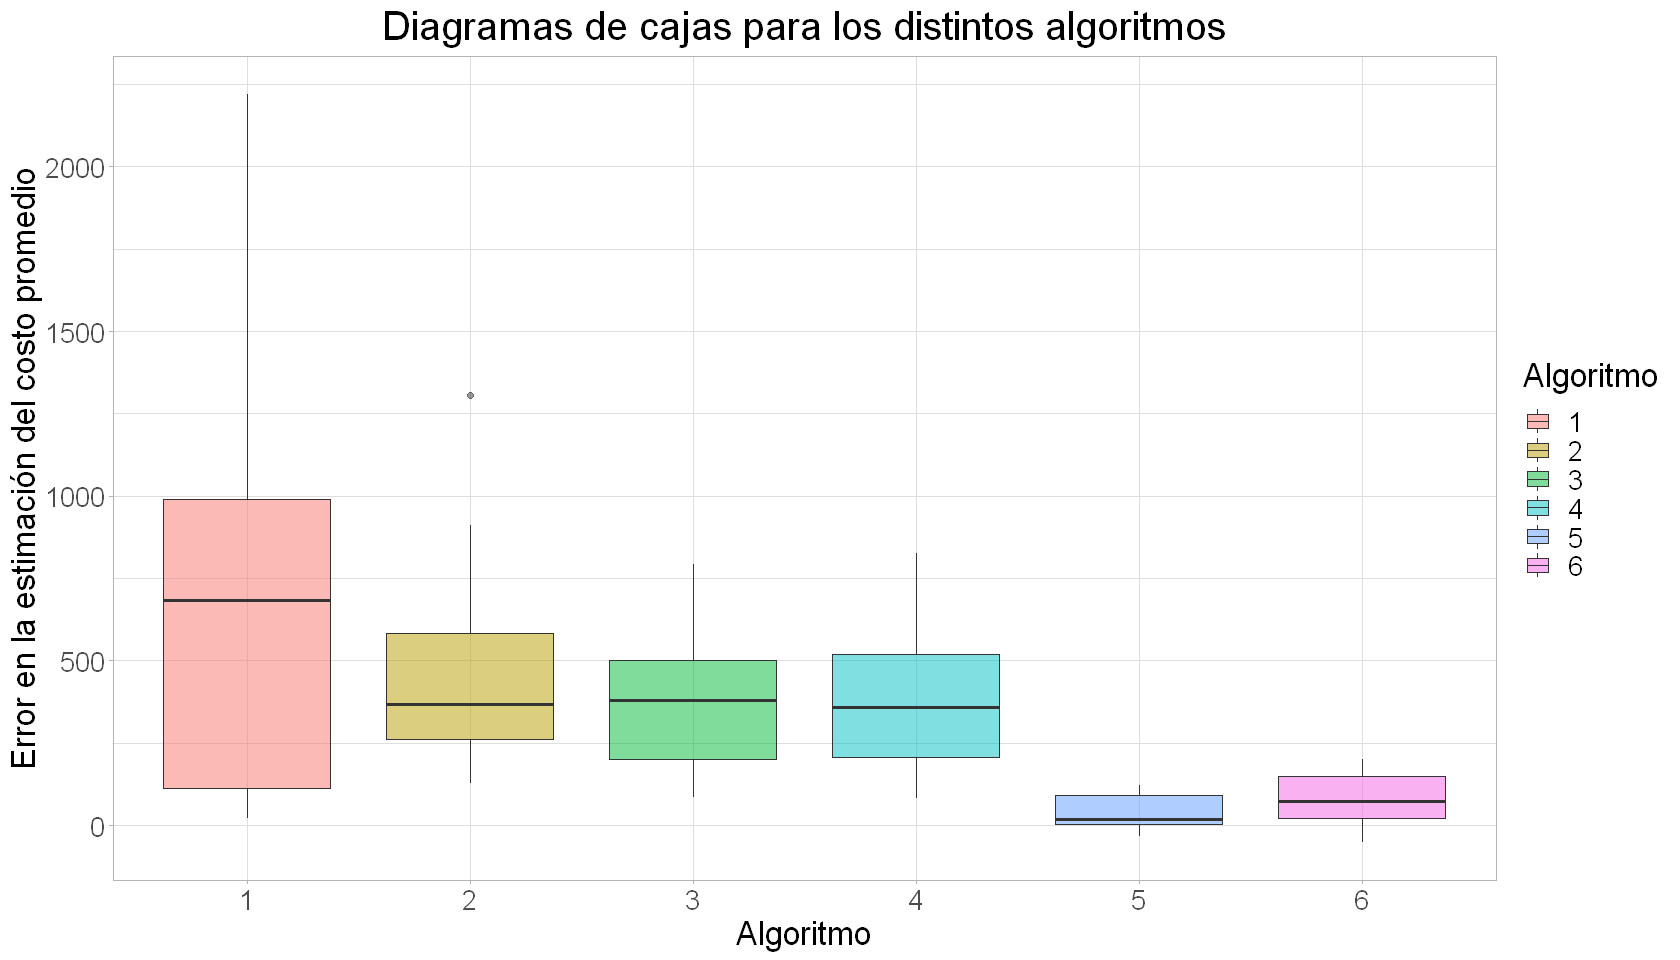

In [60]:
# Plot
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_7, aes(x=algorithm, y=estimation_error, fill=algorithm)) +
    labs(
        title="Diagramas de cajas para los distintos algoritmos",
        x="Algoritmo", 
        y="Error en la estimación del costo promedio",
        fill="Algoritmo",
        col="Proyecto") +
    geom_boxplot(alpha=0.5, aes(fill=algorithm)) +
    #geom_point(aes(col=project), size=4, alpha=0.5) +
    #geom_point(shape=1, size=4) +
    theme_light() +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5)) +
    guides(fill = guide_legend(override.aes = list(shape = NA), order = 1))


<div style="text-align: justify">Los gráficos de cajas sugieren que la exactitud de la estimación obtenida con los algoritmos 5 y 6 podría diferir de la del resto de los algoritmos. Las hipótesis de la prueba son:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 = \mu_6,\quad \text{contra }H_1\text{: dos o mas }\mu_i\text{ son diferentes}$$</div>

In [61]:
data_7.aov <- aov(estimation_error ~ algorithm + project, data_7)
aov_test7 <- summary(data_7.aov)[[1]]


In [62]:
display_markdown('#### **ANOVA de dos sentidos: Error de estimación vs Algoritmo + Proyecto (bloqueado)**')
display_markdown('\n')
aov_test7 <- cbind(c('Algoritmo', 'Proyecto', 'Residuos'), aov_test7)
colnames(aov_test7)[1] <- 'Source'
rownames(aov_test7) <- c()
table <- formattable(aov_test7, align=c('l', 'c', 'c', 'c', 'c', 'c'), list(`Source` = formatter("span",style = ~ style('text-align'='left'))))
as.htmlwidget(table, width="70%", height=NULL)


#### **ANOVA de dos sentidos: Error de estimación vs Algoritmo + Proyecto (bloqueado)**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El p-valor para el factor <b><i>Algoritmo</i></b> es $0.0003 < 0.05$. Por lo tanto, se rechaza la hipótesis nula y se concluye que el algoritmo aplicado afecta al error de estimación del costo de desarrollo.</div>

<br></br>

#### <div style="text-align: justify">b) Analice los residuos de este experimento.</div>

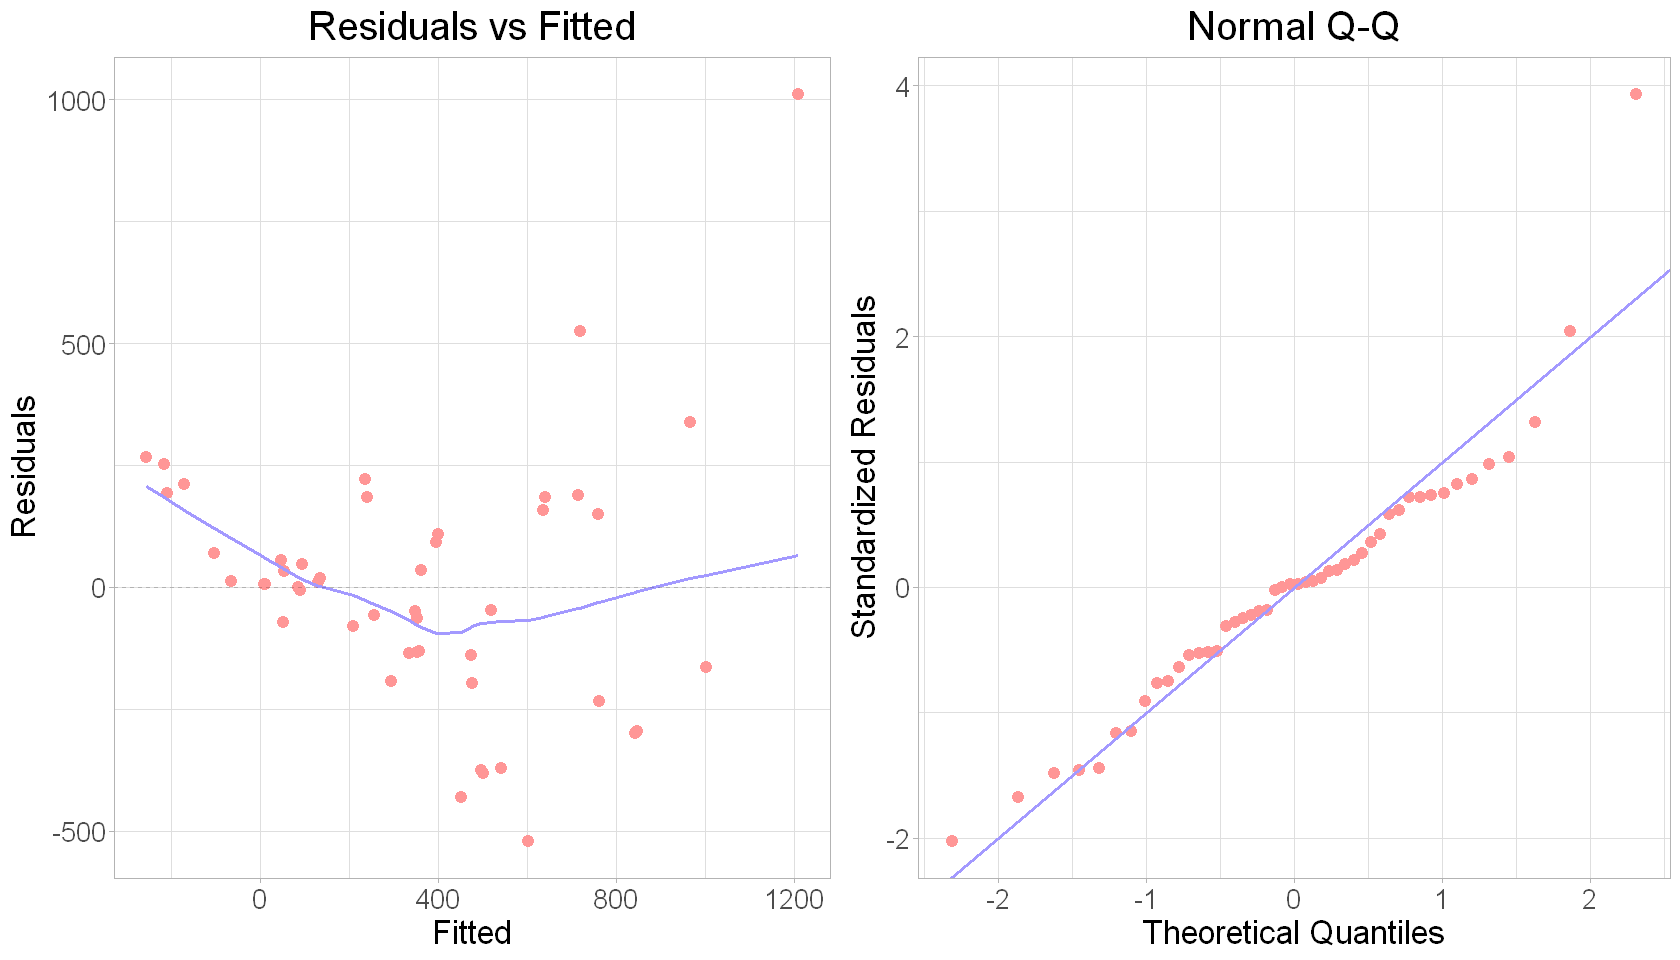

In [63]:
smoothed <- data.frame(with(data_7.aov, lowess(x = data_7.aov$fitted, y = data_7.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_7.aov) + 
    geom_point(aes(x=data_7.aov$fitted, y=data_7.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_7.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">El gráfico de <i style="color: blue">Residuos vs. Valores Ajustados</i> muestra una mayor dispersión de los valores en el lado derecho, lo cual sugiere que la varianza no es constante. El gráfico de <i style="color: blue">Residuos estandarizados vs. Cuantiles teóricos</i> no muestra evidencias imortantes en contra del supuesto de normalidad.</div>

<br></br>

#### <div style="text-align: justify">c) ¿Qué algoritmo recomendaría para usarlo en la práctica?</div>

In [64]:
data_7.tukey <- as.data.frame(TukeyHSD(data_7.aov, ordered = TRUE, conf.level = 0.95)[1]$algorithm)


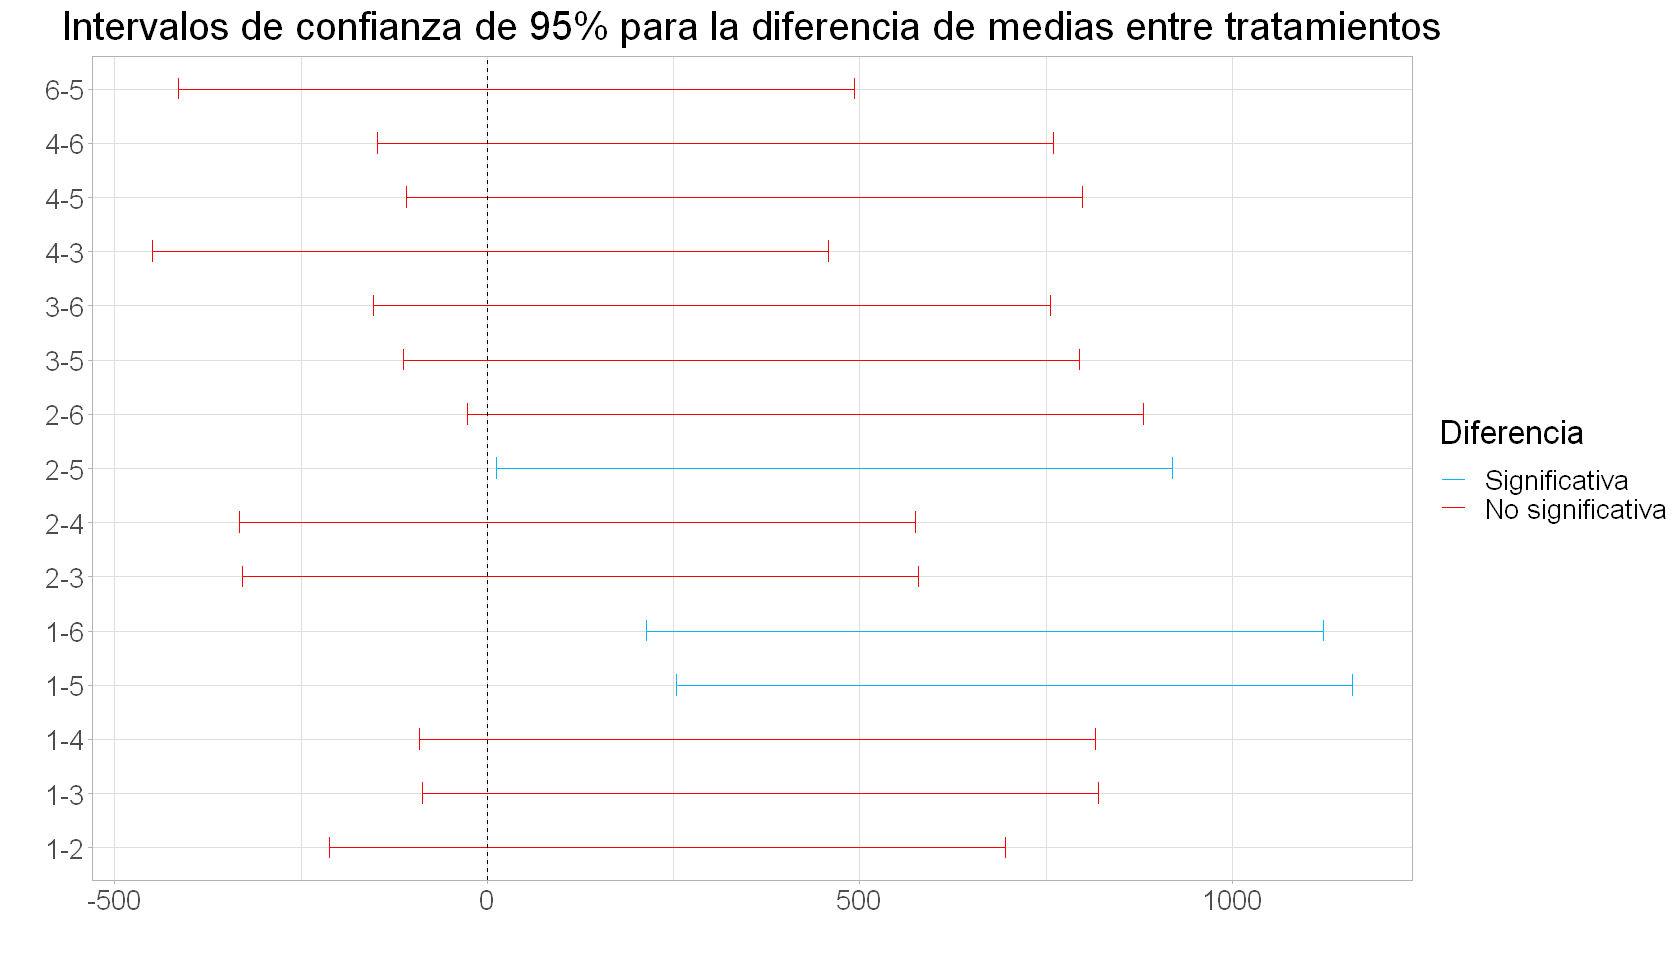

In [65]:
data_7.tukey$names <- c(rownames(data_7.tukey))
# Gráfico de los intervalos de confianza
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_7.tukey, aes(names, diff)) + 
    labs(
        title="Intervalos de confianza de 95% para la diferencia de medias entre tratamientos",
        x="", 
        y="",
        col="Diferencia") +
    geom_errorbar(aes(ymin=lwr, ymax=upr, col=ifelse(lwr*upr > 0,'1','2')), width = 0.4, alpha=1) +
    scale_color_manual(values=c('#05b5f5','#f50505'), labels=c('Significativa','No significativa'), breaks=c('1','2')) +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    theme_light() +
    coord_flip(expand = TRUE) +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Una forma de determinar con cuáles de los algoritmos se obtienen mejores resultados es plantear la hipótesis:</div>

#### <div style="text-align: center">$$H_0\text{: }\mu_i = 0\quad \text{contra}\quad H_1\text{: }\mu_i \neq 0$$</div>

<div style="text-align: justify">donde $i = 1,...,6$. Para ello se construyen intervalos de confianza con $\alpha = 0.05$ para las medias de cada tratamiento y se observa cuales contienen al cero. Un intervalo que incluye al cero implica que no se puede afirmar (con un nivel de significancia $\alpha$) que existe un error en la estimación de los costos de desarrrollo.</div>

In [66]:
data_7.levels <- split(data_7 , f=data_7$algorithm)
x_bar <- sapply(data_7.levels, function(x) {
    mean(x$estimation_error)
}) # media de cada tratamiento


In [67]:
# Cálculo de MSE
model_7 <- lm(estimation_error ~ algorithm + project, data_7)
J <- sapply(data_7.levels, nrow) # cantidad de observaciones para cada tratamiento
I <- length(data_7.levels) # cantidad de niveles
N <- sum(J) # cantidad total de observaciones
SSE <- sum(model_7$residuals^2)
MSE <- SSE / (N - I)
display_markdown(sprintf('$MSE = %.2f$', MSE))


$MSE = 75602.14$

In [68]:
alpha <- 0.05
t <- qt(alpha/2, N-I, lower=FALSE) # distribución t de Student con alpha=0.05/2 y N-I grados de libertad
aux <- t * sqrt(MSE / J)
conf_int <- matrix(c(x_bar - aux, x_bar + aux), ncol=2, byrow=FALSE) # intervalos de confianza


In [69]:
conf_int.df <- as.data.frame(data.frame(paste("Algoritmo", 1:6, sep=" "), conf_int[,1], x_bar, conf_int[,2]))
colnames(conf_int.df) = c(" ", "2.5%", "Media estimada", "97.5%")
contains_zero <- conf_int.df[,"2.5%"] * conf_int.df[,"97.5%"] <= 0 # TRUE si el intervalo contiene al cero
conf_int.df <- cbind(conf_int.df, contains_zero)
colnames(conf_int.df)[5] <- "Contiene al 0"


In [70]:
display_markdown('#### **Intervalos de confianza para medias de tratamiento**')
display_markdown('\n')
table <- formattable(conf_int.df, align=c('l', 'c', 'c', 'c', 'c'), list(`Contiene al 0` = formatter("span", 
x ~ ifelse(x, " Sí", " No"), 
style = x ~ style(color = ifelse(x, "green", "red"))), `Media estimada` = formatter("span", style = ~ style("font.weight" = "bold")), ` ` = formatter("span", style = ~ style("font.weight" = "bold"))))
#table <- format_table(table, list(area(1:2) ~ color_tile("transparent", "lightgray")))
as.htmlwidget(table, width="50%", height=NULL)


#### **Intervalos de confianza para medias de tratamiento**

HTML widgets cannot be represented in plain text (need html)

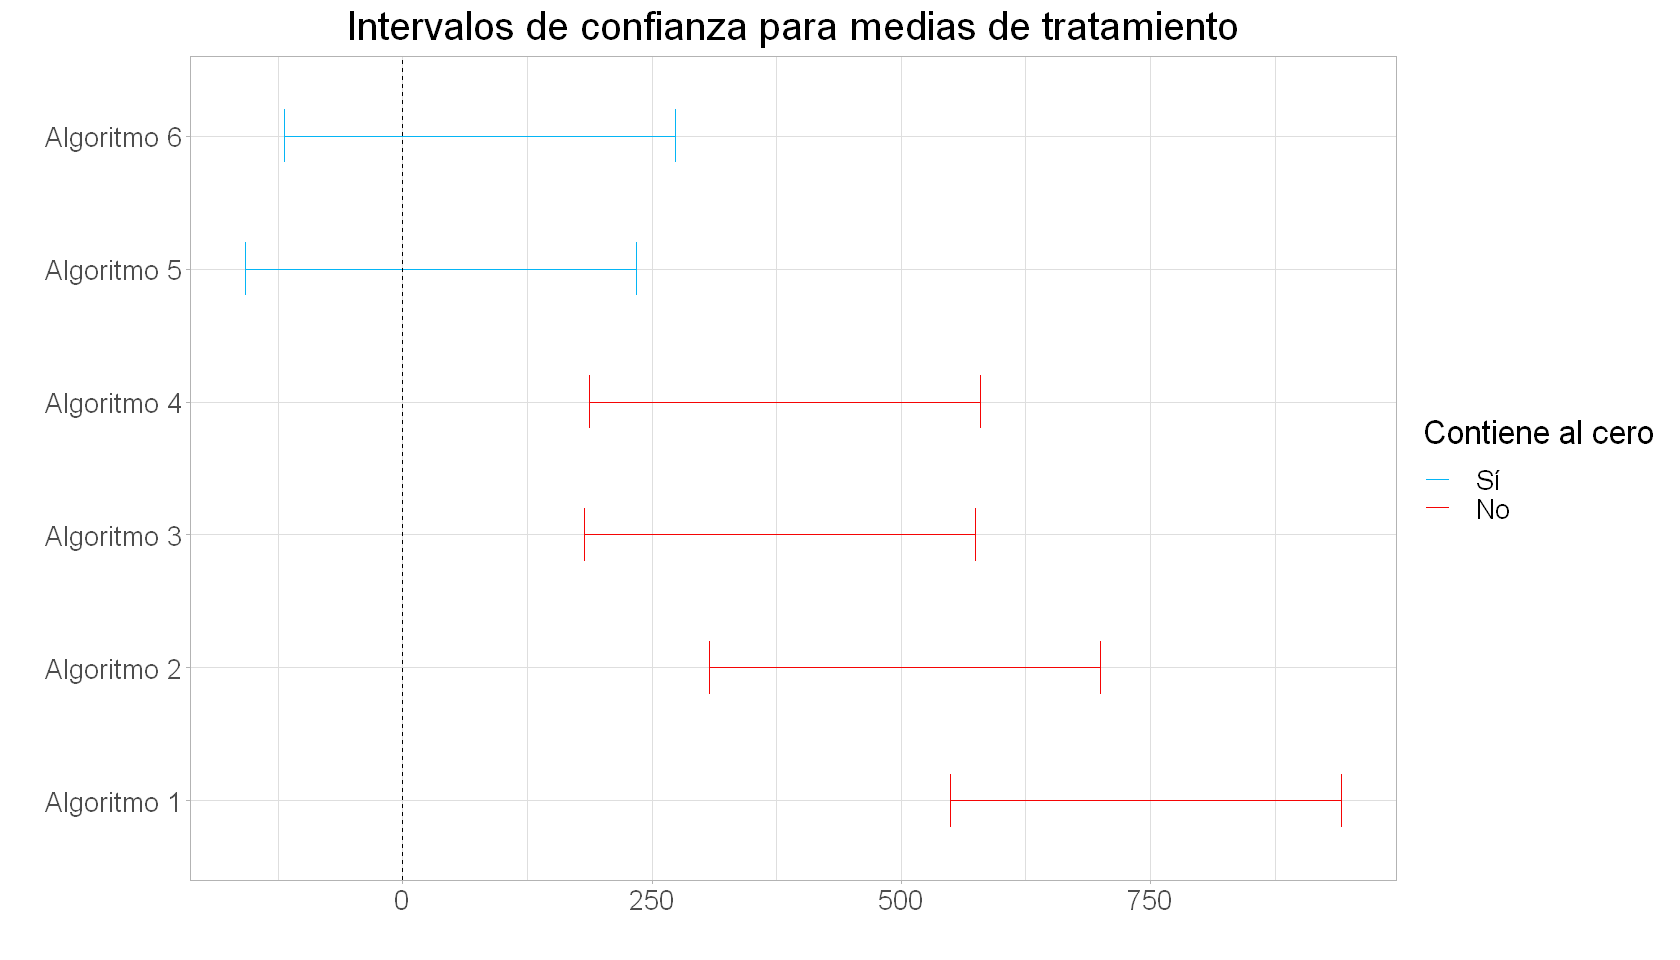

In [71]:
colnames(conf_int.df) <- c("algorithm", "lwr", "mean", "upr", "contains_zero")
# Gráfico de los intervalos de confianza
options(repr.plot.width=14, repr.plot.height=8)
ggplot(conf_int.df, aes(algorithm)) + 
    labs(
        title="Intervalos de confianza para medias de tratamiento",
        x="", 
        y="",
        col="Contiene al cero") +
    geom_errorbar(aes(ymin=lwr, ymax=upr, col=ifelse(contains_zero==TRUE,'1','2')), width = 0.4, alpha=1) +
    scale_color_manual(values=c('#05b5f5','#f50505'), labels=c(' Sí',' No'), breaks=c('1','2')) +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    theme_light() +
    coord_flip(expand = TRUE) +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Los resultados anteriores sugieren que los algoritmos 5 y 6 ofrecen mejor exactitud en la estimación del costo promedio que el resto. Entre ellos, el algoritmo 5 presenta el menor valor medio para el error de estimación.</div>

***
<br></br>

### **Ejercicio 8**

#### <div style="text-align: justify">Se presentan los resultados de un experimento relacionado con la capacidad de una batería utilizada en el mecanismo de lanzamiento de un lanzacohetes tierra-aire. Las placas de la batería pueden fabricarse con tres materiales. El objetivo es diseñar una batería que no se vea afectada por la temperatura ambiente. La respuesta de la batería es la vida efectiva de ésta en horas. Para esto se fijan tres niveles de temperatura y se realiza un experimento factorial con cuatro réplicas.</div>

<table style="width: 60%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 20%" rowspan="2">Material</th>
            <th colspan="6">Temperatura (ºF)</th>
        </tr>
        <tr style="font-size: larger">
            <th colspan="2" style="border-right: 1px solid #BDBDBD;">baja</th>
            <th colspan="2" style="border-right: 1px solid #BDBDBD;">media</th>
            <th colspan="2">alta</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan="2" style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">1</td>
            <td style="text-align: center; vertical-align: middle;">130</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">155</td>
            <td style="text-align: center; vertical-align: middle;">34</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">40</td>
            <td style="text-align: center; vertical-align: middle;">20</td>
            <td style="text-align: center; vertical-align: middle;">70</td>
        </tr>
        <tr style="border-bottom: 1px solid #BDBDBD;">
            <td style="text-align: center; vertical-align: middle;">74</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">180</td>
            <td style="text-align: center; vertical-align: middle;">80</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">75</td>
            <td style="text-align: center; vertical-align: middle;">82</td>
            <td style="text-align: center; vertical-align: middle;">58</td>
        </tr>
        <tr>
            <td rowspan="2" style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">2</td>
            <td style="text-align: center; vertical-align: middle;">150</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">188</td>
            <td style="text-align: center; vertical-align: middle;">136</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">122</td>
            <td style="text-align: center; vertical-align: middle;">25</td>
            <td style="text-align: center; vertical-align: middle;">70</td>
        </tr>
        <tr style="border-bottom: 1px solid #BDBDBD;">
            <td style="text-align: center; vertical-align: middle;">159</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">126</td>
            <td style="text-align: center; vertical-align: middle;">106</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">115</td>
            <td style="text-align: center; vertical-align: middle;">58</td>
            <td style="text-align: center; vertical-align: middle;">45</td>
        </tr>
        <tr>
            <td rowspan="2" style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">3</td>
            <td style="text-align: center; vertical-align: middle;">138</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">110</td>
            <td style="text-align: center; vertical-align: middle;">174</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">120</td>
            <td style="text-align: center; vertical-align: middle;">96</td>
            <td style="text-align: center; vertical-align: middle;">104</td>
        </tr> 
        <tr>
            <td style="text-align: center; vertical-align: middle;">168</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">160</td>
            <td style="text-align: center; vertical-align: middle;">150</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">139</td>
            <td style="text-align: center; vertical-align: middle;">82</td>
            <td style="text-align: center; vertical-align: middle;">60</td>
        </tr>
    </tbody>
</table>

In [72]:
data_8 <- read.csv("./TP4_tables/data8.csv") # Leo los datos desde archivo .csv
data_8$material <- factor(data_8$material)
data_8$temperature <- factor(data_8$temperature)


<div style="text-align: justify">Se trata de un experimento de dos factores, donde el material es el factor fila y la temperatura es el factor columna (siguiendo la distribución de la tabla provista), ambos con 3 niveles. Cada uno de los 9 tratamientos cuenta con 4 réplicas.</div>

<br></br>

#### <div style="text-align: justify">a) Pruebe las hipótesis apropiadas y obtenga conclusiones mediante el empleo del análisis de varianza con $\alpha = 0.05$.</div>

In [73]:
options(dplyr.summarise.inform = FALSE)
data_8.mean <- data_8 %>%
  group_by(material, temperature) %>%
  summarise(cell_mean=mean(lifespan)) # media de cada tratamiento

data_8.mean <- data_8.mean %>%
  group_by(material) %>%
  summarise(material_mean=mean(cell_mean), across()) # media de cada material

data_8.mean <- data_8.mean %>%
  group_by(temperature) %>%
  summarise(temperature_mean=mean(cell_mean), across()) # media de cada nivel de temperatura


In [74]:
data_8.mean <- data_8.mean %>%
    arrange(match(temperature, c("low", "mid", "high"))) %>%
    arrange(match(material, c(1, 2, 3))) %>%
    select(material, temperature, cell_mean, material_mean, temperature_mean)


In [75]:
eng_colnames <- colnames(data_8.mean)
colnames(data_8.mean) <- c("material", "temperatura", "media de la celda", "media de la fila", "media de la columna")
as.htmlwidget(formattable(data_8.mean, align="c"), width="80%", height=NULL)


HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">Un análisis de varianza de dos sentidos está diseñado para responder tres preguntas principales:
    <ul style="list-style-type: decimal;">
        <li>¿El modelo aditivo vale?</li>
        <li>¿Si es así, la media del resultado es la misma para todos los niveles del factor fila?</li>
        <li>¿Si es así, la media del resultado es la misma para todos los niveles del factor columna?</li>
    </ul>
</div>

<div style="text-align: justify"><b>1. </b>Para probar si el modelo aditivo vale se prueba la hipótesis nula de que todas las interacciones son iguales a 0:</div>

#### <div style="text-align: center">$$H_0\text{: }\gamma_{11} = \gamma_{12} = \ldots = \gamma_{IJ} = 0$$</div>

<div style="text-align: justify"><b>2. </b>Para probar si la media del resultado es igual para todos los niveles del factor renglón, se prueba la hipótesis nula de que todos los efectos renglón son iguales a 0:</div>

#### <div style="text-align: center">$$H_0\text{: }\alpha_1 = \alpha_2 = \ldots = \alpha_I = 0$$</div>

<div style="text-align: justify"><b>3. </b>Para probar si la media del resultado es igual para todos los niveles del factor columna, se prueba la hipótesis nula de que todos los efectos columna son iguales a 0:</div>

#### <div style="text-align: center">$$H_0\text{: }\beta_1 = \beta_2 = \ldots = \beta_J = 0$$</div>

In [76]:
data_8.aov <- summary(aov(lifespan ~ material * temperature, data_8))[[1]]


In [77]:
display_markdown('#### **ANOVA de dos sentidos**')
display_markdown('\n')
data_8.aov <- cbind(c('Material', 'Temperatura', 'Interacción', 'Residuos'), data_8.aov)
colnames(data_8.aov)[1] <- 'Source'
rownames(data_8.aov) <- c()
data_8.aov["Pr(>F)"] <- round(data_8.aov["Pr(>F)"], 4)
table <- formattable(data_8.aov, align=c('l', 'c', 'c', 'c', 'c', 'c'), list(`Source` = formatter("span",style = ~ style('text-align'='left'))))
as.htmlwidget(table, width="70%", height=NULL)


#### **ANOVA de dos sentidos**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El p-valor para la interacción es $0.00152 < 0.05$. Por lo tanto, se rechaza la hipótesis nula de que todas las interacciones son iguales a 0 y se concluye que el modelo no es aditivo. Este resultado implica que no se pueden utilizar las pruebas de hipótesis para los efectos principales.</div>

<br></br>

#### <div style="text-align: justify">b) Analice de manera gráfica la interacción.</div>

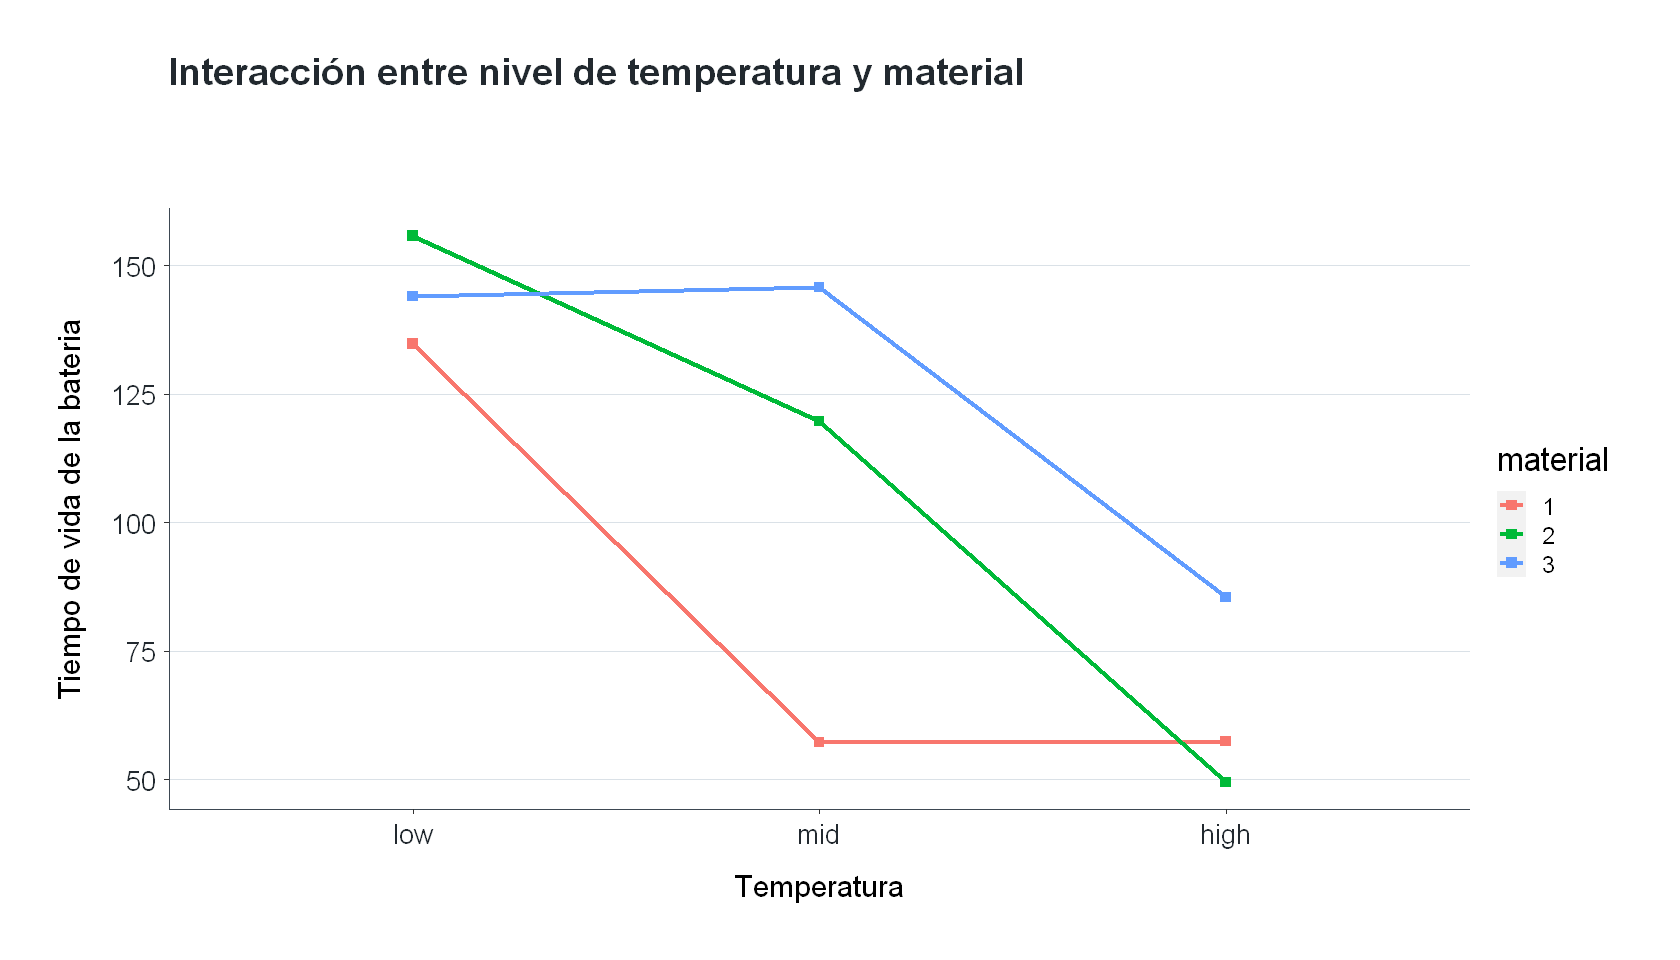

In [78]:
data.frame(data_8) %>% 
    group_by(material, temperature) %>%
    summarise(cell_mean=mean(lifespan)) %>%
    arrange(match(temperature, c("low", "mid", "high"))) %>%
    mutate(temperature=factor(temperature, levels=temperature)) %>% 
    ggplot(aes(temperature, cell_mean)) +
    geom_line(size = 1.2, aes(group = material, color = material)) +
    geom_point(size = 2.6, aes(color = material), shape = 15) +
    labs(
        title = "Interacción entre nivel de temperatura y material",
        subtitle = "\n",
        x = "Temperatura",
        y = "Tiempo de vida de la bateria") +
        theme(
            #text = element_text(family = "Roboto"),    
            plot.margin = unit(rep(1.2, 4), "cm"),    
            plot.title = element_text(size = 22, color = "#22292F", face = "bold", margin = margin(b = 5)),    
            plot.subtitle = element_text(size = 15, margin = margin(b = 35)),    
            plot.caption = element_text(size = 16, margin = margin(t = 25), color = "#606F7B"),    
            panel.background = element_blank(),    
            axis.text = element_text(size = 16, color = "#22292F"),    
            axis.text.x = element_text(margin = margin(t = 5)),    
            axis.text.y = element_text(margin = margin(r = 5)),    
            axis.line = element_line(color = "#3D4852"),    
            axis.title = element_text(size = 18),    
            axis.title.y = element_text(margin = margin(r = 15),                                
                                      hjust = 0.5),    
            axis.title.x = element_text(margin = margin(t = 15),                                
                                      hjust = 0.5),    
            panel.grid.major = element_line(color = "#DAE1E7"),    
            panel.grid.major.x = element_blank(),
            legend.title = element_text(size=20), #change legend title font size
            legend.text = element_text(size=14)) #change legend text font size


<div style="text-align: justify">El gráfico de interacción sugiere que el modelo no es aditivo. Algunas observaciones:
    <ul>
        <li>Las baterías construídas con el <b>material 1</b> muestran un mayor tiempo de vida a temperaturas medias, mientras que el resto de los materiales presentan mayor duración a temperaturas bajas.</li>
        <li>El tiempo de vida de las baterías construídas con el <b>material 2</b> desciende a medida que aumenta la temperatura.</li>
        <li>No hay diferencias significativas entre la duración a temperaturas medias y altas para las baterías construídas con el <b>material 3</b>.</li>
    </ul>
</div>

<br></br>

#### <div style="text-align: justify">c) Analice los residuos de este experimento.</div>

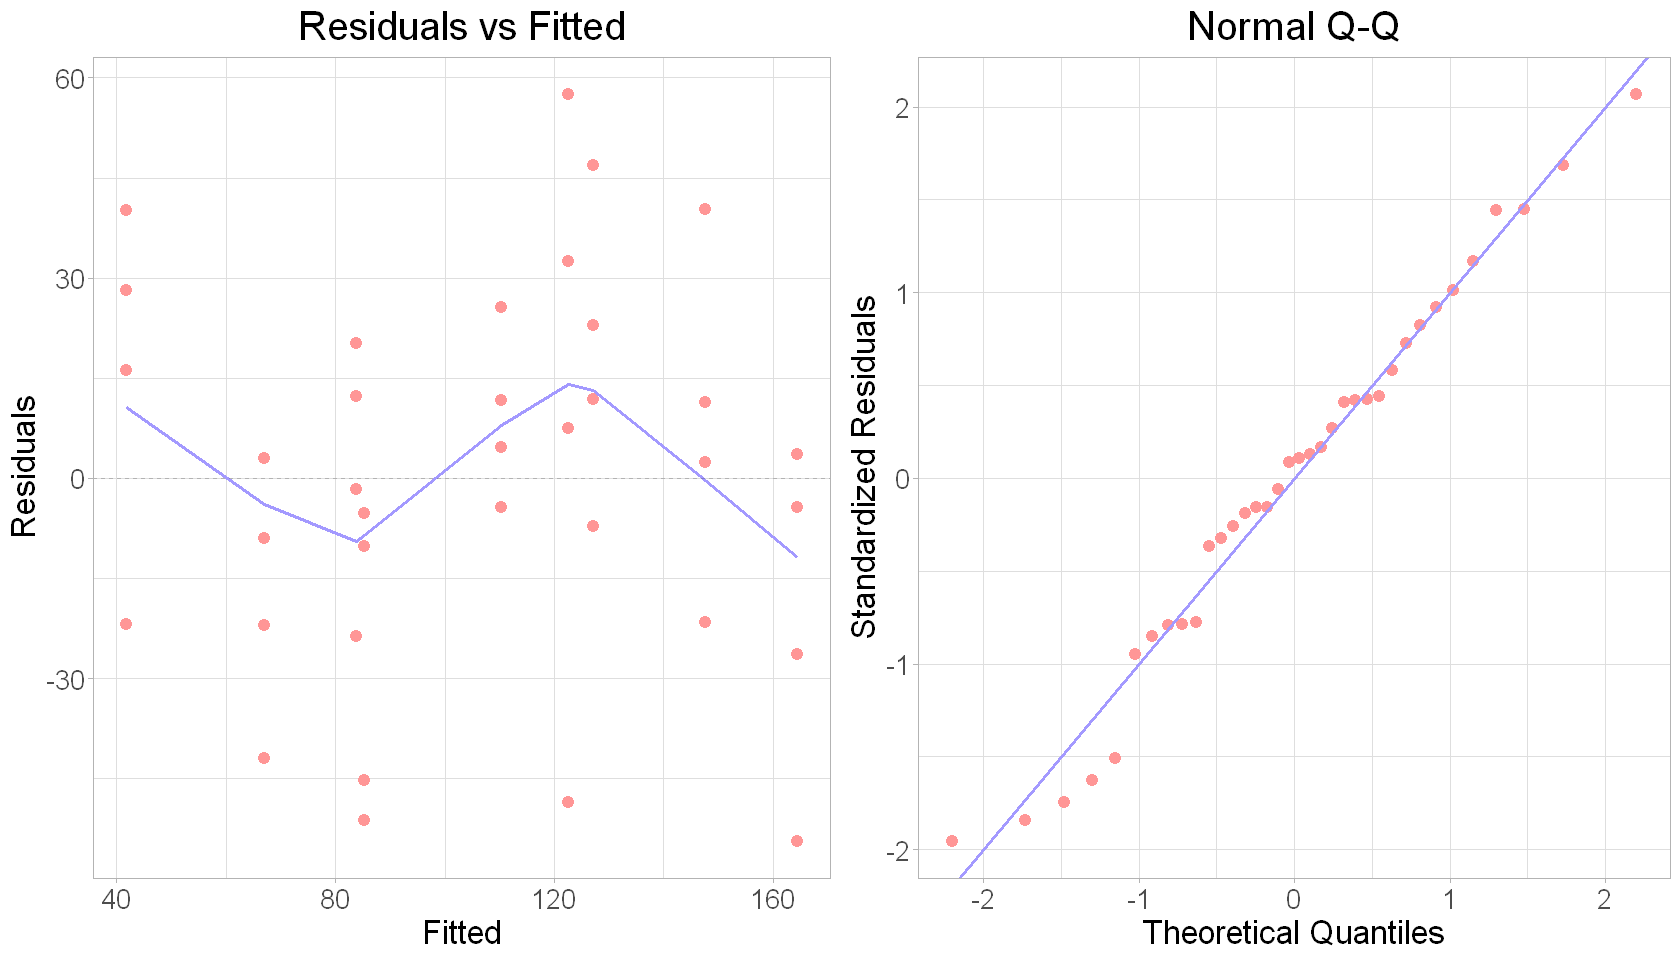

In [79]:
data_8.aov <- aov(lifespan ~ material + temperature, data_8)
smoothed <- data.frame(with(data_8.aov, lowess(x = data_8.aov$fitted, y = data_8.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_8.aov) + 
    geom_point(aes(x=data_8.aov$fitted, y=data_8.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_8.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">La gráfica de <i style="color: blue">Residuos vs. Valores Ajustados</i> no presenta evidencias fuertes contra el supuesto de las variancias iguales, y la gráfica de <i style="color: blue">Probabilidad Normal</i> no exhibe desviaciones notables respecto de la recta. Por lo tanto, es razonable asumir que el modelo es válido.</div>

***
<br></br>

### **Ejercicio 9**

#### <div style="text-align: justify">Se efectúa un experimento para determinar si la temperatura de encendido o la posición de la caldera tienen efecto sobre la densidad de un ánodo de carbón.</div>

<table style="width: 60%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 20%" rowspan="2">Posición</th>
            <th colspan="3">Temperatura (ºC)</th>
        </tr>
        <tr style="font-size: larger">
            <th colspan="1" style="border-right: 1px solid #BDBDBD;">800</th>
            <th colspan="1" style="border-right: 1px solid #BDBDBD;">825</th>
            <th colspan="1">850</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan="3" style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">1</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">570</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">1063</td>
            <td style="text-align: center; vertical-align: middle;">565</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">565</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">1080</td>
            <td style="text-align: center; vertical-align: middle;">510</td>
        </tr>
        <tr style="border-bottom: 1px solid #BDBDBD;">
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">583</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">1043</td>
            <td style="text-align: center; vertical-align: middle;">590</td>
        </tr>    
        <tr>
            <td rowspan="3" style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold;">2</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">528</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">988</td>
            <td style="text-align: center; vertical-align: middle;">526</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">547</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">1026</td>
            <td style="text-align: center; vertical-align: middle;">538</td>
        </tr>
        <tr style="border-bottom: 1px solid #BDBDBD;">
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">521</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">1004</td>
            <td style="text-align: center; vertical-align: middle;">532</td>
        </tr>
    </tbody>
</table>

In [80]:
data_9 <- read.csv("./TP4_tables/data9.csv") # Leo los datos desde archivo .csv
data_9$position <- factor(data_9$position)
data_9$temperature <- factor(data_9$temperature)


<div style="text-align: justify">Se trata de un experimento de dos factores, donde la posición es el factor fila con 2 niveles y la temperatura es el factor columna con 3 niveles. Cada uno de los 6 tratamientos cuenta con 3 réplicas.</div>

<br></br>

#### <div style="text-align: justify">a) Establezca las hipótesis de interés y<br><br>b) Pruebe las hipótesis anteriores utilizando análisis de varianza con $\alpha = 0.05$.</div>

<div style="text-align: justify"><b>1. </b>Para probar si el modelo aditivo vale se prueba la hipótesis nula de que todas las interacciones son iguales a 0:</div>

#### <div style="text-align: center">$$H_0\text{: }\gamma_{11} = \gamma_{12} = \ldots = \gamma_{IJ} = 0$$</div>

In [81]:
data_9.aov <- summary(aov(anode_density ~ position * temperature, data_9))[[1]]


In [82]:
display_markdown('#### **ANOVA de dos sentidos**')
display_markdown('\n')
data_9.aov <- cbind(c('Posición', 'Temperatura', 'Interacción', 'Residuos'), data_9.aov)
colnames(data_9.aov)[1] <- 'Source'
rownames(data_9.aov) <- c()
data_9.aov["Pr(>F)"] <- round(data_9.aov["Pr(>F)"], 4)
table <- formattable(data_9.aov, align=c('l', 'c', 'c', 'c', 'c', 'c'), list(`Source` = formatter("span",style = ~ style('text-align'='left'))))
as.htmlwidget(table, width="70%", height=NULL)


#### **ANOVA de dos sentidos**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El p-valor para la interacción es $0.9731$. Utilizando un nivel de significancia $\alpha = 0.05$, se acepta la hipótesis nula de que todas las interacciones son iguales a 0 y se concluye que el modelo es aditivo.</div>

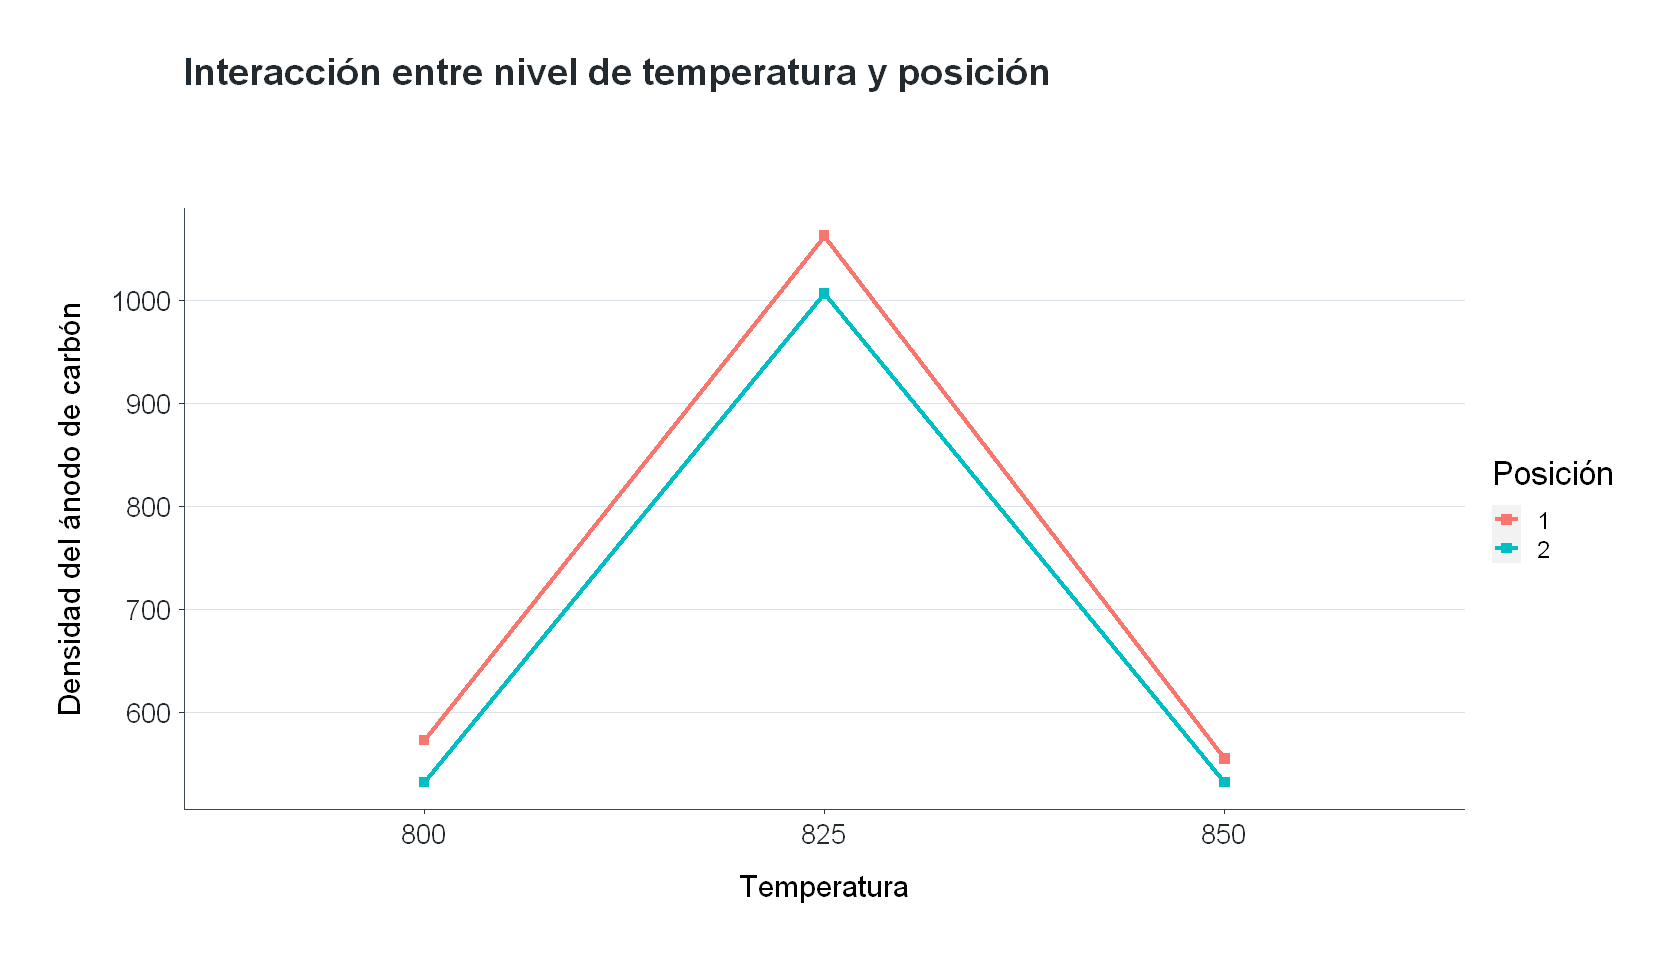

In [83]:
data.frame(data_9) %>% 
    group_by(position, temperature) %>%
    summarise(cell_mean=mean(anode_density)) %>%
    arrange(match(temperature, c("low", "mid", "high"))) %>%
    mutate(temperature=factor(temperature, levels=temperature)) %>% 
    ggplot(aes(temperature, cell_mean)) +
    geom_line(size = 1.2, aes(group = position, color = position)) +
    geom_point(size = 2.6, aes(color = position), shape = 15) +
    labs(
        title = "Interacción entre nivel de temperatura y posición",
        subtitle = "\n",
        x = "Temperatura",
        y = "Densidad del ánodo de carbón",
        color = "Posición") +
        theme(
            #text = element_text(family = "Roboto"),    
            plot.margin = unit(rep(1.2, 4), "cm"),    
            plot.title = element_text(size = 22, color = "#22292F", face = "bold", margin = margin(b = 5)),    
            plot.subtitle = element_text(size = 15, margin = margin(b = 35)),    
            plot.caption = element_text(size = 16, margin = margin(t = 25), color = "#606F7B"),    
            panel.background = element_blank(),    
            axis.text = element_text(size = 16, color = "#22292F"),    
            axis.text.x = element_text(margin = margin(t = 5)),    
            axis.text.y = element_text(margin = margin(r = 5)),    
            axis.line = element_line(color = "#3D4852"),    
            axis.title = element_text(size = 18),    
            axis.title.y = element_text(margin = margin(r = 15),                                
                                      hjust = 0.5),    
            axis.title.x = element_text(margin = margin(t = 15),                                
                                      hjust = 0.5),    
            panel.grid.major = element_line(color = "#DAE1E7"),    
            panel.grid.major.x = element_blank(),
            legend.title = element_text(size=20), #change legend title font size
            legend.text = element_text(size=14)) #change legend text font size


<div style="text-align: justify">El gráfico indica que la interacción entre los factores posición y temperatura es insignificante, lo cual reafirma la validez del modelo aditivo.</div>

<div style="text-align: justify"><b>2. </b>Para probar si la media del resultado es igual para todos los niveles del factor <b>Posición</b>, se prueba la hipótesis nula de que todos los efectos fila son iguales a 0:</div>

#### <div style="text-align: center">$$H_0\text{: }\alpha_1 = \alpha_2 = \ldots = \alpha_I = 0$$</div>

<div style="text-align: justify">El p-valor para la el factor <b>Posición</b> es $0.6149$. Utilizando un nivel de significancia $\alpha = 0.05$, no es posible rechazar la hipótesis nula y por lo tanto se deduce que la posición de la caldera no afecta a la densidad del ánodo.</div>

<div style="text-align: justify"><b>3. </b>Para probar si la media del resultado es igual para todos los niveles del factor <b>Temperatura</b>, se prueba la hipótesis nula de que todos los efectos columna son iguales a 0:</div>

#### <div style="text-align: center">$$H_0\text{: }\beta_1 = \beta_2 = \ldots = \beta_J = 0$$</div>

<div style="text-align: justify">El p-valor para la el factor <b>Temperatura</b> es $0.0015 < 0.05$. Por lo tanto, se la hipótesis nula y se concluye que la temperatura de encendido afecta a la densidad del ánodo.</div>

<br></br>

#### <div style="text-align: justify">c) Analice los residuos de este experimento.</div>

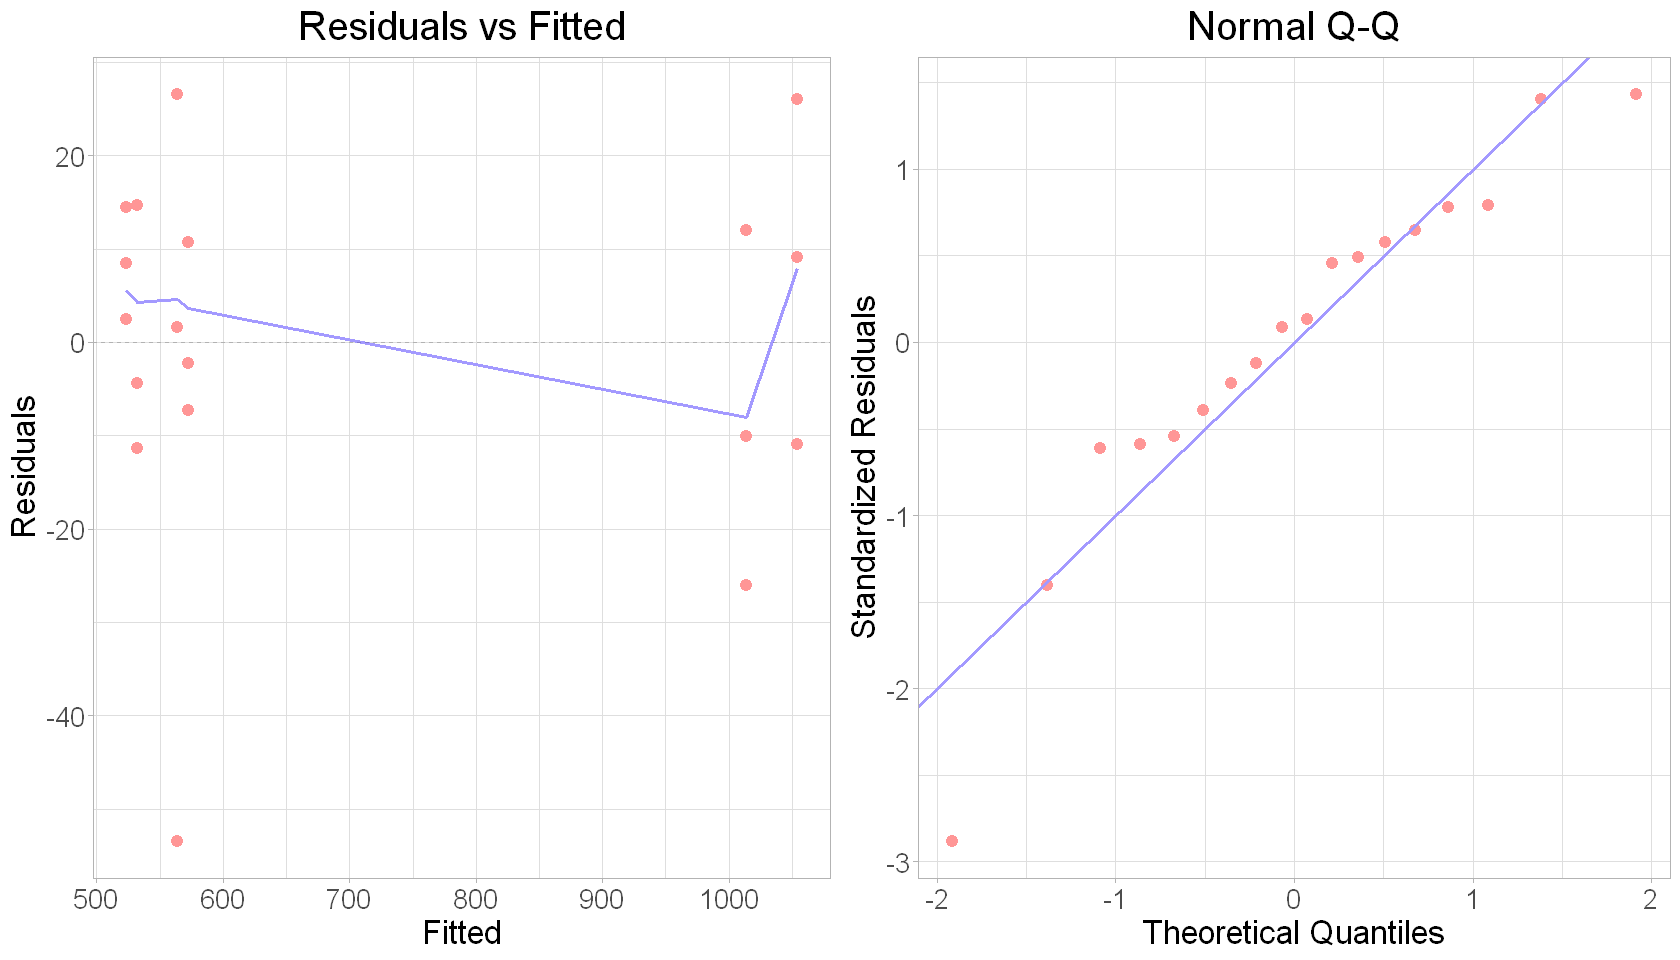

In [84]:
data_9.aov <- aov(anode_density ~ position + temperature, data_9)
smoothed <- data.frame(with(data_9.aov, lowess(x = data_9.aov$fitted, y = data_9.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_9.aov) + 
    geom_point(aes(x=data_9.aov$fitted, y=data_9.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_9.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">En el gráfico de <i style="color: blue">Residuos vs. Valores Ajustados</i> los valores parecen estar más dispersos en el lado derecho, poniendo en duda el supuesta de varianza constante. Los valores en la gráfica de <i style="color: blue">Probabilidad Normal</i> presentan cierta curvatura, aunque las desviaciones respecto a la recta normal no son notables y se podría asumir la normalidad de los residuos.</div>

<br></br>

#### <div style="text-align: justify">d) Investigue las diferencias entre la densidad promedio del ánodo para los tres niveles diferentes de temperatura.</div>

<div style="text-align: justify">Se puede aplicar el método de comparaciones múltiples de Tukey para determinar cuáles niveles de temperatura difieren entre sí.</div>

In [85]:
data_9.aov <- aov(anode_density ~ position + temperature, data_9)
data_9.tukey <- as.data.frame(TukeyHSD(data_9.aov, ordered = TRUE, conf.level = 0.95)$temperature)


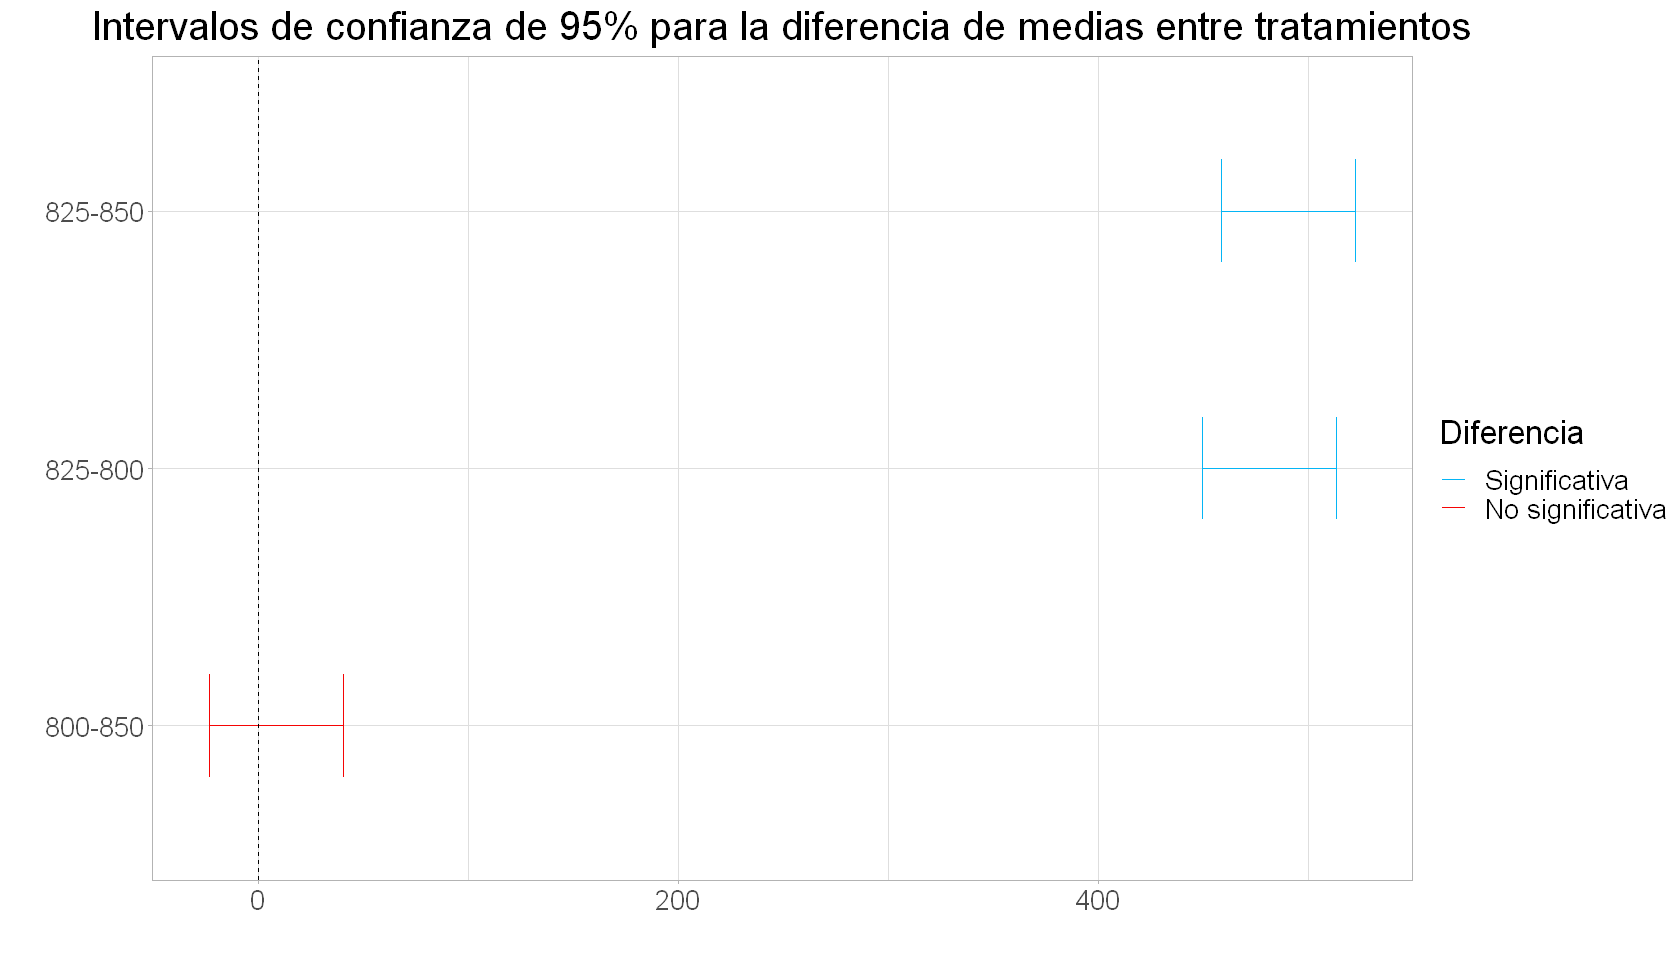

In [86]:
data_9.tukey$names <- c(rownames(data_9.tukey))
# Gráfico de los intervalos de confianza
options(repr.plot.width=14, repr.plot.height=8)
ggplot(data_9.tukey, aes(names, diff)) + 
    labs(
        title="Intervalos de confianza de 95% para la diferencia de medias entre tratamientos",
        x="", 
        y="",
        col="Diferencia") +
    geom_errorbar(aes(ymin=lwr, ymax=upr, col=ifelse(lwr*upr > 0,'1','2')), width = 0.4, alpha=1) +
    scale_color_manual(values=c('#05b5f5','#f50505'), labels=c('Significativa','No significativa'), breaks=c('1','2')) +
    geom_hline(yintercept=0, linetype="dashed", col="black") +
    theme_light() +
    coord_flip(expand = TRUE) +
    theme(text=element_text(size=20),
         plot.title = element_text(size=24, hjust = 0.5))


<div style="text-align: justify">Los intervalos de confianza construidos indican que el efecto de la temperatura de encendido $825ºC$ difiere del efecto de las otras dos temperaturas consideradas en el análisis.</div>

***
<br></br>

### **Ejercicio 10**

#### <div style="text-align: justify">Se investigan los efectos del porcentaje de madera dura en la pulpa, la tersura y el tiempo de cocción sobre la resistencia del papel. La tabla siguiente presenta los datos provenientes de un experimento con tres factores:</div>

<table style="width: 70%">
    <thead>
        <tr style="font-size: larger">
            <th style="text-align: center; width: 20%; border-right: 3px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;" rowspan="3">Porcentaje de concentración de madera dura</th>
            <th colspan="3" style="border-right: 3px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">Tiempo de cocción 1.5 horas</th>
            <th colspan="3" style="border-bottom: 3px solid #BDBDBD;">Tiempo de cocción 2.0 horas</th>
        </tr>
        <tr style="font-size: larger">
            <th colspan="3" style="border-right: 3px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">Tersura</th>
            <th colspan="3" style="border-bottom: 3px solid #BDBDBD;">Tersura</th>
        </tr>
        <tr style="font-size: larger">
            <th colspan="1" style="border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">350</th>
            <th colspan="1" style="border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">500</th>
            <th colspan="1" style="border-right: 3px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">650</th>
            <th colspan="1" style="border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">350</th>
            <th colspan="1" style="border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">500</th>
            <th colspan="1" style="border-bottom: 3px solid #BDBDBD;">650</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan="2" style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold; border-right: 3px solid #BDBDBD; border-bottom: 3px solid #BDBDBD; background-color: #F5F5F5;">10</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">96.6</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">97.7</td>
            <td style="text-align: center; vertical-align: middle; border-right: 3px solid #BDBDBD;">99.4</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">98.4</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">99.6</td>
            <td style="text-align: center; vertical-align: middle;">100.6</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">96.6</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">96.6</td>
            <td style="text-align: center; vertical-align: middle; border-right: 3px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">99.8</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">98.6</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">100.4</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 3px solid #BDBDBD;">100.9</td>
        </tr>
        <tr>
            <td rowspan="2" style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold; border-right: 3px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">15</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">98.5</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">96.0</td>
            <td style="text-align: center; vertical-align: middle; border-right: 3px solid #BDBDBD;">98.4</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">97.5</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">98.7</td>
            <td style="text-align: center; vertical-align: middle;">99.6</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">97.2</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">96.9</td>
            <td style="text-align: center; vertical-align: middle; border-right: 3px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">97.6</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">98.1</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD; border-bottom: 3px solid #BDBDBD;">96.0</td>
            <td style="text-align: center; vertical-align: middle; border-bottom: 3px solid #BDBDBD;">99.0</td>
        </tr>
        <tr>
            <td rowspan="2" style="text-align: center; vertical-align: middle; font-size: larger; font-weight: bold; border-right: 3px solid #BDBDBD; background-color: #F5F5F5;">20</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">97.5</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">95.6</td>
            <td style="text-align: center; vertical-align: middle; border-right: 3px solid #BDBDBD;">97.4</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">97.6</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">97.0</td>
            <td style="text-align: center; vertical-align: middle;">98.5</td>
        </tr>
        <tr>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">96.6</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">96.2</td>
            <td style="text-align: center; vertical-align: middle; border-right: 3px solid #BDBDBD;">98.1</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">98.4</td>
            <td style="text-align: center; vertical-align: middle; border-right: 1px solid #BDBDBD;">97.8</td>
            <td style="text-align: center; vertical-align: middle;">99.8</td>
        </tr>
    </tbody>
</table>

In [87]:
data_10 <- read.csv("./TP4_tables/data10.csv") # Leo los datos desde archivo .csv
data_10$hardwood_percentage <- factor(data_10$hardwood_percentage) # porcentaje de madera dura
data_10$cooking_time <- factor(data_10$cooking_time) # tiempo de coccion
data_10$smoothness <- factor(data_10$smoothness) # tersura


<div style="text-align: justify">En este caso se trata de un experimento de tres factores:
    <ul>
        <li><b>Porcentaje de concentración de madera dura:</b> 3 niveles (10%, 15% y 20%)</li>
        <li><b>Tiempo de cocción:</b> 2 niveles (1.5 horas y 2.0 horas)</li>
        <li><b>Tersura:</b> 3 niveles (350, 500 y 650)</li>
    </ul>
    Cada uno de los 18 tratamientos tiene 2 réplicas.
</div>

<br></br>

#### <div style="text-align: justify">a) Analice los datos usando análisis de varianza y suponiendo que los tres factores son fijos. Utilice $\alpha = 0.05$.</div>

In [88]:
data_10.aov <- summary(aov(resistance ~ hardwood_percentage * cooking_time * smoothness, data_10))[[1]]


In [89]:
display_markdown('#### **ANOVA de tres sentidos**')
display_markdown('\n')
data_10.aov <- cbind(c('Porcentaje de madera dura', 'Tiempo de cocción', 'Tersura', 'Porcentaje de madera dura : Tiempo de cocción', 'Porcentaje de madera dura : Tersura', 'Tiempo de cocción : Tersura ', 'Porcentaje de madera dura : Tiempo de cocción : Tersura', 'Residuos'), data_10.aov)
colnames(data_10.aov)[1] <- 'Source'
rownames(data_10.aov) <- c()
data_10.aov["Pr(>F)"] <- round(data_10.aov["Pr(>F)"], 4)
table <- formattable(data_10.aov, align=c('l', 'c', 'c', 'c', 'c', 'c'), list(`Source` = formatter("span",style = ~ style('text-align'='left'))))
as.htmlwidget(table, width="80%", height=NULL)


#### **ANOVA de tres sentidos**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">El p-valor es mayor a $0.05$ para todas las interacciones. Por lo tanto, no es posible rechazar la hipótesis nula de que todas las interacciones son iguales a 0 y se asume que el modelo es aditivo.</div>

#### **Interacciones**

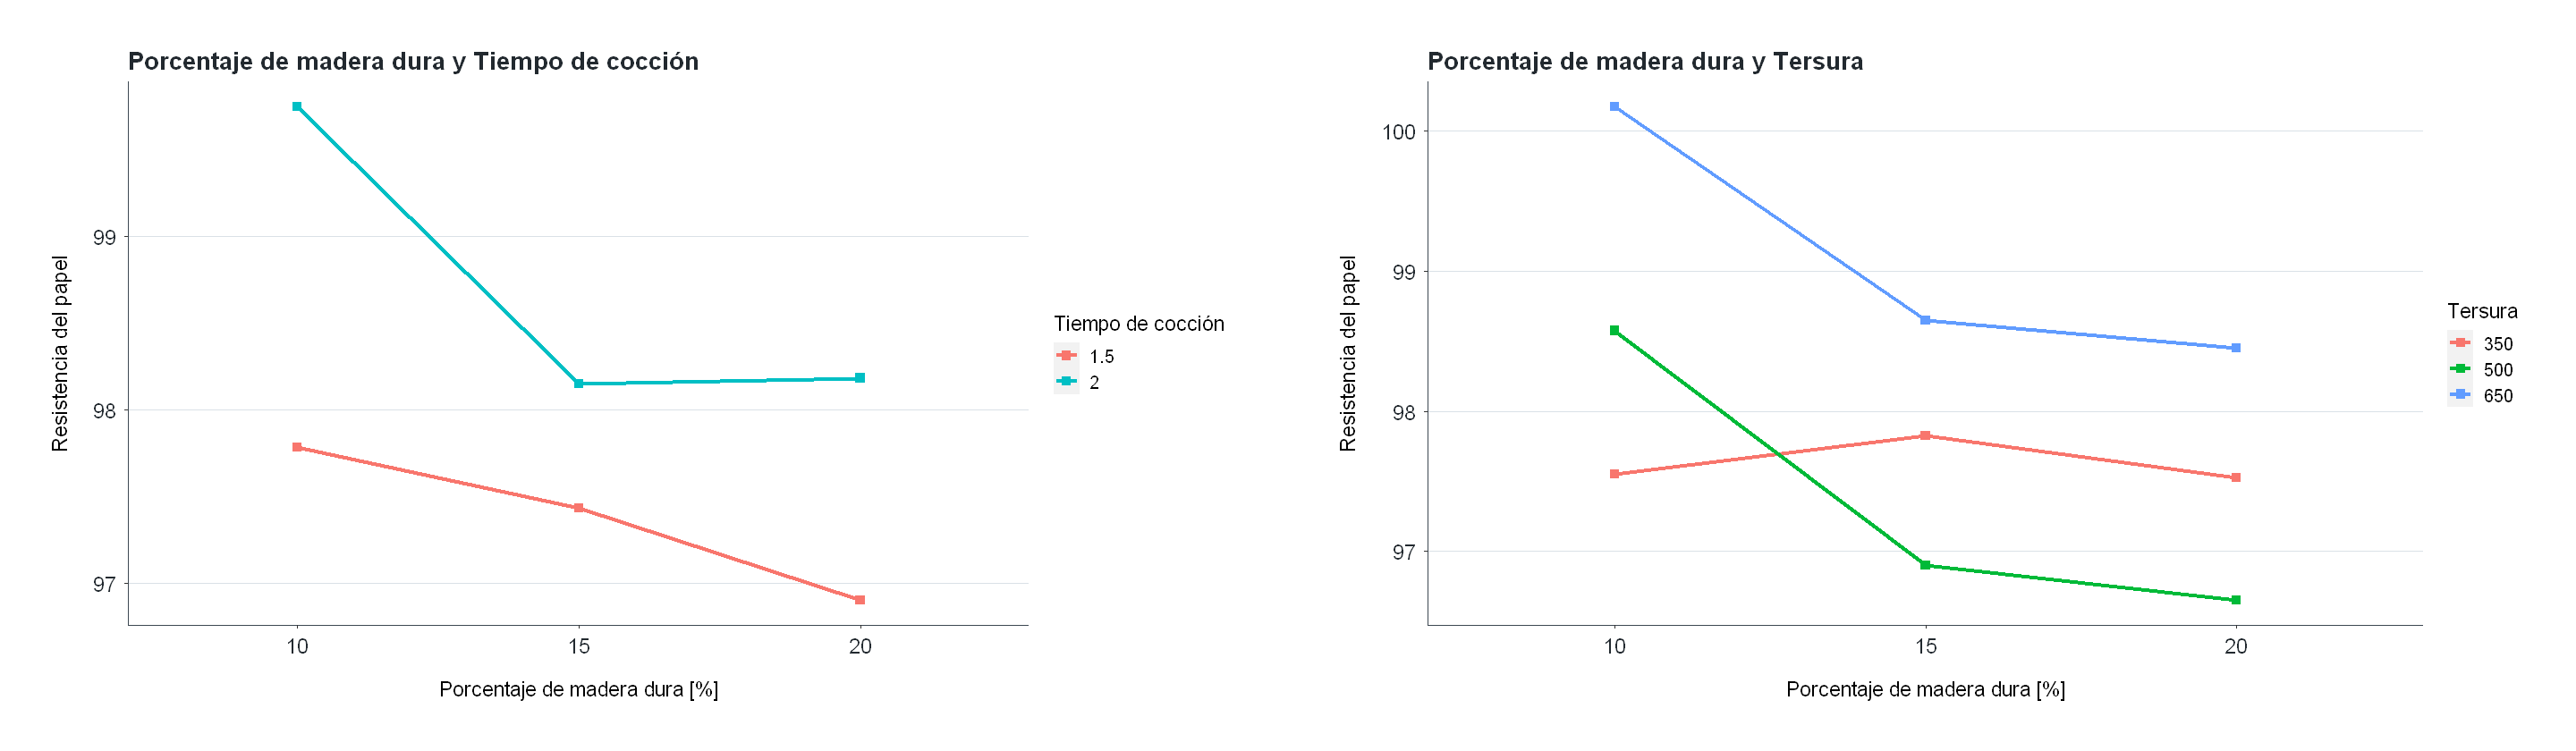

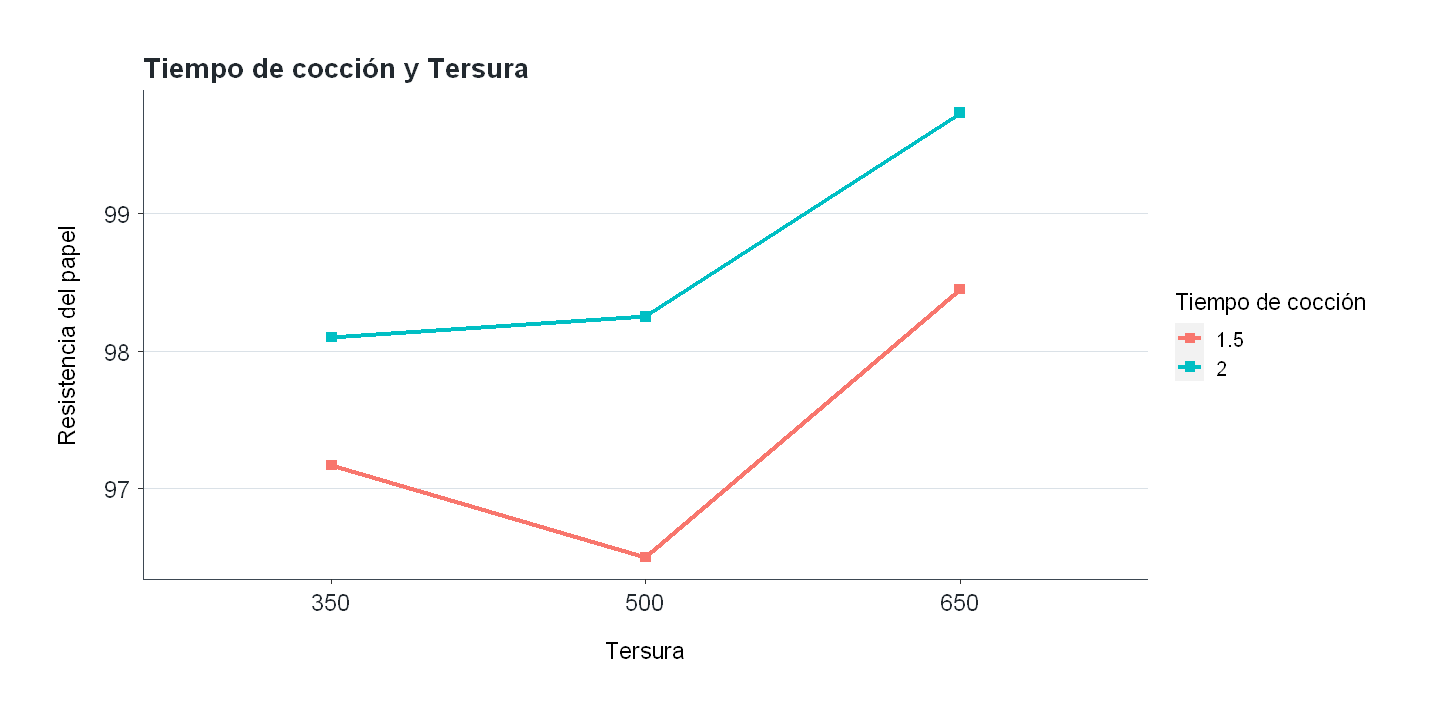

In [96]:
display_markdown('#### **Interacciones**')

interacion_1 <- data.frame(data_10) %>% 
    group_by(cooking_time, hardwood_percentage) %>%
    summarise(cell_mean=mean(resistance)) %>%
    ggplot(aes(hardwood_percentage, cell_mean)) +
    geom_line(size = 1.2, aes(group = cooking_time, color = cooking_time)) +
    geom_point(size = 2.6, aes(color = cooking_time), shape = 15) +
    labs(
        title = "Porcentaje de madera dura y Tiempo de cocción",
        #subtitle = "\n",
        x = "Porcentaje de madera dura [%]",
        y = "Resistencia del papel",
        color = "Tiempo de cocción") +
        theme( 
            plot.margin = unit(rep(1.2, 4), "cm"),    
            plot.title = element_text(size = 16, color = "#22292F", face = "bold", margin = margin(b = 5)),    
            plot.subtitle = element_text(size = 10, margin = margin(b = 35)),    
            plot.caption = element_text(size = 14, margin = margin(t = 25), color = "#606F7B"),    
            panel.background = element_blank(),    
            axis.text = element_text(size = 14, color = "#22292F"),    
            axis.text.x = element_text(margin = margin(t = 5)),    
            axis.text.y = element_text(margin = margin(r = 5)),    
            axis.line = element_line(color = "#3D4852"),    
            axis.title = element_text(size = 14),    
            axis.title.y = element_text(margin = margin(r = 15),                                
                                      hjust = 0.5),    
            axis.title.x = element_text(margin = margin(t = 15),                                
                                      hjust = 0.5),    
            panel.grid.major = element_line(color = "#DAE1E7"),    
            panel.grid.major.x = element_blank(),
            legend.title = element_text(size=14), #change legend title font size
            legend.text = element_text(size=12)) #change legend text font size

interacion_2 <- data.frame(data_10) %>% 
    group_by(smoothness, hardwood_percentage) %>%
    summarise(cell_mean=mean(resistance)) %>%
    ggplot(aes(hardwood_percentage, cell_mean)) +
    geom_line(size = 1.2, aes(group = smoothness, color = smoothness)) +
    geom_point(size = 2.6, aes(color = smoothness), shape = 15) +
    labs(
        title = "Porcentaje de madera dura y Tersura",
        #subtitle = "\n",
        x = "Porcentaje de madera dura [%]",
        y = "Resistencia del papel",
        color = "Tersura") +
        theme( 
            plot.margin = unit(rep(1.2, 4), "cm"),    
            plot.title = element_text(size = 16, color = "#22292F", face = "bold", margin = margin(b = 5)),    
            plot.subtitle = element_text(size = 10, margin = margin(b = 35)),    
            plot.caption = element_text(size = 14, margin = margin(t = 25), color = "#606F7B"),    
            panel.background = element_blank(),    
            axis.text = element_text(size = 14, color = "#22292F"),    
            axis.text.x = element_text(margin = margin(t = 5)),    
            axis.text.y = element_text(margin = margin(r = 5)),    
            axis.line = element_line(color = "#3D4852"),    
            axis.title = element_text(size = 14),    
            axis.title.y = element_text(margin = margin(r = 15),                                
                                      hjust = 0.5),    
            axis.title.x = element_text(margin = margin(t = 15),                                
                                      hjust = 0.5),    
            panel.grid.major = element_line(color = "#DAE1E7"),    
            panel.grid.major.x = element_blank(),
            legend.title = element_text(size=14), #change legend title font size
            legend.text = element_text(size=12)) #change legend text font size

interacion_3 <- data.frame(data_10) %>% 
    group_by(cooking_time, smoothness) %>%
    summarise(cell_mean=mean(resistance)) %>%
    ggplot(aes(smoothness, cell_mean)) +
    geom_line(size = 1.2, aes(group = cooking_time, color = cooking_time)) +
    geom_point(size = 2.6, aes(color = cooking_time), shape = 15) +
    labs(
        title = "Tiempo de cocción y Tersura",
        #subtitle = "\n",
        x = "Tersura",
        y = "Resistencia del papel",
        color = "Tiempo de cocción") +
        theme( 
            plot.margin = unit(rep(1.2, 4), "cm"),    
            plot.title = element_text(size = 16, color = "#22292F", face = "bold", margin = margin(b = 5)),    
            plot.subtitle = element_text(size = 10, margin = margin(b = 35)),    
            plot.caption = element_text(size = 14, margin = margin(t = 25), color = "#606F7B"),    
            panel.background = element_blank(),    
            axis.text = element_text(size = 14, color = "#22292F"),    
            axis.text.x = element_text(margin = margin(t = 5)),    
            axis.text.y = element_text(margin = margin(r = 5)),    
            axis.line = element_line(color = "#3D4852"),    
            axis.title = element_text(size = 14),    
            axis.title.y = element_text(margin = margin(r = 15),                                
                                      hjust = 0.5),    
            axis.title.x = element_text(margin = margin(t = 15),                                
                                      hjust = 0.5),    
            panel.grid.major = element_line(color = "#DAE1E7"),    
            panel.grid.major.x = element_blank(),
            legend.title = element_text(size=14), #change legend title font size
            legend.text = element_text(size=12)) #change legend text font size

options(repr.plot.width=24, repr.plot.height=7)
plot_grid(interacion_1, interacion_2, ncol = 2)
options(repr.plot.width=12, repr.plot.height=6)
interacion_3


In [91]:
I[1] <- data_10 %>% distinct(hardwood_percentage) %>% pull() %>% length() # cantidad de niveles de porcentaje de madera dura
I[2] <- data_10 %>% distinct(cooking_time) %>% pull() %>% length() # cantidad de niveles de tiempo de coccion
I[3] <- data_10 %>% distinct(smoothness) %>% pull() %>% length() # cantidad de niveles de tersura

K <- nrow(data_10) / (prod(I)) # cantidad de réplicas por cada tratamiento

df1 <- I - 1
df2 <- prod(I) * (K - 1)

alpha <- 0.05
f_alpha <- qf(alpha, df1=df1, df2=df2, lower=FALSE)


In [92]:
data_10.f_values <- summary(aov(resistance ~ hardwood_percentage * cooking_time * smoothness, data_10))[[1]][1:3,]
colnames(data_10.f_values)[1] <- 'df1'
data_10.f_values['df2'] <- df2
data_10.f_values['F (α=0.05)'] <- f_alpha
data_10.f_values[' '] <-  data_10.f_values['F value'] > data_10.f_values['F (α=0.05)'] # TRUE si se rechaza H0
data_10.f_values
data_10.f_values <- data_10.f_values[,c(1,6,4,8,7)]


df1 Sum Sq   Mean Sq  F value 
hardwood_percentage                         2   10.05500  5.02750 10.09989
cooking_time                                1   15.73444 15.73444 31.60938
smoothness                                  2   20.56167 10.28083 20.65346
                                            Pr(>F)       df2 F (a=0.05)     
hardwood_percentage                         1.145263e-03 18  3.554557   TRUE
cooking_time                                2.465291e-05 18  4.413873   TRUE
smoothness                                  2.185266e-05 18  3.554557   TRUE

In [93]:
display_markdown('#### **Estadísticos F**')
display_markdown('\n')
data_10.f_values <- cbind(c('Porcentaje de madera dura', 'Tiempo de cocción', 'tersura'), data_10.f_values)
colnames(data_10.f_values)[1] <- 'Factor'
rownames(data_10.f_values) <- c()
table <- formattable(data_10.f_values, align=c('l', 'c', 'c', 'c', 'c', 'c'), list(` ` = formatter("span", 
x ~ ifelse(x, ">", "<"), 
style = x ~ style(color = ifelse(x, "green", "red")))))
#table <- format_table(table, list(area(1:2) ~ color_tile("transparent", "lightgray")))
as.htmlwidget(table, width="60%", height=NULL)


#### **Estadísticos F**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">Para todos los factores considerados, el valor del estádistico de prueba es mayor al valor correspondiente a un nivel de significancia $\alpha = 0.05$. Por lo tanto, se concluye que los tres factores afectan a la resistencia del papel.</div>

<br></br>

#### <div style="text-align: justify">b) Encuentre los valores P de los cocientes F del inciso a).</div>

In [94]:
f_values <- data_10.f_values[,'F value']
p_values <- pf(f_values, df1=df1, df2=df2, lower=FALSE)
data_10.p_values <- data_10.f_values %>% select('df1', 'df2', 'F value') %>% mutate('p-valor'=round(p_values, 4)) 

display_markdown('#### **Valores P**')
display_markdown('\n')
data_10.p_values <- cbind(c('Porcentaje de madera dura', 'Tiempo de cocción', 'tersura'), data_10.p_values)
colnames(data_10.p_values)[1] <- 'Factor'
rownames(data_10.p_values) <- c()
table <- formattable(data_10.p_values, align=c('l', 'c', 'c', 'c', 'c', 'c'))
#table <- format_table(table, list(area(1:2) ~ color_tile("transparent", "lightgray")))
as.htmlwidget(table, width="50%", height=NULL)


#### **Valores P**

HTML widgets cannot be represented in plain text (need html)

<div style="text-align: justify">En los tres casos, el $p$-$valor$ es menor a $\alpha = 0.05$.</div>

<br></br>

#### <div style="text-align: justify">c) Analice los residuos de este experimento.</div>

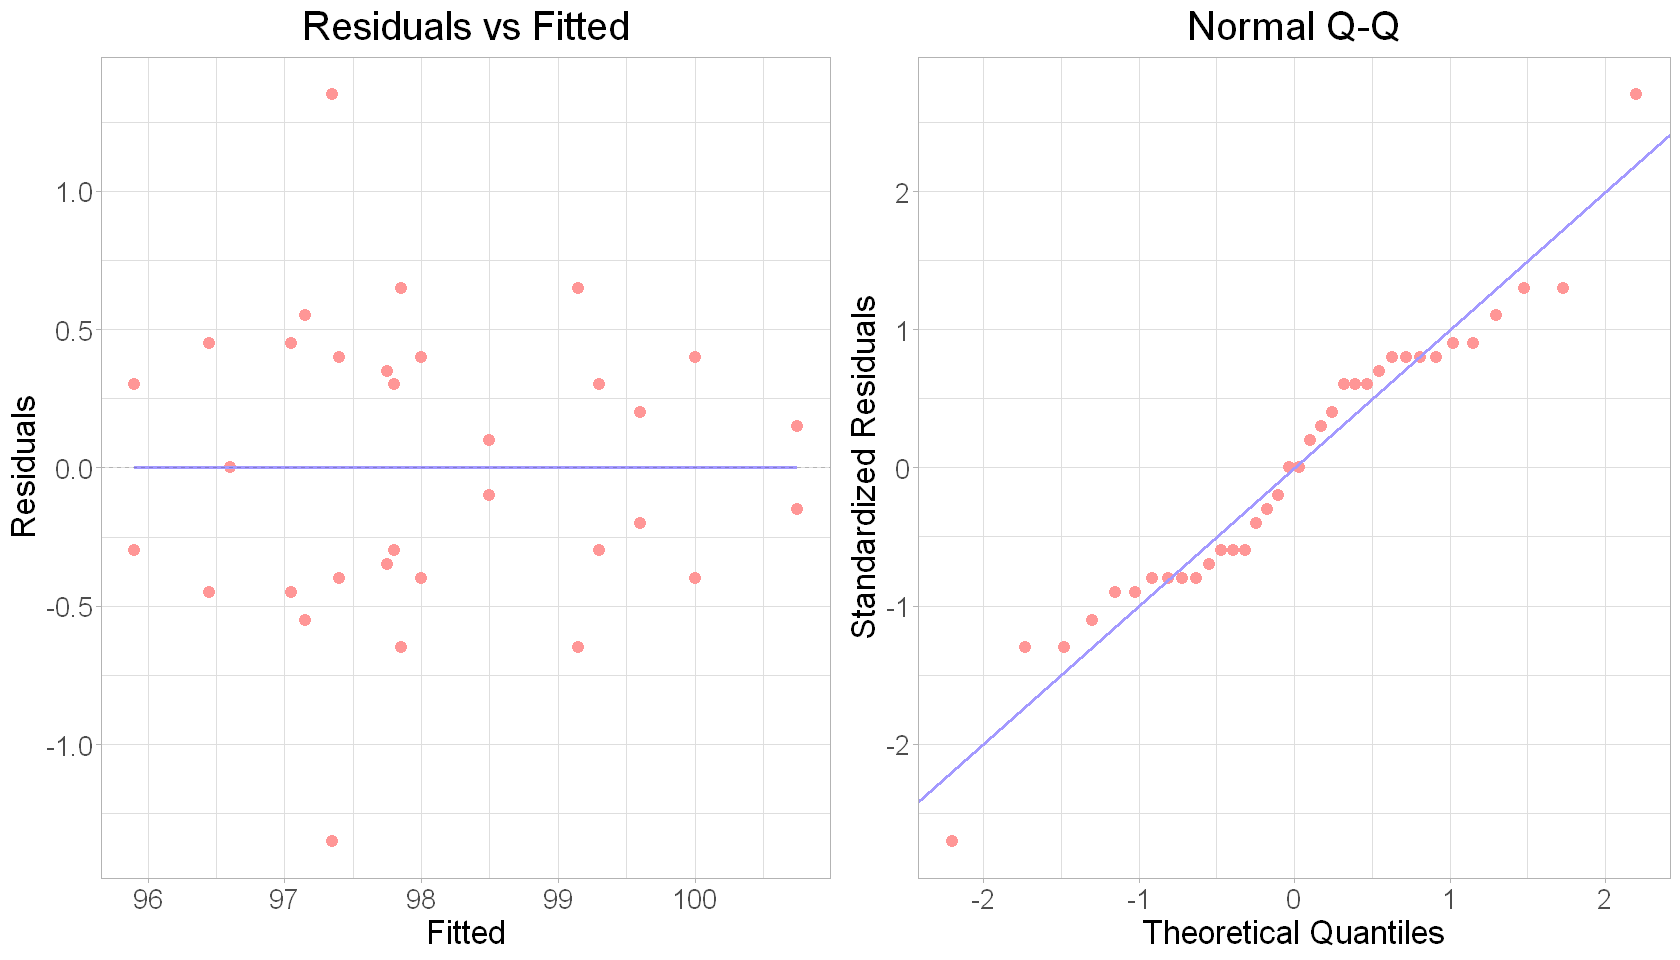

In [95]:
data_10.aov <- aov(resistance ~ hardwood_percentage * cooking_time * smoothness, data_10)
smoothed <- data.frame(with(data_10.aov, lowess(x = data_10.aov$fitted, y = data_10.aov$residuals)))
# Gráficos
options(repr.plot.width=14, repr.plot.height=8)
res_vs_fit <- ggplot(data_10.aov) + 
    geom_point(aes(x=data_10.aov$fitted, y=data_10.aov$residuals), color= '#ff9696', size=3) +
    geom_path(data = smoothed, aes(x = x, y = y), col="#a399ff", size=1) +
    geom_hline(linetype = 2, yintercept=0, alpha=0.2) +
    ggtitle("Residuals vs Fitted") +
    xlab("Fitted") +
    ylab("Residuals") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

qq_plot <- ggplot(data_10.aov) +
    stat_qq(aes(sample = .stdresid), color= '#ff9696', size=3) +
    geom_abline(col="#a399ff", size=1) +
    xlab("Theoretical Quantiles") +
    ylab("Standardized Residuals") +
    ggtitle("Normal Q-Q") +
    theme_light() +
    theme(text=element_text(size=20),
     plot.title = element_text(size=24, hjust = 0.5))

plot_grid(res_vs_fit, qq_plot, ncol = 2)


<div style="text-align: justify">Tanto la gráfica de <i style="color: blue">Residuos vs. Valores Ajustados</i> como la gráfica de <i style="color: blue">Probabilidad Normal</i> no sugieren violaciones significativas de los supuestos de igualdad de varianza y normalidad. Entonces, es razonable asumir la validez del modelo.</div>

***
<br></br>